In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.impute import KNNImputer

from src import *
#import importlib,sys
#importlib.reload(sys.modules['src'])
#from src import *

In [2]:
_2015 = pd.read_csv(r'data/2015-building-energy-benchmarking.csv',sep=',')
_2016 = pd.read_csv(r'data/2016-building-energy-benchmarking.csv',sep=',')

# 1- Fusion des fichiers 2015 et 2016

### Etude des colonnes des jeux de données de 2015 et 2016

In [3]:
#columns = set()
#for keyword in ['Type','GFA','EU','EUI','ENERGYSTAR','Energy','Source','Electricity','Steam','Fuel','Gas','Year','Numberof','GHG']:
#    selections = list(filter(lambda c: keyword in c ,df.columns.values))
#    #print(f'{keyword}:\n {selections}')
#    columns = columns | set(selections)
#
#columns = list(columns) + ['OSEBuildingID','PropertyName']  + ["Location","Latitude","Longitude"]+ ["DefaultData","ComplianceStatus","Outlier"]
#
#df = df.loc[:,columns]

import json

def description(col):
    """ extraction de la description de la colonne"""
    print({col:d.get('description') for d in _2015_columns+_2016_columns if d['name'] == col})

def serch(key_word):
    print({d['name']:d['description'] for d in _2015_columns+_2016_columns if (key_word in d['name']) and d.get('description') is not None })


# lecture des colonnes depuis le fichier json
_2015_columns = json.load(open(r'data/socrata_metadata_2015-building-energy-benchmarking.json'))['columns']
_2016_columns = json.load(open(r'data/socrata_metadata_2016-building-energy-benchmarking.json'))['columns']
# extraction des noms de colonnes
_2015_column_names = [d['name'] for d in _2015_columns]
_2016_column_names = [d['name'] for d in _2016_columns]
# 
print(f'Même nombre de colonnes: {len(_2015_column_names) == len(_2016_column_names)} - En 2015: {len(_2015_column_names)} - En 2016: {len(_2016_column_names)}')
x= list(set(_2015_column_names) - set(_2016_column_names))
print(f'Colonnes de 2015 absentes en 2016: {x} {len(x)}')
y = list(set(_2016_column_names) - set(_2015_column_names))
print(f'Colonnes de 2016 absentes en 2015: {y} {len(y)}')

# verif
# columns_2015 = set(_2015_column_names) - set(x)
# columns_2016 = set(_2016_column_names) - set(y)
# print(f'{len(columns_2015 - columns_2016) == 0}')

common_columns = list(set(_2015_column_names) - set(x))
display_sample(pd.DataFrame(data=[range(len(common_columns))],columns=common_columns ))


Même nombre de colonnes: False - En 2015: 47 - En 2016: 46
Colonnes de 2015 absentes en 2016: ['Zip Codes', 'City Council Districts', 'Location', 'Comment', '2010 Census Tracts', 'OtherFuelUse(kBtu)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'SPD Beats', 'Seattle Police Department Micro Community Policing Plan Areas', 'GHGEmissions(MetricTonsCO2e)'] 10
Colonnes de 2016 absentes en 2015: ['Longitude', 'Comments', 'State', 'TotalGHGEmissions', 'Latitude', 'ZipCode', 'GHGEmissionsIntensity', 'Address', 'City'] 9


OSEBuildingID  LargestPropertyUseTypeGFA  PropertyGFAParking  \
0              0                          1                   2   

   ENERGYSTARScore  SteamUse(kBtu)  SecondLargestPropertyUseType  DataYear  \
0                3               4                             5         6   

   SiteEUIWN(kBtu/sf)  SourceEUIWN(kBtu/sf)  Electricity(kWh)  \
0                   7                     8                 9   

   ComplianceStatus  ThirdLargestPropertyUseType  Neighborhood  \
0                10                           11            12   

   SiteEnergyUse(kBtu)  ThirdLargestPropertyUseTypeGFA  SiteEnergyUseWN(kBtu)  \
0                   13                              14                     15   

   PropertyGFABuilding(s)  SourceEUI(kBtu/sf)  Outlier  CouncilDistrictCode  \
0                      16                  17       18                   19   

   SecondLargestPropertyUseTypeGFA  NumberofBuildings  PropertyGFATotal  \
0                               20                 21                22   

   NaturalGas(therms)  BuildingType  SiteEUI(kBtu/sf)  DefaultData  \
0                  23            24                25           26   

   Electricity(kBtu)  NumberofFloors  LargestPropertyUseType  \
0                 27              28                      29   

   PrimaryPropertyType  NaturalGas(kBtu)  YearsENERGYSTARCertified  \
0                   30                31                        32   

   ListOfAllPropertyUseTypes  PropertyName  YearBuilt  \
0                         33            34         35   

   TaxParcelIdentificationNumber  
0                             36

### Affichage d'échantillons des deux jeux de données.

In [4]:
display_sample(_2015,5)
display_sample(_2016,5)

OSEBuildingID  DataYear          BuildingType  \
999           20428      2015        NonResidential   
2684          26425      2015  Multifamily LR (1-4)   
1601          22585      2015        NonResidential   
889           20094      2015  Multifamily HR (10+)   
1776          23313      2015        NonResidential   

              PrimaryPropertyType  \
999            Mixed Use Property   
2684         Low-Rise Multifamily   
1601  Small- and Mid-Sized Office   
889         High-Rise Multifamily   
1776  Small- and Mid-Sized Office   

                                           PropertyName  \
999   MATADOR/JAK'S GRILL/8 LIMBS YOGA/FITNESS TOGETHER   
2684                         WOODLAND CREST CONDOMINIUM   
1601                OFFICE BUILDING WITH CARETAKER UNIT   
889                                TOWER 801 APARTMENTS   
1776                    SWEDISH HOSPITAL MEDICAL CENTER   

     TaxParcelIdentificationNumber  \
999                      952006350   
2684                    9522200000   
1601                    2770606573   
889                      660000900   
1776                    8590900690   

                                               Location  CouncilDistrictCode  \
999   {'latitude': '47.56147766', 'longitude': '-122...                    1   
2684  {'latitude': '47.6721809', 'longitude': '-122....                    6   
1601  {'latitude': '47.66036376', 'longitude': '-122...                    7   
889   {'latitude': '47.61303865', 'longitude': '-122...                    7   
1776  {'latitude': '47.60802721', 'longitude': '-122...                    3   

               Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
999               SOUTHWEST       1930                  1             2.0   
2684              NORTHWEST       1985                  1             3.0   
1601  MAGNOLIA / QUEEN ANNE       2007                  1             4.0   
889                DOWNTOWN       1970                  1            23.0   
1776                   EAST       1956                  1             3.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
999              20700                   0                   20700   
2684             27432                   0                   27432   
1601             30152                5680                   24472   
889             179745               39504                  140241   
1776             21282                   0                   21282   

                              ListOfAllPropertyUseTypes  \
999   Non-Refrigerated Warehouse, Office, Other - Re...   
2684                       Multifamily Housing, Parking   
1601                                    Office, Parking   
889         Multifamily Housing, Parking, Swimming Pool   
1776                                             Office   

          LargestPropertyUseType  LargestPropertyUseTypeGFA  \
999   Non-Refrigerated Warehouse                     6900.0   
2684         Multifamily Housing                    28026.0   
1601                      Office                    25184.0   
889          Multifamily Housing                   121455.0   
1776                      Office                    19658.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
999                    Restaurant                           6900.0   
2684                      Parking                           8330.0   
1601                      Parking                           4968.0   
889                       Parking                          15360.0   
1776                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
999           Other - Recreation                          4323.0   
2684                         NaN                             NaN   
1601                         NaN                             NaN   
889                Swimming Pool                             0.0   
1776    

OSEBuildingID  DataYear          BuildingType   PrimaryPropertyType  \
2671          26535      2016        NonResidential    Mixed Use Property   
209             331      2016        NonResidential          Large Office   
2746          26832      2016  Multifamily MR (5-9)  Mid-Rise Multifamily   
2421          25580      2016  Multifamily LR (1-4)  Low-Rise Multifamily   
1601          22742      2016  Multifamily LR (1-4)  Low-Rise Multifamily   

                        PropertyName                Address     City State  \
2671        2967-University District  1300 N.E. 45Th Street  Seattle    WA   
209               The Tower Building           1809 7th Ave  Seattle    WA   
2746  International House Apartments  607 Maynard Ave South  Seattle    WA   
2421         53453 - Apex Apartments     4233 7th Avenue NE  Seattle    WA   
1601                    Greenlake NW            734 94th St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
2671  98105.0                    8816401150                    4    NORTHEAST   
209   98101.0                    0659000365                    7     DOWNTOWN   
2746  98104.0                    5247801865                    2     DOWNTOWN   
2421  98105.0                    4092300810                    4    NORTHEAST   
1601  98103.0                    2909230000                    5    NORTHWEST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
2671  47.66160 -122.31393       1976                1.0               2   
209   47.61375 -122.33566       1930                1.0              17   
2746  47.59725 -122.32539       1979                1.0               8   
2421  47.65864 -122.32109       1983                1.0               4   
1601  47.69724 -122.34847       1987                1.0               3   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
2671             34948               15755                   19193   
209             204790               30000                  174790   
2746             75477                   0                   75477   
2421             40090                   0                   40090   
1601             24156                   0                   24156   

                              ListOfAllPropertyUseTypes  \
2671                               Bank Branch, Parking   
209   Office, Other - Recreation, Parking, Retail Store   
2746                                Multifamily Housing   
2421                                Multifamily Housing   
1601                       Multifamily Housing, Parking   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
2671            Bank Branch                    19183.0   
209                  Office                   142034.0   
2746    Multifamily Housing                    75477.0   
2421    Multifamily Housing                    34380.0   
1601    Multifamily Housing                    20475.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
2671                      Parking                          19183.0   
209            Other - Recreation                          17070.0   
2746                          NaN                              NaN   
2421                          NaN                              NaN   
1601                      Parking                           6308.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
2671                         NaN                             NaN   
209                 Retail Store                         14666.0   
2746                         NaN                             NaN   
2421                         NaN                             NaN   
1601                         NaN                             NaN   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
2671                      NaN             17.0         60.500000   
209              201020092007             91.

### Un peu de vocabulaire ...
- GFA    -> surface
- EU     -> consommation d'énergie (Energy Use)
- EUI    -> consommation d'énergie rapportée à la surface (Energy Use Intensity)
- EUIWN  -> consommation d'énergie rapportée à la surface à conditions métérologiques constantes (Weather Normalized)
- Source* Vs Site* -> les données Source* sont exprimées du point de vue du fournisseur; elles prennent en compte les déperditions liées à la distribution  
- les sources d'énergie: 'Electricity','Steam','Fuel','Gas'
- SPS = Seattle Public School 
- K-12 fait référence aux écoles de la maternelle au secondaire
- EPA: Environmental Protection Agency

### Homogénéisation des noms de colonnes

GHGEmissionsIntensity = GHGEmissionsIntensity(kgCO2e/ft2) ?

In [5]:
description('GHGEmissionsIntensity')
description('GHGEmissionsIntensity(kgCO2e/ft2)')

{'GHGEmissionsIntensity': "Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources"}
{'GHGEmissionsIntensity(kgCO2e/ft2)': "\t\nTotal Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources"}


GHGEmissions(MetricTonsCO2e) = TotalGHGEmissions ?

In [6]:
description('GHGEmissions(MetricTonsCO2e)')
description('TotalGHGEmissions')

{'GHGEmissions(MetricTonsCO2e)': "The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu. "}
{'TotalGHGEmissions': "The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44

In [7]:
_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'GHGEmissions','GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'},inplace=True)
_2016.rename(columns={'TotalGHGEmissions':'GHGEmissions',},inplace=True)

On ajoute aux colonnes communes les colonnes modifiées et les colonnes uniquement présentes dans l'un ou l'autre des dataset.

In [8]:
# 'OtherFuelUse(kBtu)' (2015 only) and 'Location' (2015 only) Vs 'Latitude', 'Longitude' (2016 only)
columns = common_columns + ['GHGEmissions','GHGEmissionsIntensity','OtherFuelUse(kBtu)','Location','Latitude','Longitude']
display_sample(pd.DataFrame(data=[range(len(columns))],columns= columns ))

OSEBuildingID  LargestPropertyUseTypeGFA  PropertyGFAParking  \
0              0                          1                   2   

   ENERGYSTARScore  SteamUse(kBtu)  SecondLargestPropertyUseType  DataYear  \
0                3               4                             5         6   

   SiteEUIWN(kBtu/sf)  SourceEUIWN(kBtu/sf)  Electricity(kWh)  \
0                   7                     8                 9   

   ComplianceStatus  ThirdLargestPropertyUseType  Neighborhood  \
0                10                           11            12   

   SiteEnergyUse(kBtu)  ThirdLargestPropertyUseTypeGFA  SiteEnergyUseWN(kBtu)  \
0                   13                              14                     15   

   PropertyGFABuilding(s)  SourceEUI(kBtu/sf)  Outlier  CouncilDistrictCode  \
0                      16                  17       18                   19   

   SecondLargestPropertyUseTypeGFA  NumberofBuildings  PropertyGFATotal  \
0                               20                 21                22   

   NaturalGas(therms)  BuildingType  SiteEUI(kBtu/sf)  DefaultData  \
0                  23            24                25           26   

   Electricity(kBtu)  NumberofFloors  LargestPropertyUseType  \
0                 27              28                      29   

   PrimaryPropertyType  NaturalGas(kBtu)  YearsENERGYSTARCertified  \
0                   30                31                        32   

   ListOfAllPropertyUseTypes  PropertyName  YearBuilt  \
0                         33            34         35   

   TaxParcelIdentificationNumber  GHGEmissions  GHGEmissionsIntensity  \
0                             36            37                     38   

   OtherFuelUse(kBtu)  Location  Latitude  Longitude  
0                  39        40        41         42

### Fusion des deux datasets

In [9]:
df = pd.concat([_2015,_2016],ignore_index=True)
df = df.loc[:,columns]

# 2 - Traitement des données

## Typologie des bâtiments

On doit uniquement garder les données "des bâtiments non destinés à l’habitation." Il existe plusieurs colonnes qui décrivent la typologie du bâtiment.
```
['PrimaryPropertyType','BuildingType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']

``` 

On ne considère que les trois premiers.

Le type va nous servir à filtrer le jeu de données mais sera également une donnée d'entrée pour l'algorithme.

### Histogrammes des colonnes type de bâtiment

{'PrimaryPropertyType': 'The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.'}


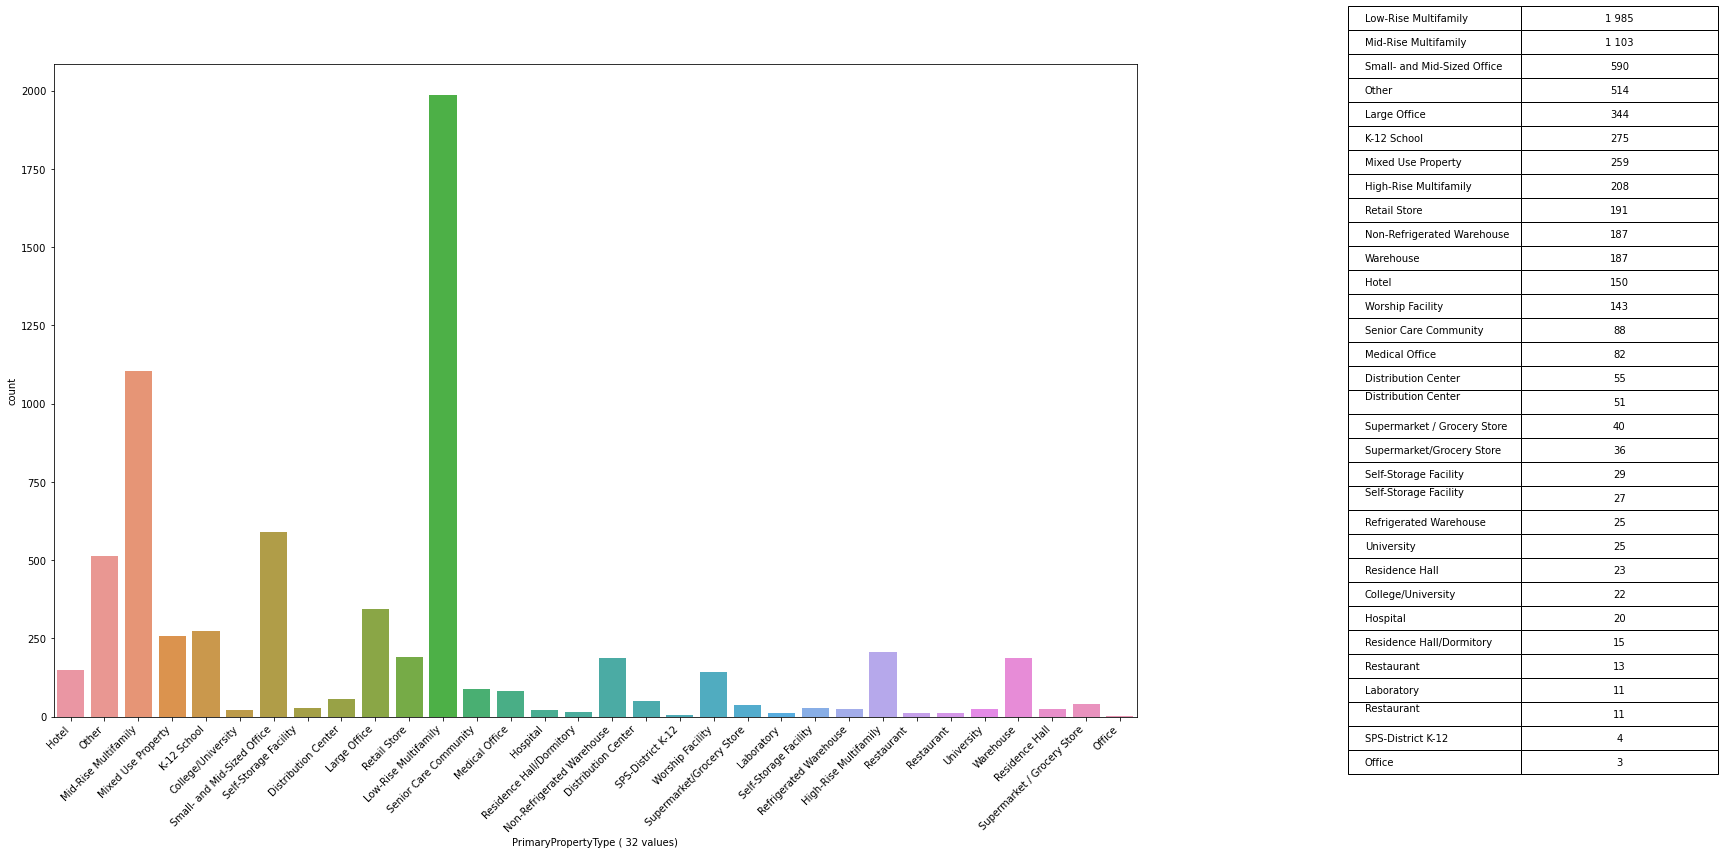

In [10]:
description('PrimaryPropertyType')
countplot(df,'PrimaryPropertyType')

{'BuildingType': 'City of Seattle building type classification.'}


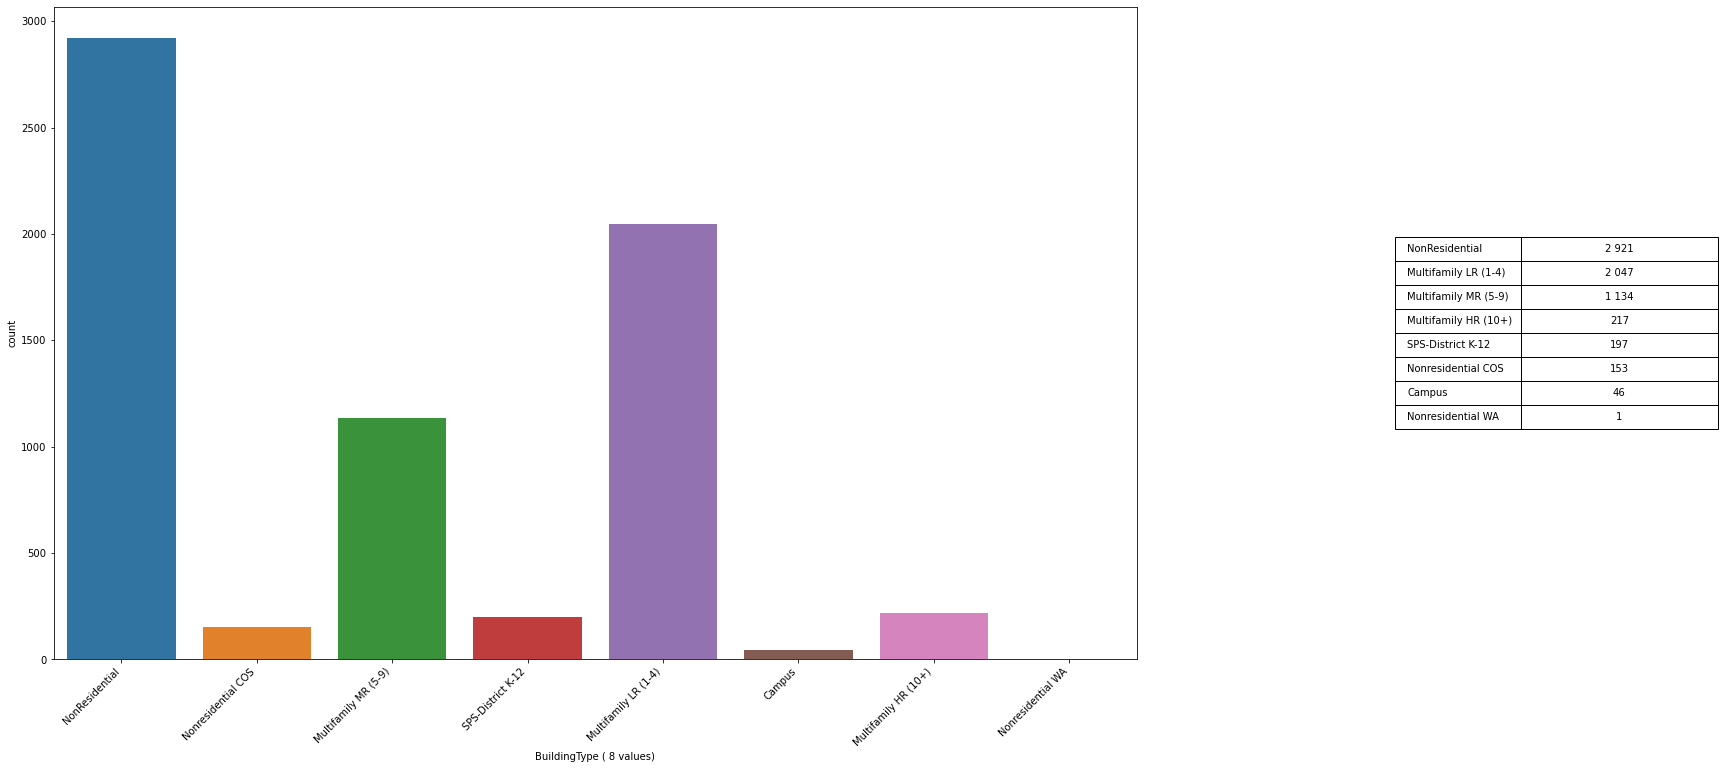

In [11]:
description('BuildingType')
countplot(df,'BuildingType')

{'LargestPropertyUseType': 'The largest use of a property (e.g. office, retail store) by GFA. '}


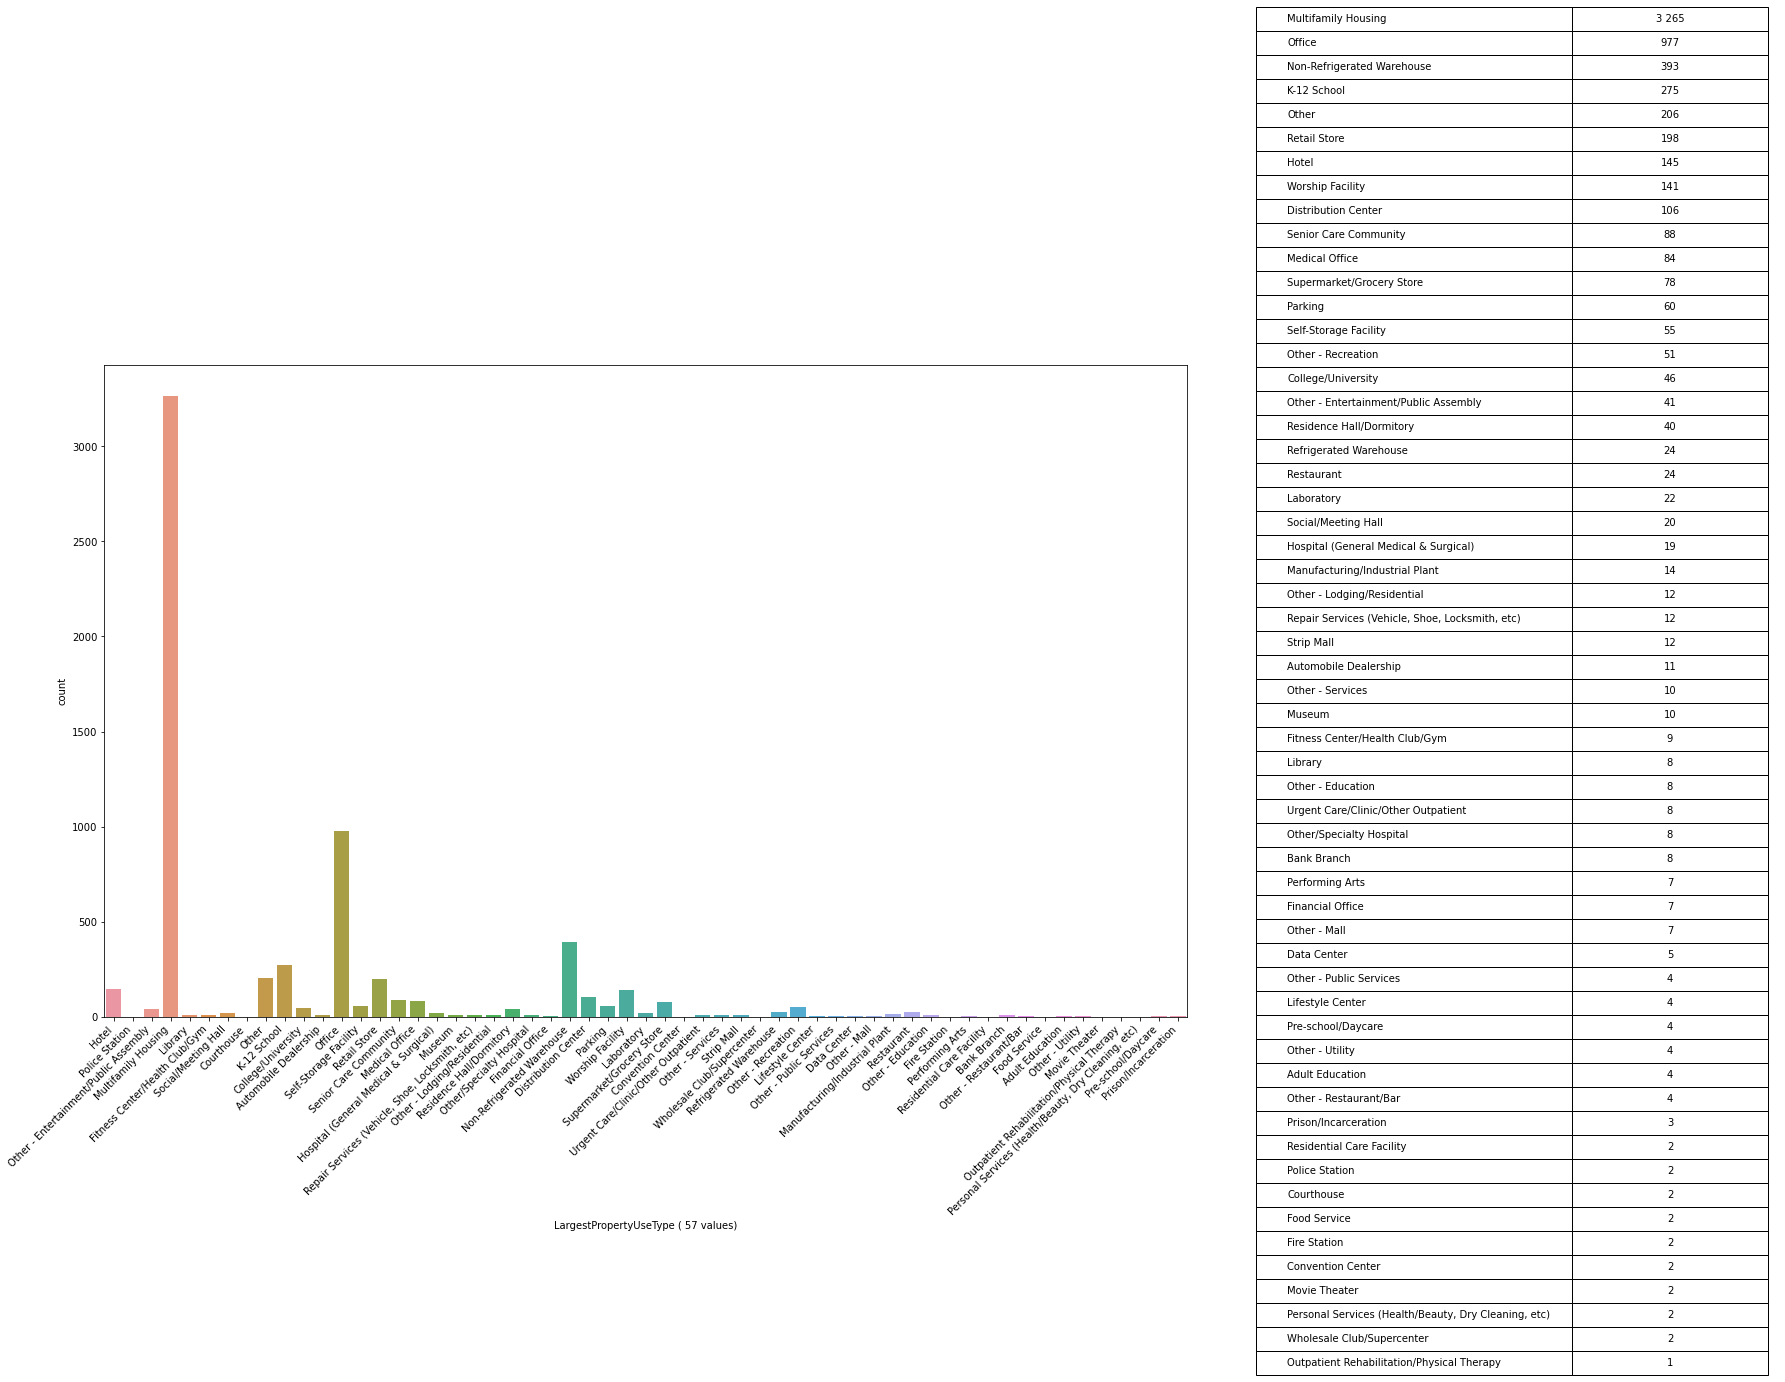

In [12]:
description('LargestPropertyUseType')
countplot(df,'LargestPropertyUseType')

In [13]:
def completeness(df,col):
    print(f'Completeness {col}: {df[col].count()/len(df)}')

for col in ['BuildingType','PrimaryPropertyType','LargestPropertyUseType']:
    completeness(df,col)

Completeness BuildingType: 1.0
Completeness PrimaryPropertyType: 1.0
Completeness LargestPropertyUseType: 0.9767718880285885


### Homogénéisation de la catégorie PrimaryPropertyType

In [14]:
#df['PrimaryPropertyType'].unique()
#array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
#       'K-12 School', 'College/University', 'Small- and Mid-Sized Office',
#       'Self-Storage Facility\n', 'Distribution Center', 'Large Office',
#       'Retail Store', 'Low-Rise Multifamily', 'Senior Care Community',
#       'Medical Office', 'Hospital', 'Residence Hall/Dormitory',
#       'Non-Refrigerated Warehouse', 'Distribution Center\n',
#       'SPS-District K-12', 'Worship Facility',
#       'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility',
#       'Refrigerated Warehouse', 'High-Rise Multifamily', 'Restaurant\n',
#       'Restaurant', 'University', 'Warehouse', 'Residence Hall',
#       'Supermarket / Grocery Store', 'Office'], dtype=object)

replacements = {'Supermarket / Grocery Store':'Supermarket/Grocery Store', 'SPS-District K-12':'K-12 School', 'Restaurant\n':'Restaurant', 'College/University':'University','Non-Refrigerated Warehouse':'Warehouse',
'Self-Storage Facility\n':'Self-Storage Facility','Distribution Center\n':'Distribution Center','Residence Hall':'Residence Hall/Dormitory'}
def replace(key):
    tmp = replacements.get(key)
    return tmp if tmp is not None else key
df.loc[:,'PrimaryPropertyType']= df.loc[:,['PrimaryPropertyType']].apply(lambda r:replace(r['PrimaryPropertyType']) ,axis=1)

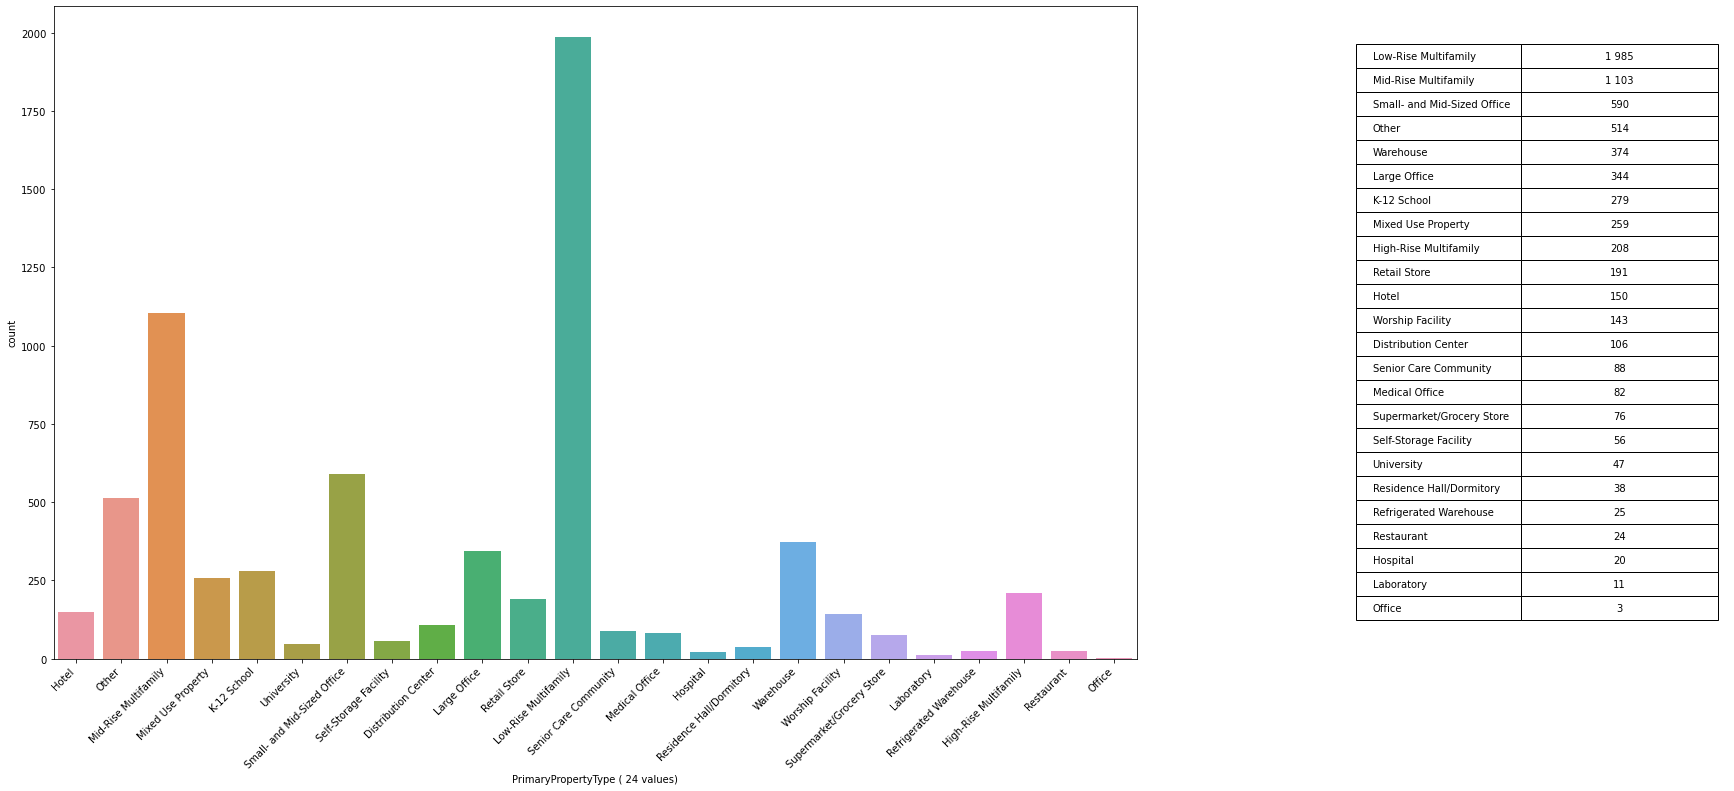

In [15]:
countplot(df,'PrimaryPropertyType')

#### Histogramme de 'LargestPropertyUseType' quand PrimaryPropertyType == Mixed Property

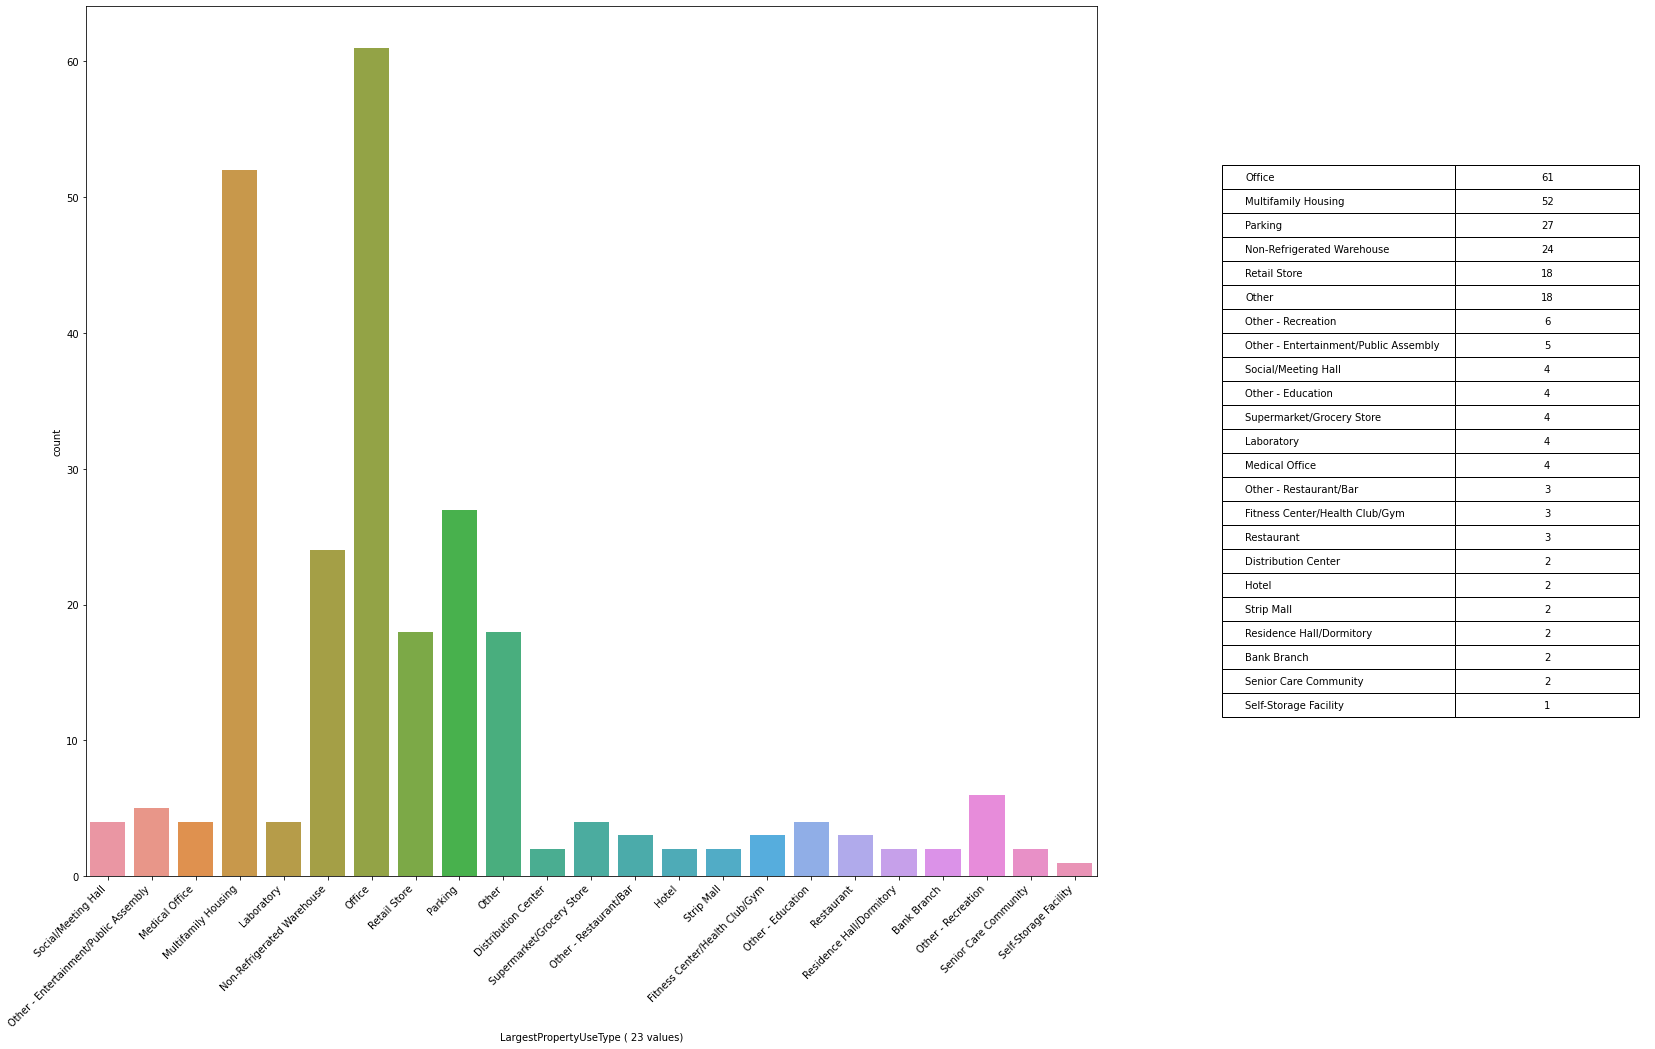

In [16]:
selection = df[ df['PrimaryPropertyType'] == 'Mixed Use Property']
filtered_df = df.loc[selection.index,['PrimaryPropertyType','BuildingType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]
countplot(filtered_df,x="LargestPropertyUseType",rot=45,figsize=(28,16))

#### Histogramme de 'LargestPropertyUseType' quand PrimaryPropertyType == Mixed Property

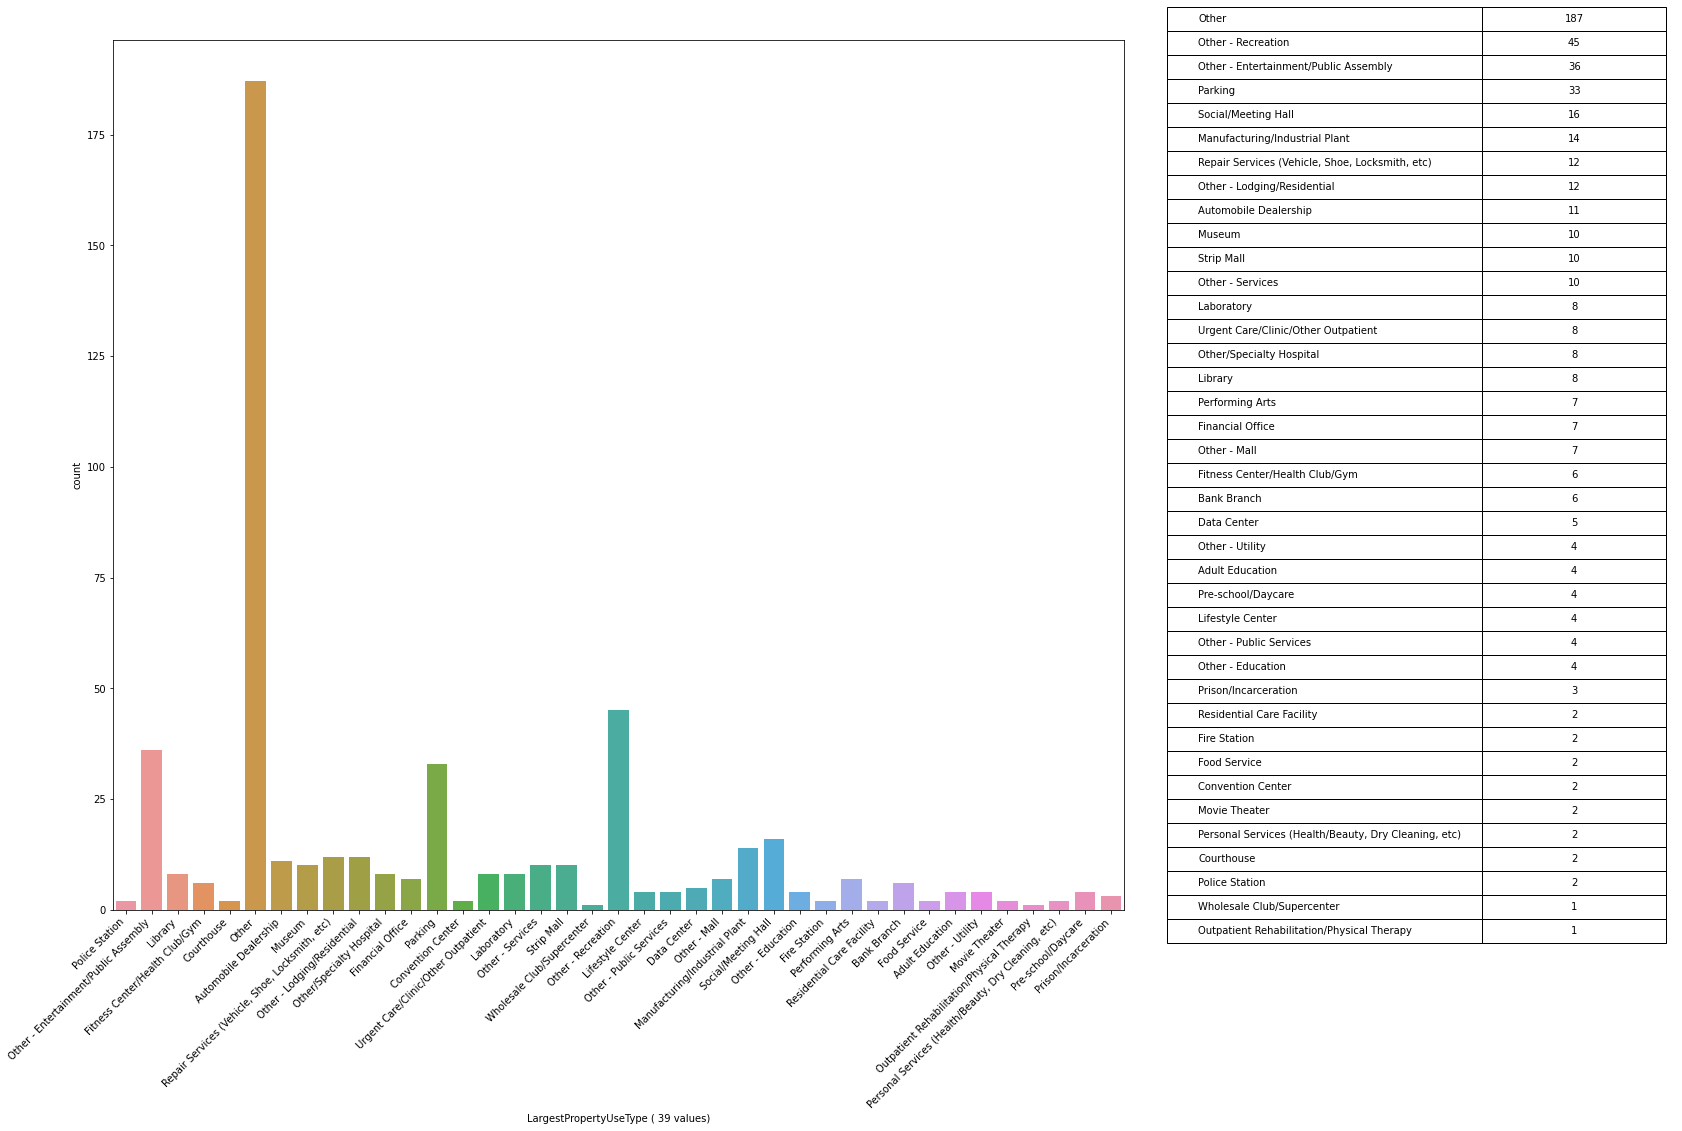

In [17]:
selection = df[ df['PrimaryPropertyType'] == 'Other']
filtered_df = df.loc[selection.index,['PrimaryPropertyType','BuildingType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]
countplot(filtered_df,x="LargestPropertyUseType",rot=45,figsize=(28,16))

### Calcul d'une colonne type de bâtiment ('c_PropertyType')
On calcul le type de bâtiment à partir de PrimaryPropertyType. 
Mais pour les valeurs 'Other' et 'Mixed Use Property', on utilise la LargestPropertyUseType pour être plus précis.

In [18]:
# selection = df[ df['PrimaryPropertyType'] == 'X']
# filtered_df = df.loc[selection.index,['PrimaryPropertyType','BuildingType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']] 
# filtered_df['LargestPropertyUseType'].unique()
#
# x == Other
#array(['Police Station', 'Other - Entertainment/Public Assembly',
#       'Library', 'Fitness Center/Health Club/Gym', 'Courthouse', 'Other',
#       'Automobile Dealership', 'Museum',
#       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
#       'Other - Lodging/Residential', 'Other/Specialty Hospital',
#       'Financial Office', 'Parking', 'Convention Center',
#       'Urgent Care/Clinic/Other Outpatient', 'Laboratory',
#       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
#       nan, 'Other - Recreation', 'Lifestyle Center',
#       'Other - Public Services', 'Data Center', 'Other - Mall',
#       'Manufacturing/Industrial Plant', 'Social/Meeting Hall',
#       'Other - Education', 'Fire Station', 'Performing Arts',
#       'Residential Care Facility', 'Bank Branch', 'Food Service',
#       'Adult Education', 'Other - Utility', 'Movie Theater',
#       'Outpatient Rehabilitation/Physical Therapy',
#       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
#       'Pre-school/Daycare', 'Prison/Incarceration'], dtype=object)
#
# x == Mixed Use Property
#array(['Social/Meeting Hall', 'Other - Entertainment/Public Assembly',
#       'Medical Office', 'Multifamily Housing', 'Laboratory',
#       'Non-Refrigerated Warehouse', 'Office', 'Retail Store', 'Parking',
#       nan, 'Other', 'Distribution Center', 'Supermarket/Grocery Store',
#       'Other - Restaurant/Bar', 'Hotel', 'Strip Mall',
#       'Fitness Center/Health Club/Gym', 'Other - Education',
#       'Restaurant', 'Residence Hall/Dormitory', 'Bank Branch',
#       'Other - Recreation', 'Senior Care Community',
#       'Self-Storage Facility'], dtype=object)
#
#df['PrimaryPropertyType'].unique()
#array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
#       'K-12 School', 'University', 'Small- and Mid-Sized Office',
#       'Self-Storage Facility', 'Distribution Center', 'Large Office',
#       'Retail Store', 'Low-Rise Multifamily', 'Senior Care Community',
#       'Medical Office', 'Hospital', 'Residence Hall/Dormitory',
#       'Warehouse', 'Worship Facility', 'Supermarket/Grocery Store',
#       'Laboratory', 'Refrigerated Warehouse', 'High-Rise Multifamily',
#       'Restaurant', 'Office'], dtype=object)

In [19]:
LargestPropertyUseTypes = df['LargestPropertyUseType'].unique()
PrimaryPropertyTypes = df['PrimaryPropertyType'].unique()
common = list(set(LargestPropertyUseTypes).intersection(set(PrimaryPropertyTypes)))
added_cat = [ 'Parking','Data Center','Manufacturing/Industrial Plant']

replacements = {
 'Other - Recreation':'Entertainment/Public Assembly',
 'Performing Arts':'Entertainment/Public Assembly',
 'Social/Meeting Hall':'Entertainment/Public Assembly',
 'Other - Entertainment/Public Assembly': 'Entertainment/Public Assembly',
 'Museum': 'Entertainment/Public Assembly',
 'Convention Center':'Entertainment/Public Assembly',
 'Movie Theater':'Entertainment/Public Assembly',
 'Other - Lodging/Residential':'Residence Hall/Dormitory',
 'Multifamily Housing':'Residence Hall/Dormitory',
 'Other/Specialty Hospital':'Hospital',
 'Urgent Care/Clinic/Other Outpatient':'Hospital',
 'Outpatient Rehabilitation/Physical Therapy':'Hospital',
 'Strip Mall':'Retail Store',
 'Financial Office': 'Office',
 #'Medical Office': 'Office',
 'Non-Refrigerated Warehouse':'Warehouse',
 'Other - Restaurant/Bar':'Restaurant'
}

tbrs = common + added_cat + list(replacements.keys())

def make_replace_func(replacements):
    def r(key):
        tmp = replacements.get(key)
        return tmp if tmp is not None else key
    return r

#input = LargestPropertyUseType
replace_func = make_replace_func(replacements)

def compute_c_PropertyType(type,replace,tbrs,default):
    if type in tbrs:
        return replace(type)
    else:
        return default

df.loc[:,'c_PropertyType'] =df.loc[:,'PrimaryPropertyType']

selection = df[df['c_PropertyType'] == 'Other']        
df.loc[selection.index,'c_PropertyType'] = (df.loc[selection.index,['LargestPropertyUseType']]).apply(lambda r: compute_c_PropertyType(r['LargestPropertyUseType'],replace_func,tbrs,'Other'),axis=1)

selection = df[df['c_PropertyType'] == 'Mixed Use Property']        
df.loc[selection.index,'c_PropertyType'] = (df.loc[selection.index,['LargestPropertyUseType']]).apply(lambda r: compute_c_PropertyType(r['LargestPropertyUseType'],replace_func,tbrs,'Mixed Use Property'),axis=1)


#### Affichage de l'histogramme de 'c_PropertyType'

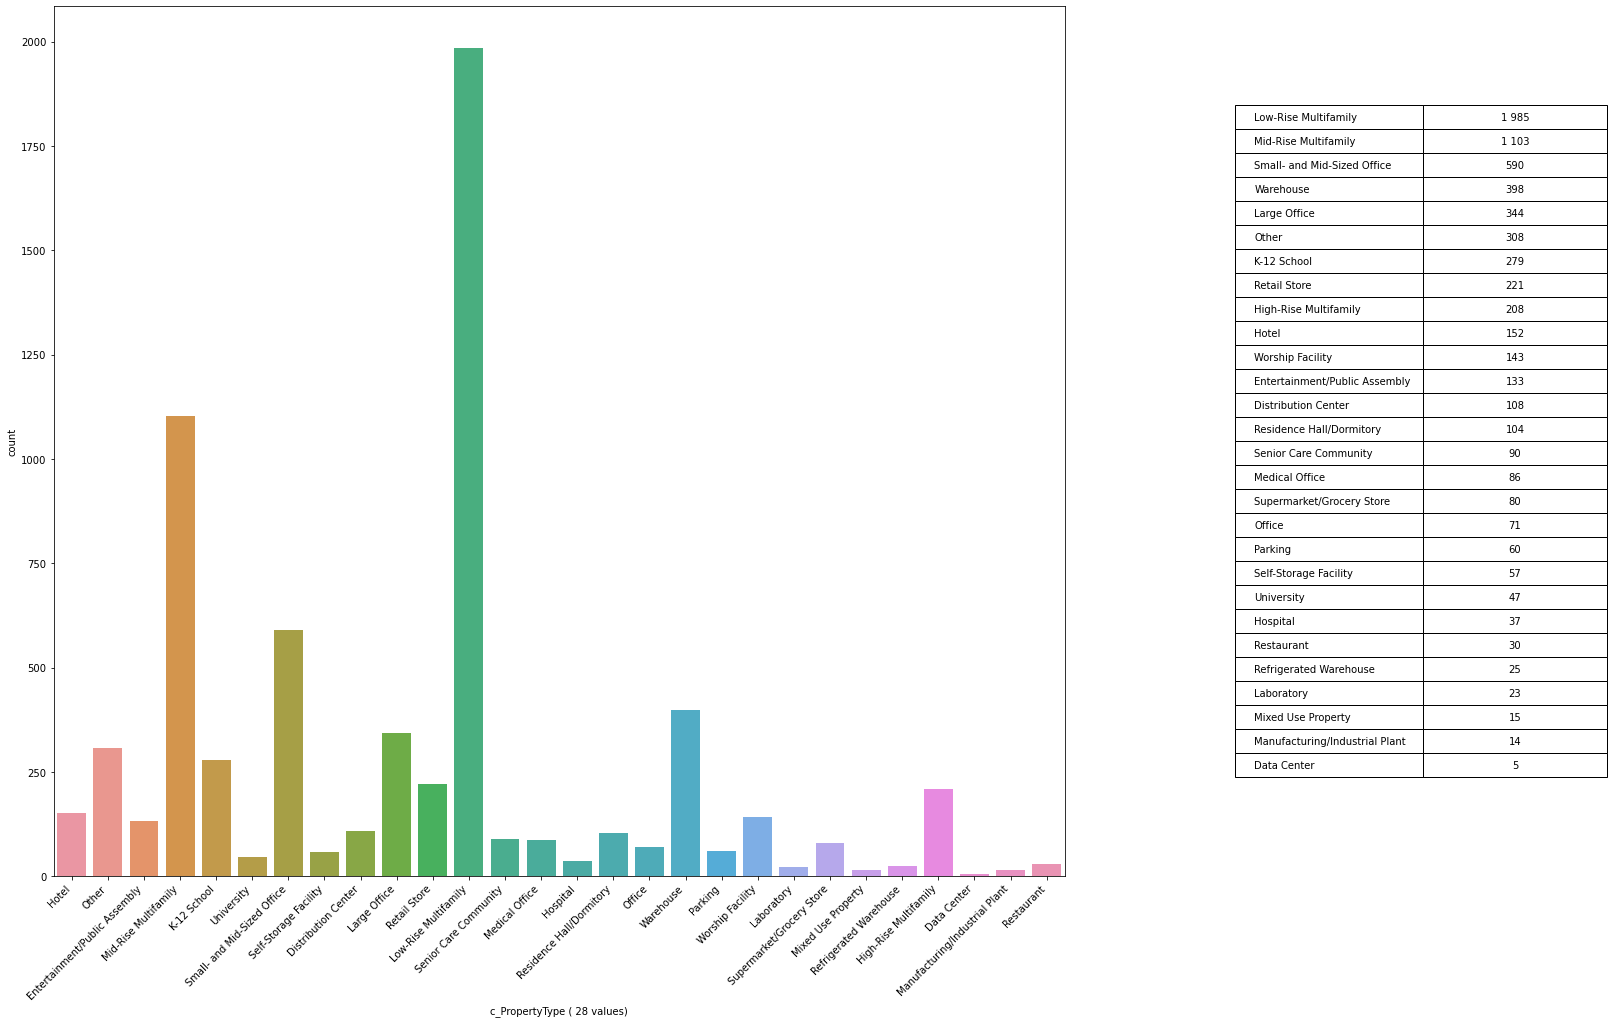

In [20]:
countplot(df,x="c_PropertyType",rot=45,figsize=(28,16))

#### Agréger les différents type de bureau ?
```
['Office','Medical Office','Small- and Mid-Sized Office','Large Office']
```

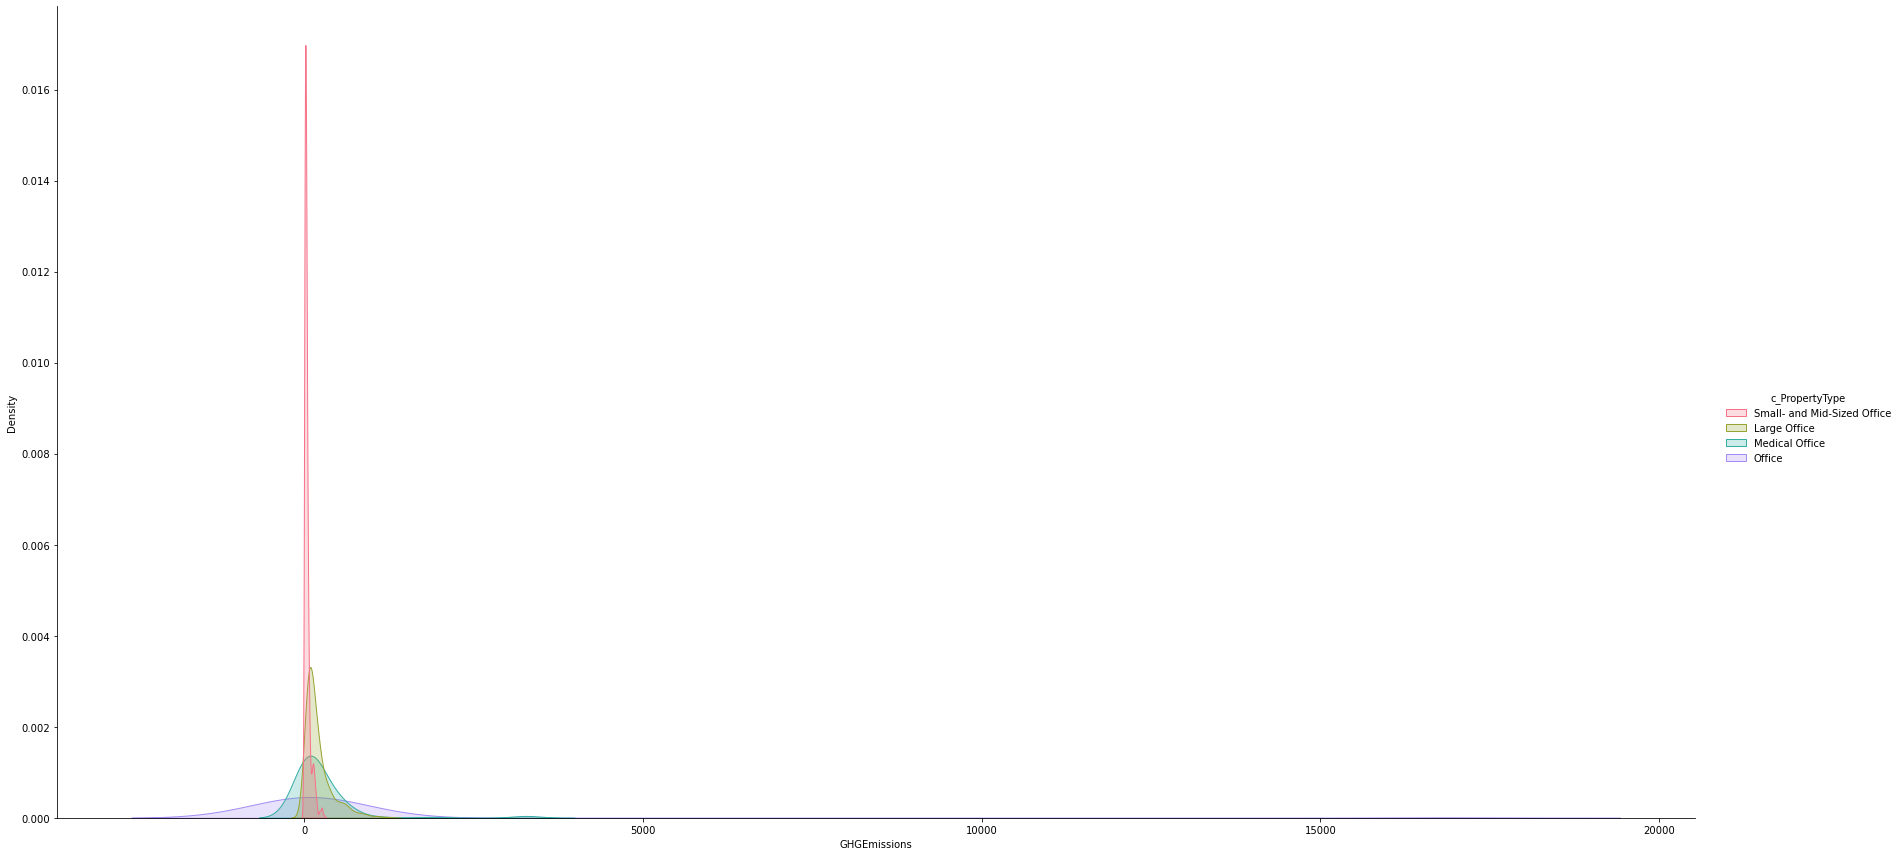

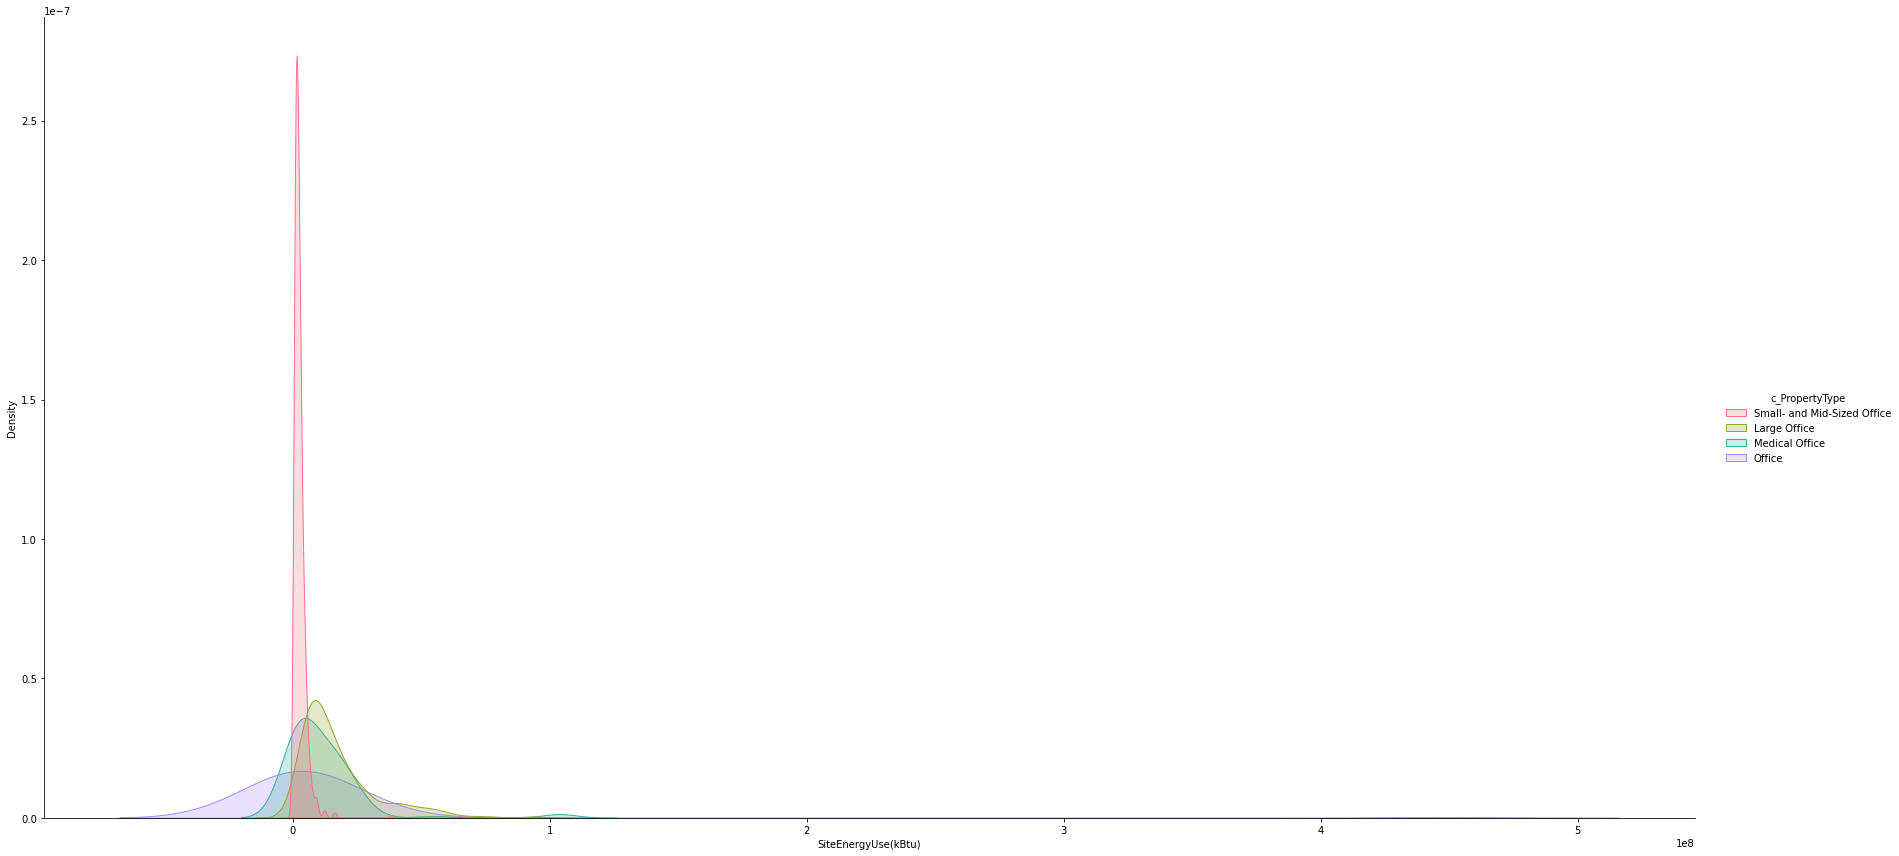

In [21]:
filtered_df = df[df['c_PropertyType'].isin(['Office','Medical Office','Small- and Mid-Sized Office','Large Office'])]
_ = sns.displot(data=filtered_df,x='GHGEmissions',hue='c_PropertyType',kind='kde',fill=True,common_norm=False,height=12,aspect=2,palette=sns.color_palette('husl',4),warn_singular=False)
_ = sns.displot(data=filtered_df,x='SiteEnergyUse(kBtu)',hue='c_PropertyType',kind='kde',fill=True,common_norm=False,height=12,aspect=2,palette=sns.color_palette('husl',4),warn_singular=False)

==> Non les distributions des variables à prédire sont trop différentes.

### Suppression des bâtiments résidentiels

In [22]:
selection = df[df['c_PropertyType'].isin(['Residence Hall/Dormitory','Low-Rise Multifamily','Mid-Rise Multifamily','High-Rise Multifamily'])]
df.drop(index=selection.index,inplace=True)

#### Affichage de l'histogramme de 'c_PropertyType'

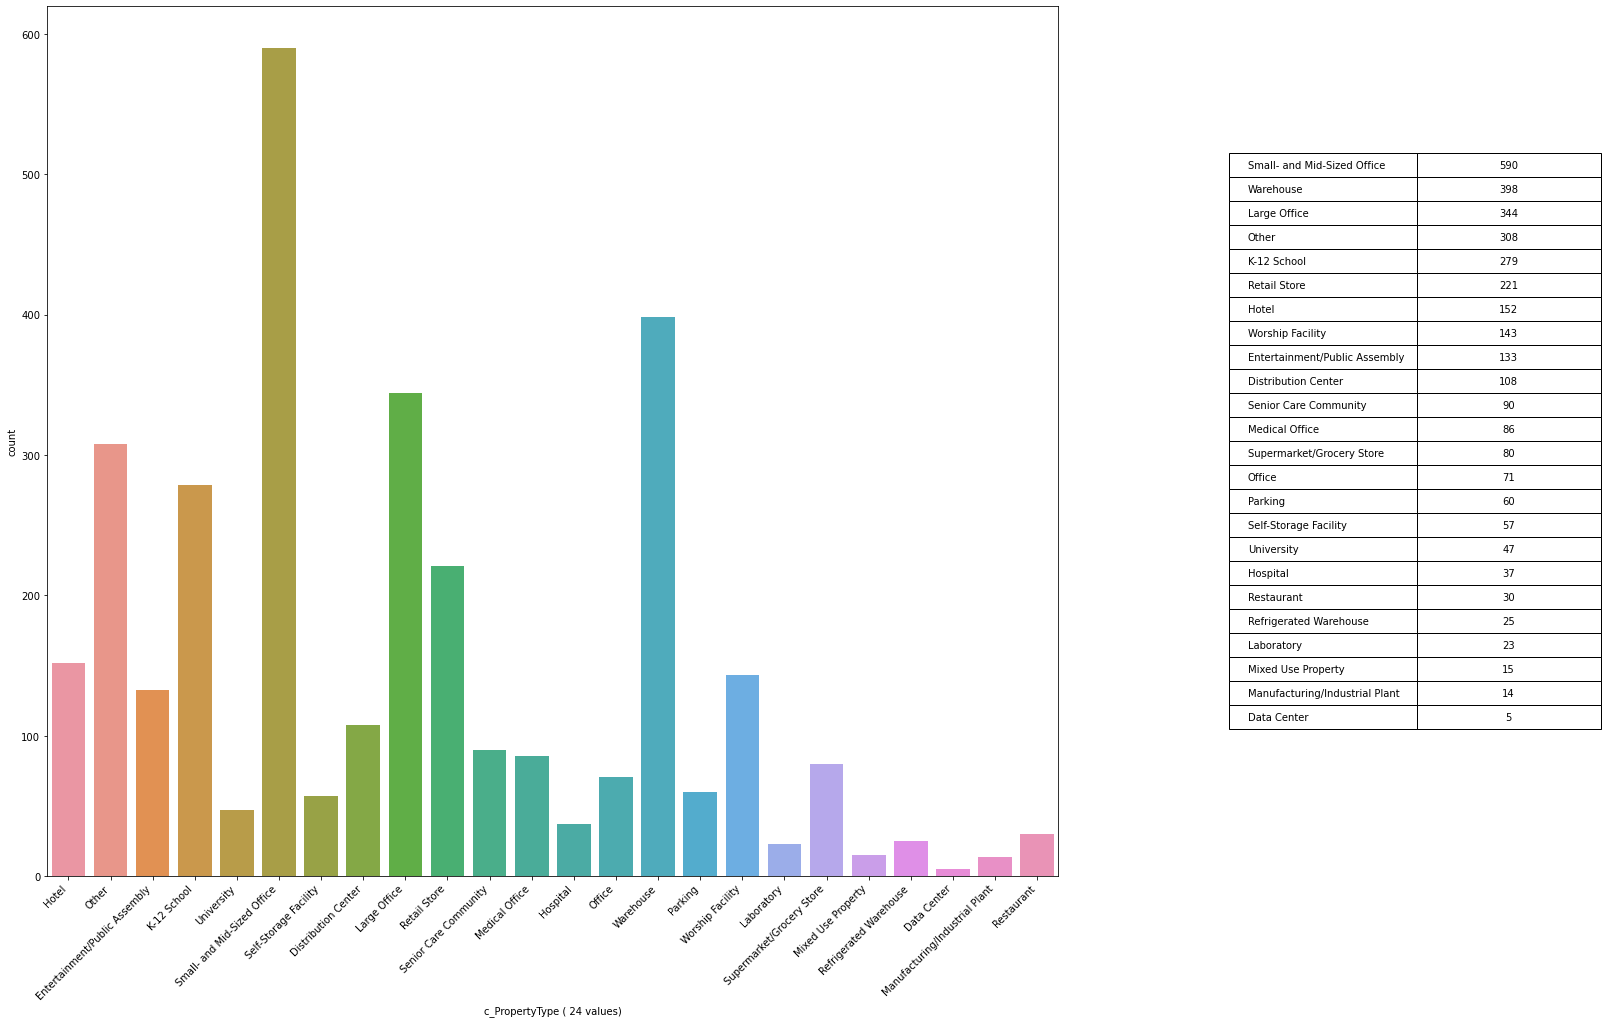

In [23]:
countplot(df,x="c_PropertyType",rot=45,figsize=(28,16))

## Calcul de l'âge du bâtiment

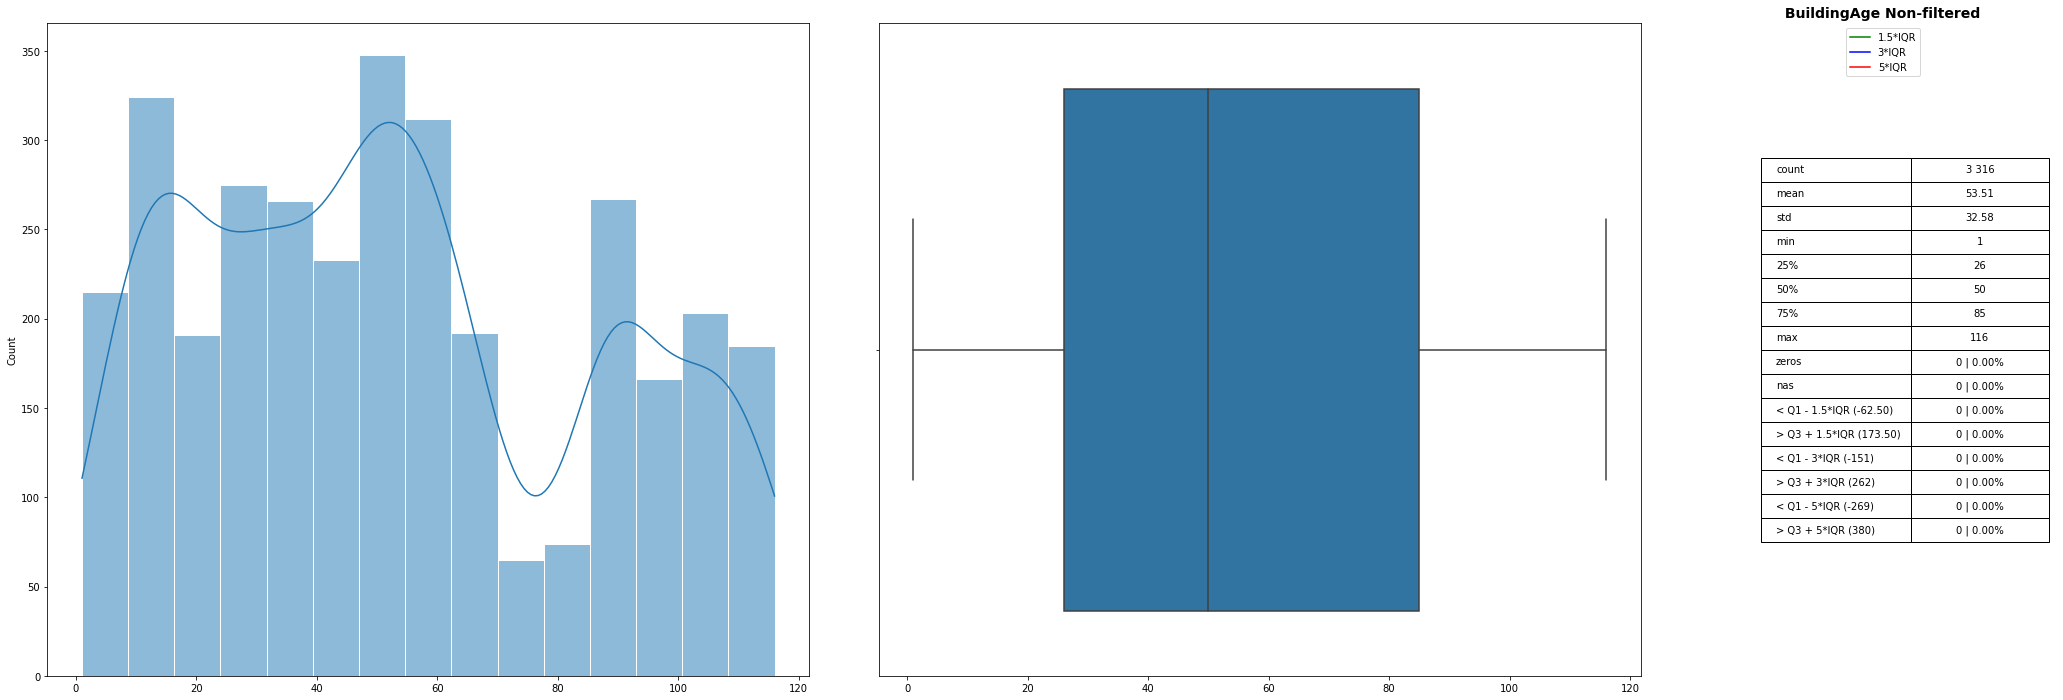

In [24]:
df['BuildingAge'] = df.apply(lambda r: r['DataYear'] - r['YearBuilt'],axis=1)
univariate_num(df['BuildingAge'])

## Calcul de la position géographique

La position géographique est définie pour toutes les lignes du fichier.

In [25]:
df[(df['Location'].isna()) & ((df['Latitude'].isna()) | (df['Longitude'].isna()))]

Empty DataFrame
Columns: [OSEBuildingID, LargestPropertyUseTypeGFA, PropertyGFAParking, ENERGYSTARScore, SteamUse(kBtu), SecondLargestPropertyUseType, DataYear, SiteEUIWN(kBtu/sf), SourceEUIWN(kBtu/sf), Electricity(kWh), ComplianceStatus, ThirdLargestPropertyUseType, Neighborhood, SiteEnergyUse(kBtu), ThirdLargestPropertyUseTypeGFA, SiteEnergyUseWN(kBtu), PropertyGFABuilding(s), SourceEUI(kBtu/sf), Outlier, CouncilDistrictCode, SecondLargestPropertyUseTypeGFA, NumberofBuildings, PropertyGFATotal, NaturalGas(therms), BuildingType, SiteEUI(kBtu/sf), DefaultData, Electricity(kBtu), NumberofFloors, LargestPropertyUseType, PrimaryPropertyType, NaturalGas(kBtu), YearsENERGYSTARCertified, ListOfAllPropertyUseTypes, PropertyName, YearBuilt, TaxParcelIdentificationNumber, GHGEmissions, GHGEmissionsIntensity, OtherFuelUse(kBtu), Location, Latitude, Longitude, c_PropertyType, BuildingAge]
Index: []

[0 rows x 45 columns]

#### Transformation en coordonnées polaires

In [26]:
#def to_float(s):
#    if np.isnan(s) or s is None:
#        return np.nan
#    else:
#        return float(s)

#print(df[df['distanceCenter'] < 0.1]['Location'].values)
#df.loc[581,['distanceCenter','angleCenter','Location']]
#l = 47.61219025
#L = -122.33799744
#l=47.60466039
#L=-122.33028619
#(lc,Lc) = (47.605061,-122.329820)
#delta_l = (l-lc)
#print(delta_l)
#delta_L = (L-Lc)
#print(delta_L)
#pi_factor = lambda d: 0 if d < 0 else 0
#print( 180*(math.atan(delta_l/delta_L) + pi_factor(delta_L)*math.pi)/math.pi)
#R=6371
#math.sqrt(delta_l**2+delta_L**2)
#df[['Latitude','Longitude','Location']].loc[6715,:]
#x = 1
#y = -1
#180*math.atan(x/y)/math.pi

In [27]:
import ast
 
def get_lL(r):
    if not ( np.isnan(r['Latitude']) or np.isnan(r['Longitude'])) :
        return (float(r['Latitude']),float(r['Longitude']))
    else:
        d = ast.literal_eval(r['Location'])
        l = d.get('latitude')
        L = d.get('longitude')
        return  (float(l),float(L))

def make_geo_pos(get_lL,center=(0,0),R=6371):
    (lc,Lc) = center
   
    def compute_delta(r):
        (l,L) = get_lL(r)
        delta_l = math.pi*(l-lc)/180    
        delta_L = math.pi*(L-Lc)/180
        return (delta_l,delta_L)

    def distance(r):
        (delta_l,delta_L) = compute_delta(r)
        return R*math.sqrt(delta_l**2+delta_L**2)
    
    pi_factor = lambda d: 1 if d < 0 else 0
    def angle(r):
       (delta_l,delta_L) = compute_delta(r)
       return 180*(math.atan(delta_l/delta_L) + pi_factor(delta_L)*math.pi)/math.pi

    return (distance,angle)


In [28]:
Seattle_City_Hall = (47.605061,-122.329820) 
(distance,angle) = make_geo_pos(get_lL,center=Seattle_City_Hall)
df['distanceCenter'] = df.apply(distance,axis=1)
df['angleCenter'] = df.apply(angle,axis=1)

## Consommation totale d'énergie (SiteEnergyUse(kBtu))

### Affichage des lignes sans consommation d'énergie

In [29]:
df[(df['SiteEnergyUse(kBtu)'].isna()) | (df['SiteEnergyUse(kBtu)'] == 0.0)][['SiteEnergyUse(kBtu)','NaturalGas(kBtu)','Electricity(kBtu)','SteamUse(kBtu)','OtherFuelUse(kBtu)','GHGEmissions']]

SiteEnergyUse(kBtu)  NaturalGas(kBtu)  Electricity(kBtu)  \
44                    0.0               0.0                0.0   
62                    NaN               NaN                NaN   
572                   0.0               0.0                0.0   
719                   NaN               NaN                NaN   
1358                  NaN               NaN                NaN   
1360                  NaN               NaN                NaN   
2108                  NaN               NaN                NaN   
2381                  NaN               NaN                NaN   
2406                  NaN               NaN                NaN   
3368                  0.0               0.0                0.0   
3371                  0.0               0.0          1496816.0   
3402                  0.0               0.0           600813.0   
3421                  0.0               0.0          1698176.0   
3425                  0.0               0.0          2347138.0   
3435                  0.0               0.0          2104286.0   
3473                  0.0         4318917.0                0.0   
3479                  0.0         3217877.0                0.0   
3492                  0.0               0.0                0.0   
3644                  0.0               0.0                0.0   
3918                  NaN               NaN                NaN   
3954                  0.0               0.0          1957268.0   
3970                  0.0               0.0          1433596.0   
4086                  0.0               0.0                0.0   
4100                  0.0               0.0                0.0   
4701                  0.0               0.0                0.0   
5234                  0.0          945537.0                0.0   
6010                  NaN               NaN                NaN   
6506                  0.0         4993620.0                0.0   

      SteamUse(kBtu)  OtherFuelUse(kBtu)  GHGEmissions  
44               0.0                 0.0          0.00  
62               NaN                 NaN           NaN  
572              0.0                 0.0          0.00  
719              NaN                 NaN           NaN  
1358             NaN                 NaN           NaN  
1360             NaN                 NaN           NaN  
2108             NaN                 NaN           NaN  
2381             NaN                 NaN           NaN  
2406             NaN                 NaN           NaN  
3368             0.0                 NaN          0.00  
3371             0.0                 NaN         10.43  
3402             0.0                 NaN          4.19  
3421             0.0                 NaN         11.84  
3425             0.0                 NaN         16.36  
3435             0.0                 NaN         14.67  
3473             0.0                 NaN        229.38  
3479             0.0                 NaN        170.90  
3492             0.0                 NaN          0.00  
3644             0.0                 NaN          0.00  
3918             NaN                 NaN           NaN  
3954             0.0                 NaN         13.64  
3970             0.0                 NaN          9.99  
4086             0.0                 NaN          0.00  
4100             0.0                 NaN          0.00  
4701             0.0                 NaN          0.00  
5234             0.0                 NaN         50.22  
6010             NaN                 NaN           NaN  
6506             0.0                 NaN        265.21

In [30]:
for col in ['NaturalGas(kBtu)','Electricity(kBtu)','SteamUse(kBtu)','OtherFuelUse(kBtu)','SiteEnergyUse(kBtu)','GHGEmissions']:
    selection = df[(df[col].isna()) | (df[col] < 0.0)]
    df.loc[selection.index,col] = 0.0

### Etude univariée de la consommation d'energie et de ses composants.

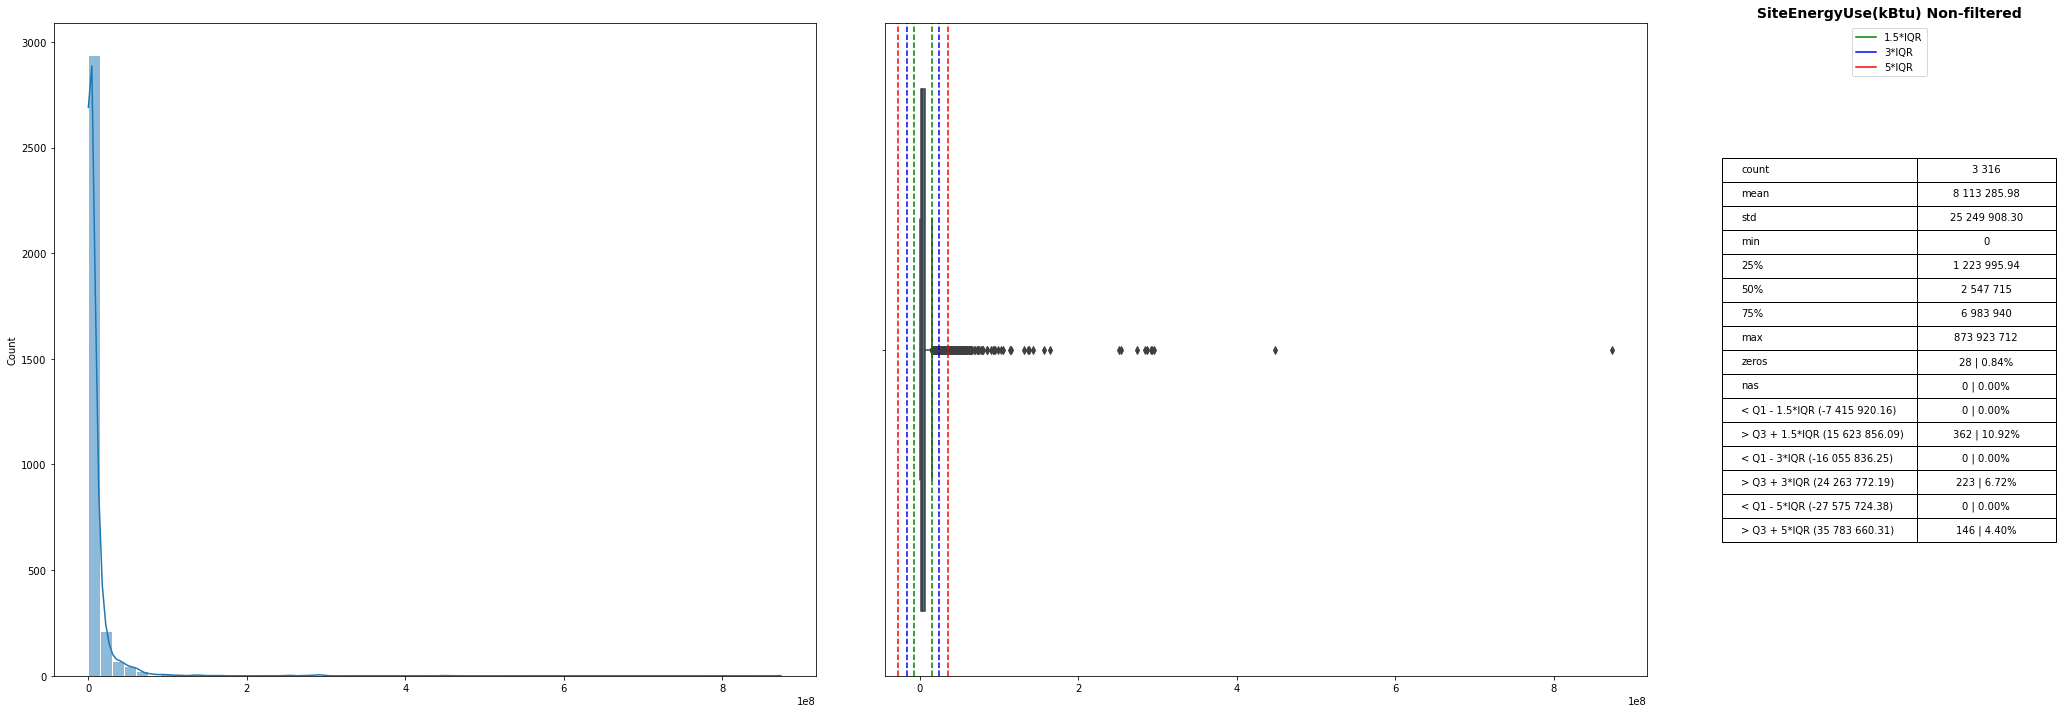

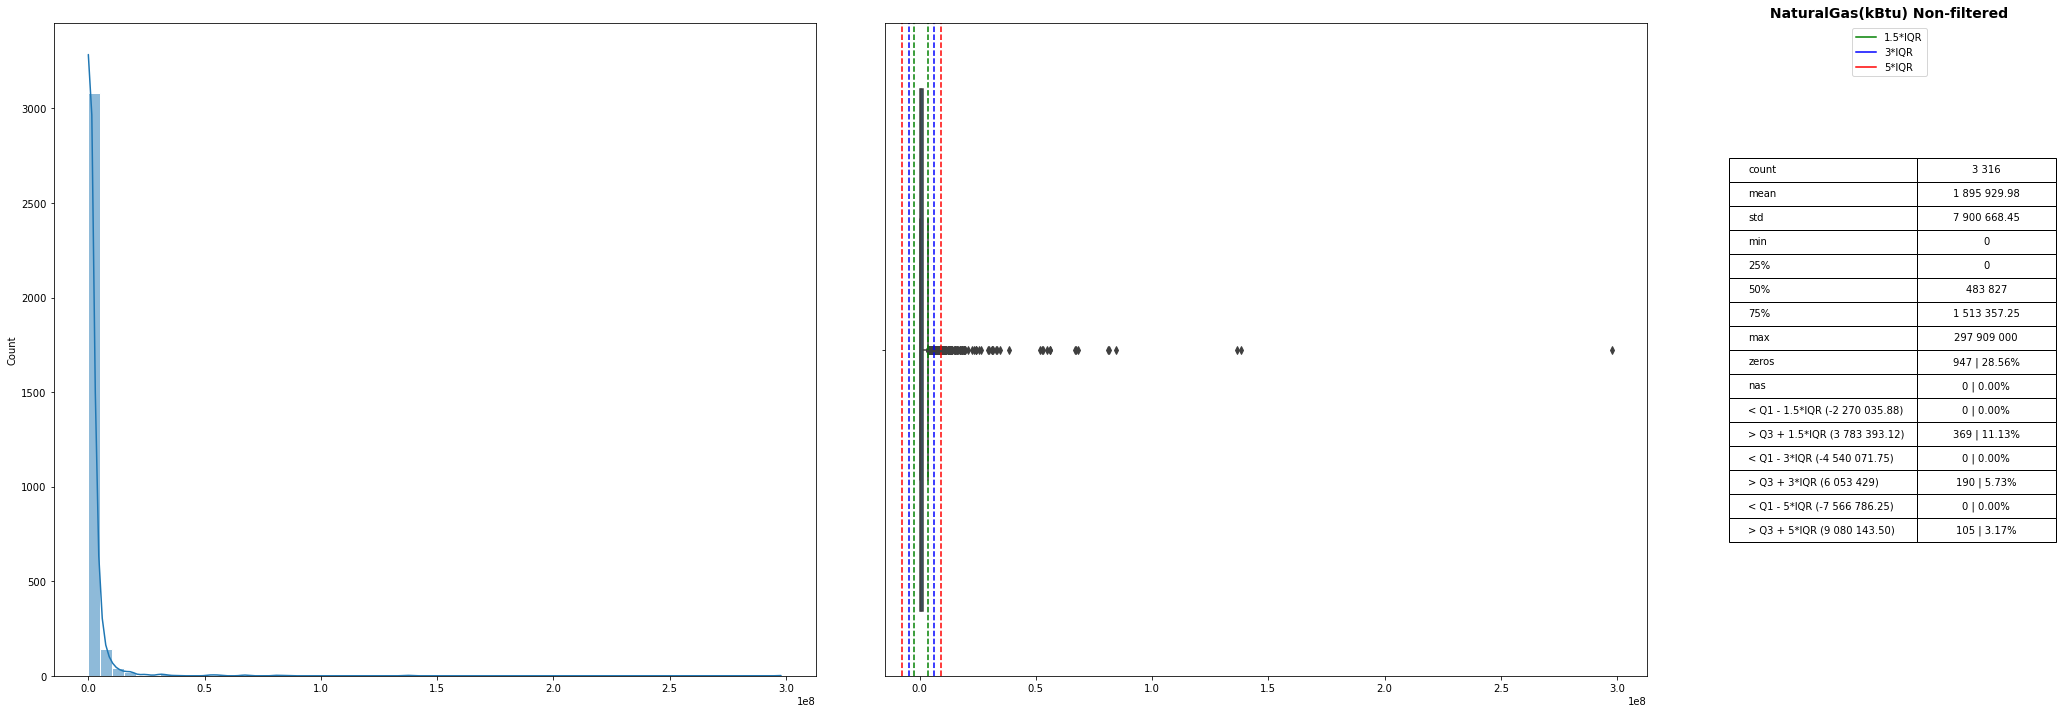

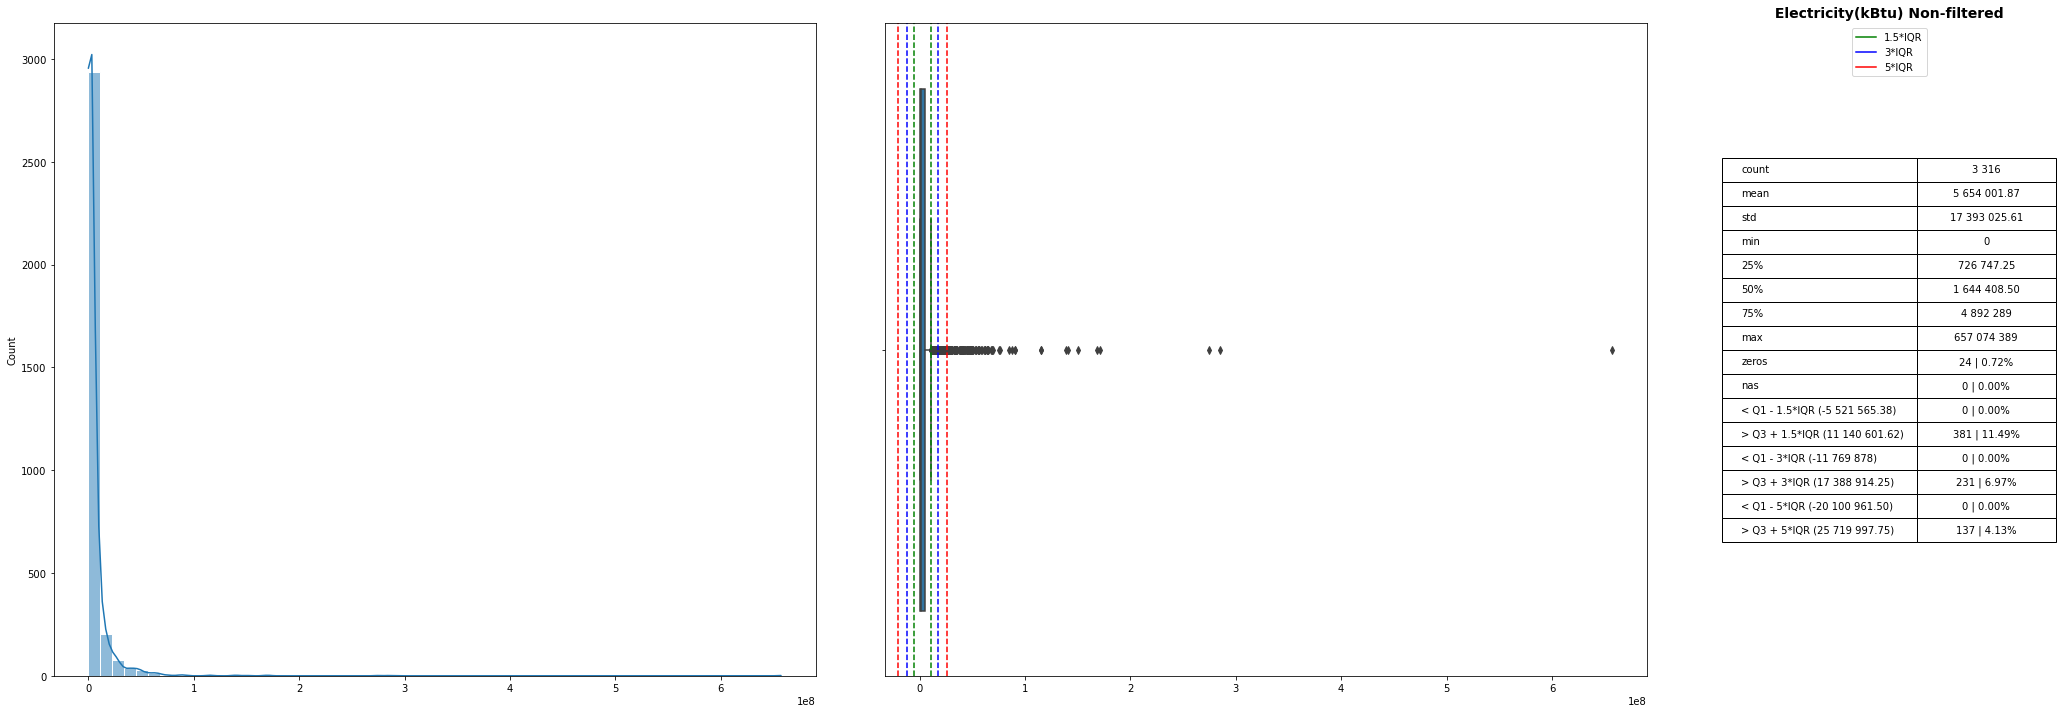

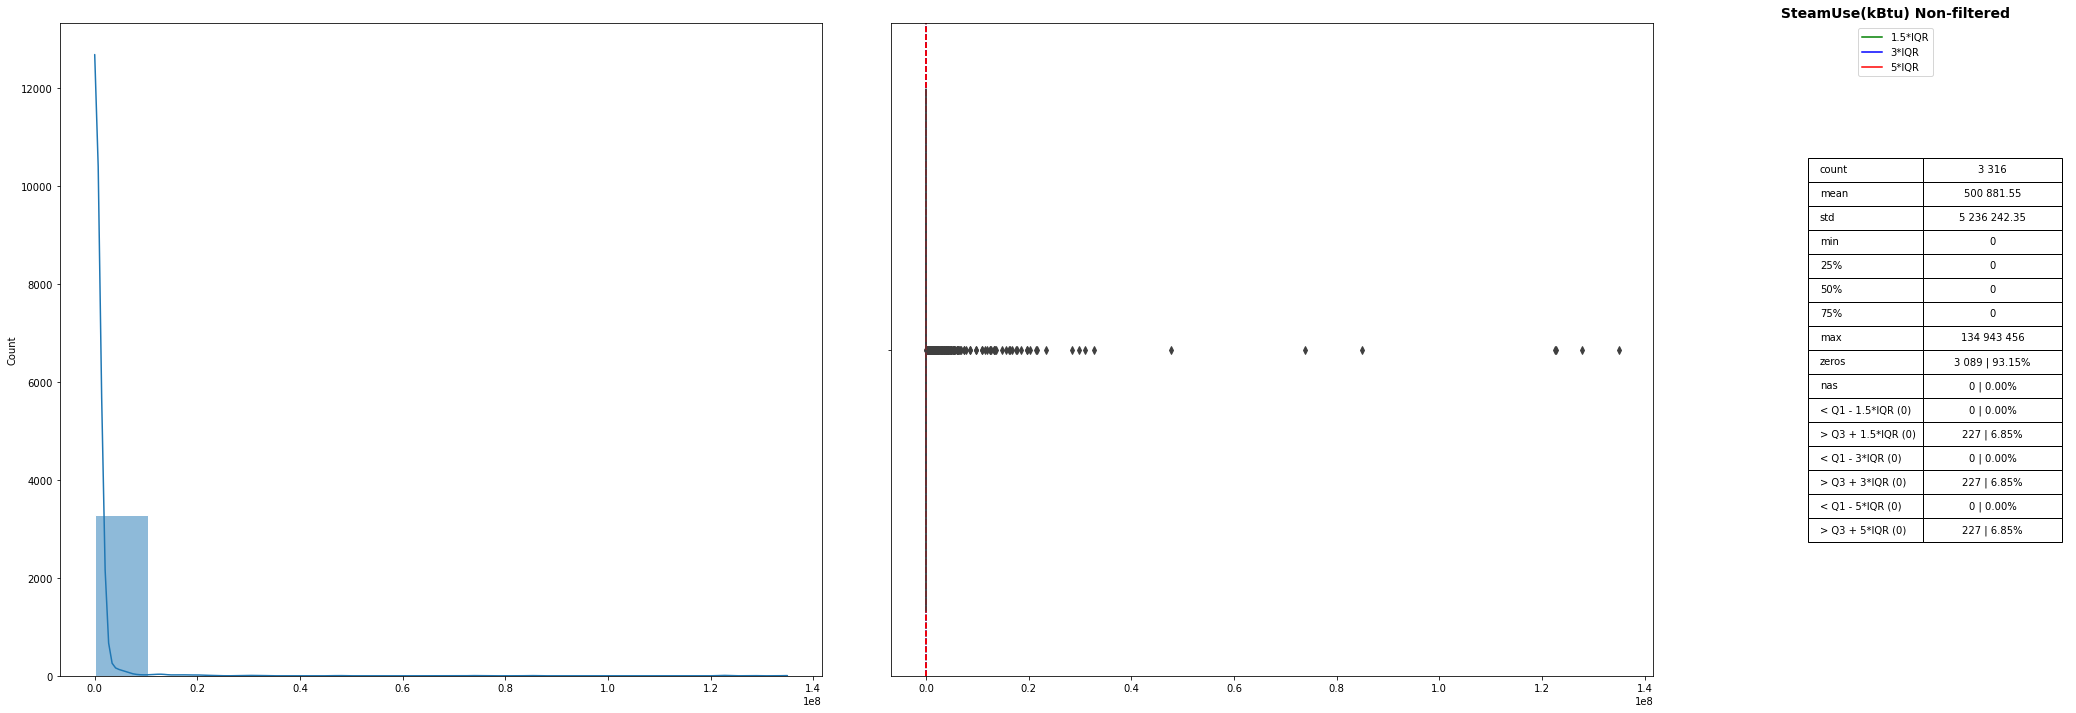

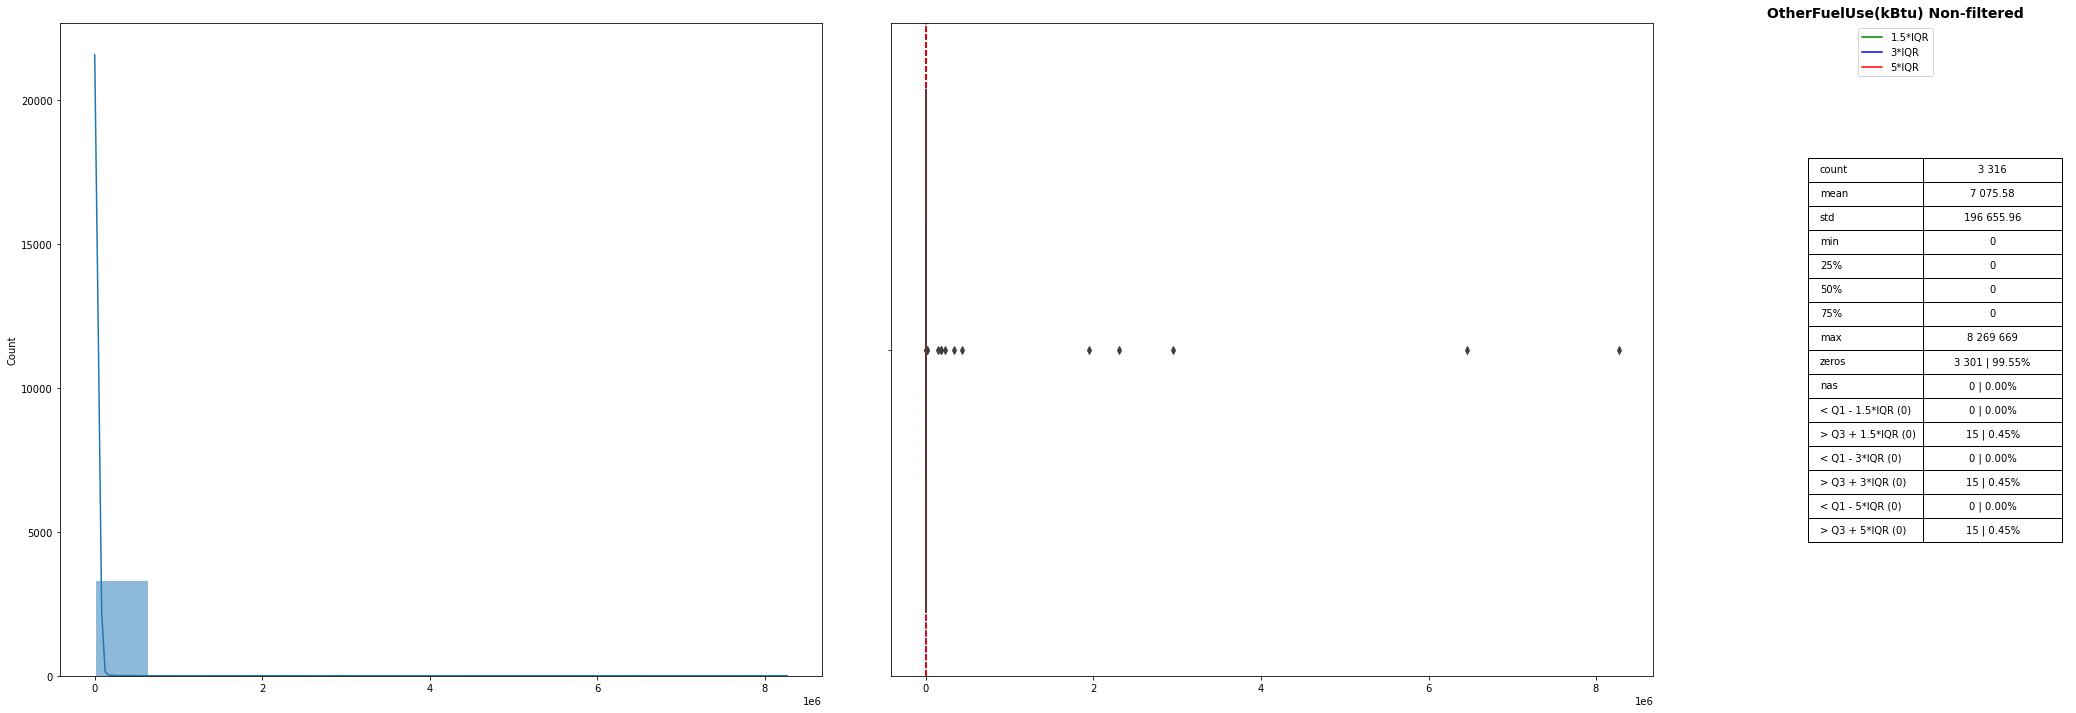

In [31]:
for col in ['SiteEnergyUse(kBtu)','NaturalGas(kBtu)','Electricity(kBtu)','SteamUse(kBtu)','OtherFuelUse(kBtu)']:
    univariate_num(df[col])

### Définition de 'SiteEnergyUse_comp'
On calcule une nouvelle colonne de consommation d'énergie 'SiteEnergyUse_comp', somme des différents apports en énergie

In [32]:
# pas de consommation totale mais composants non-nuls
#selection = df[(df['SiteEnergyUse(kBtu)'] == 0.0) & ( (df['NaturalGas(kBtu)'] != 0.0) | (df['Electricity(kBtu)'] != 0.0) | (df['SteamUse(kBtu)'] != 0.0) | (df['OtherFuelUse(kBtu)'] != 0.0) )]
selection = df[df['SiteEnergyUse(kBtu)'] == 0.0]
display(selection[['NaturalGas(kBtu)','Electricity(kBtu)','SteamUse(kBtu)','OtherFuelUse(kBtu)','SiteEnergyUse(kBtu)']])

# consommation calculée
df['SiteEnergyUse_comp'] = df['NaturalGas(kBtu)'] + df['Electricity(kBtu)'] + df['SteamUse(kBtu)'] + df['OtherFuelUse(kBtu)']
#df['SiteEnergyUse_diff'] = df['SiteEnergyUse(kBtu)'] - df['SiteEnergyUse_comp']

#df.loc[selection.index,'SiteEnergyUse(kBtu)'] = df.loc[selection.index,'SiteEnergyUse_comp']
display(df.loc[selection.index,['NaturalGas(kBtu)','Electricity(kBtu)','SteamUse(kBtu)','OtherFuelUse(kBtu)','SiteEnergyUse(kBtu)','SiteEnergyUse_comp']])

NaturalGas(kBtu)  Electricity(kBtu)  SteamUse(kBtu)  OtherFuelUse(kBtu)  \
44                 0.0                0.0             0.0                 0.0   
62                 0.0                0.0             0.0                 0.0   
572                0.0                0.0             0.0                 0.0   
719                0.0                0.0             0.0                 0.0   
1358               0.0                0.0             0.0                 0.0   
1360               0.0                0.0             0.0                 0.0   
2108               0.0                0.0             0.0                 0.0   
2381               0.0                0.0             0.0                 0.0   
2406               0.0                0.0             0.0                 0.0   
3368               0.0                0.0             0.0                 0.0   
3371               0.0          1496816.0             0.0                 0.0   
3402               0.0           600813.0             0.0                 0.0   
3421               0.0          1698176.0             0.0                 0.0   
3425               0.0          2347138.0             0.0                 0.0   
3435               0.0          2104286.0             0.0                 0.0   
3473         4318917.0                0.0             0.0                 0.0   
3479         3217877.0                0.0             0.0                 0.0   
3492               0.0                0.0             0.0                 0.0   
3644               0.0                0.0             0.0                 0.0   
3918               0.0                0.0             0.0                 0.0   
3954               0.0          1957268.0             0.0                 0.0   
3970               0.0          1433596.0             0.0                 0.0   
4086               0.0                0.0             0.0                 0.0   
4100               0.0                0.0             0.0                 0.0   
4701               0.0                0.0             0.0                 0.0   
5234          945537.0                0.0             0.0                 0.0   
6010               0.0                0.0             0.0                 0.0   
6506         4993620.0                0.0             0.0                 0.0   

      SiteEnergyUse(kBtu)  
44                    0.0  
62                    0.0  
572                   0.0  
719                   0.0  
1358                  0.0  
1360                  0.0  
2108                  0.0  
2381                  0.0  
2406                  0.0  
3368                  0.0  
3371                  0.0  
3402                  0.0  
3421                  0.0  
3425                  0.0  
3435                  0.0  
3473                  0.0  
3479                  0.0  
3492                  0.0  
3644                  0.0  
3918                  0.0  
3954                  0.0  
3970                  0.0  
4086                  0.0  
4100                  0.0  
4701                  0.0  
5234                  0.0  
6010                  0.0  
6506                  0.0

NaturalGas(kBtu)  Electricity(kBtu)  SteamUse(kBtu)  OtherFuelUse(kBtu)  \
44                 0.0                0.0             0.0                 0.0   
62                 0.0                0.0             0.0                 0.0   
572                0.0                0.0             0.0                 0.0   
719                0.0                0.0             0.0                 0.0   
1358               0.0                0.0             0.0                 0.0   
1360               0.0                0.0             0.0                 0.0   
2108               0.0                0.0             0.0                 0.0   
2381               0.0                0.0             0.0                 0.0   
2406               0.0                0.0             0.0                 0.0   
3368               0.0                0.0             0.0                 0.0   
3371               0.0          1496816.0             0.0                 0.0   
3402               0.0           600813.0             0.0                 0.0   
3421               0.0          1698176.0             0.0                 0.0   
3425               0.0          2347138.0             0.0                 0.0   
3435               0.0          2104286.0             0.0                 0.0   
3473         4318917.0                0.0             0.0                 0.0   
3479         3217877.0                0.0             0.0                 0.0   
3492               0.0                0.0             0.0                 0.0   
3644               0.0                0.0             0.0                 0.0   
3918               0.0                0.0             0.0                 0.0   
3954               0.0          1957268.0             0.0                 0.0   
3970               0.0          1433596.0             0.0                 0.0   
4086               0.0                0.0             0.0                 0.0   
4100               0.0                0.0             0.0                 0.0   
4701               0.0                0.0             0.0                 0.0   
5234          945537.0                0.0             0.0                 0.0   
6010               0.0                0.0             0.0                 0.0   
6506         4993620.0                0.0             0.0                 0.0   

      SiteEnergyUse(kBtu)  SiteEnergyUse_comp  
44                    0.0                 0.0  
62                    0.0                 0.0  
572                   0.0                 0.0  
719                   0.0                 0.0  
1358                  0.0                 0.0  
1360                  0.0                 0.0  
2108                  0.0                 0.0  
2381                  0.0                 0.0  
2406                  0.0                 0.0  
3368                  0.0                 0.0  
3371                  0.0           1496816.0  
3402                  0.0            600813.0  
3421                  0.0           1698176.0  
3425                  0.0           2347138.0  
3435                  0.0           2104286.0  
3473                  0.0           4318917.0  
3479                  0.0           3217877.0  
3492                  0.0                 0.0  
3644                  0.0                 0.0  
3918                  0.0                 0.0  
3954                  0.0           1957268.0  
3970                  0.0           1433596.0  
4086                  0.0                 0.0  
4100                  0.0                 0.0  
4701                  0.0                 0.0  
5234                  0.0            945537.0  
6010                  0.0                 0.0  
6506                  0.0           4993620.0

### Suppresion des lignes sans consommation d'énergie

In [33]:
df.drop(index=df[df['SiteEnergyUse_comp'] == 0.0].index,inplace=True)

### Etude univariée des colonnes consommation d'energie

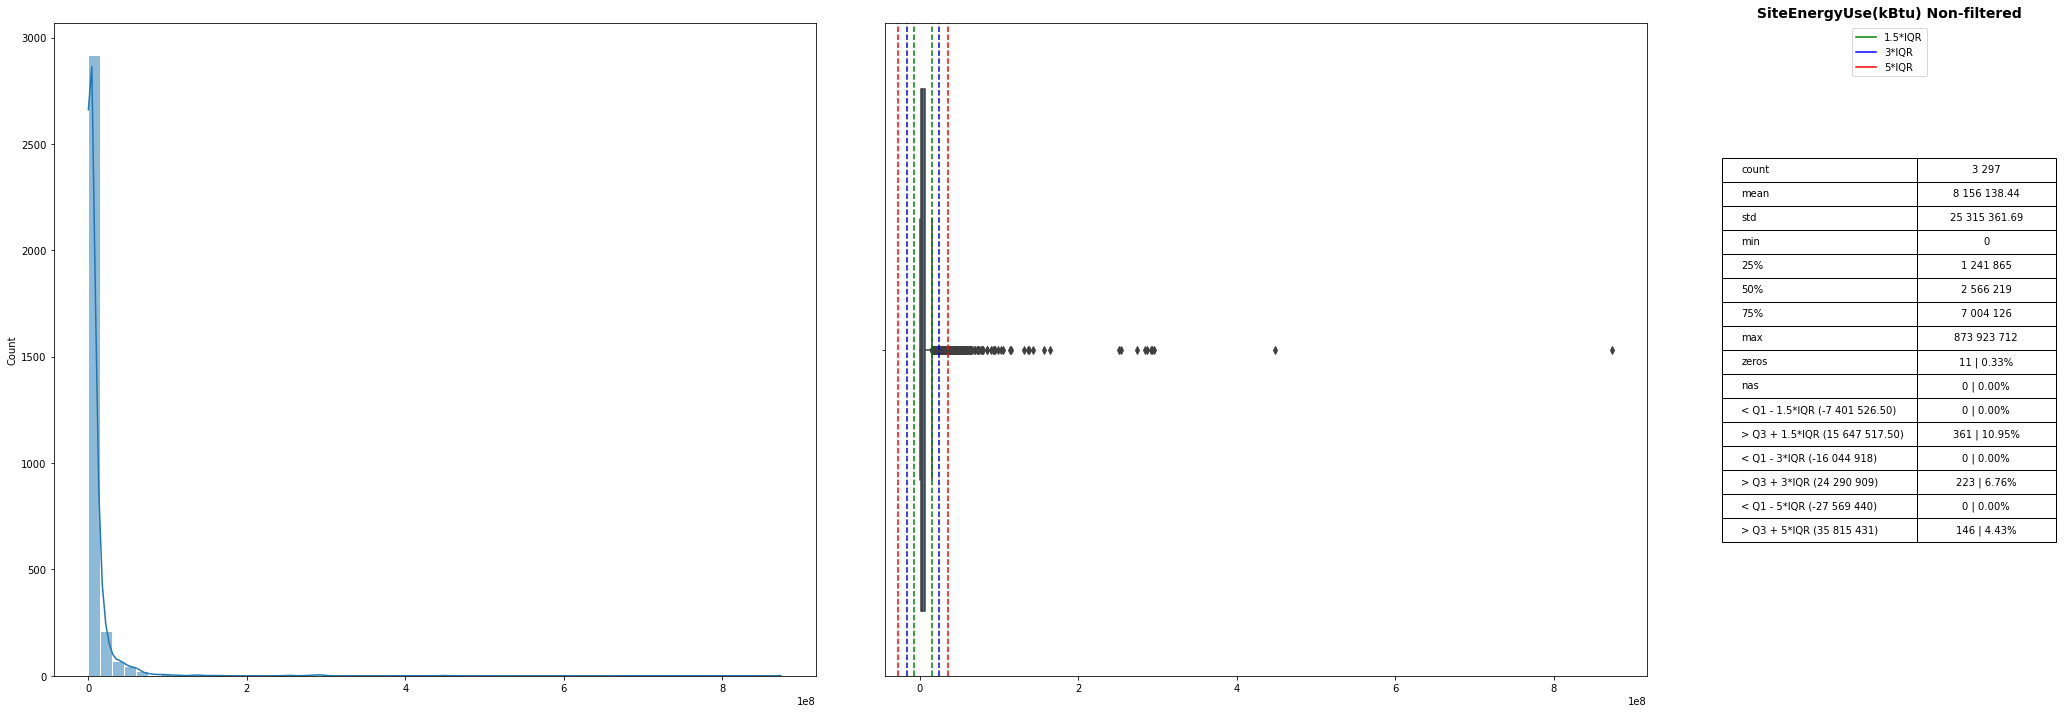

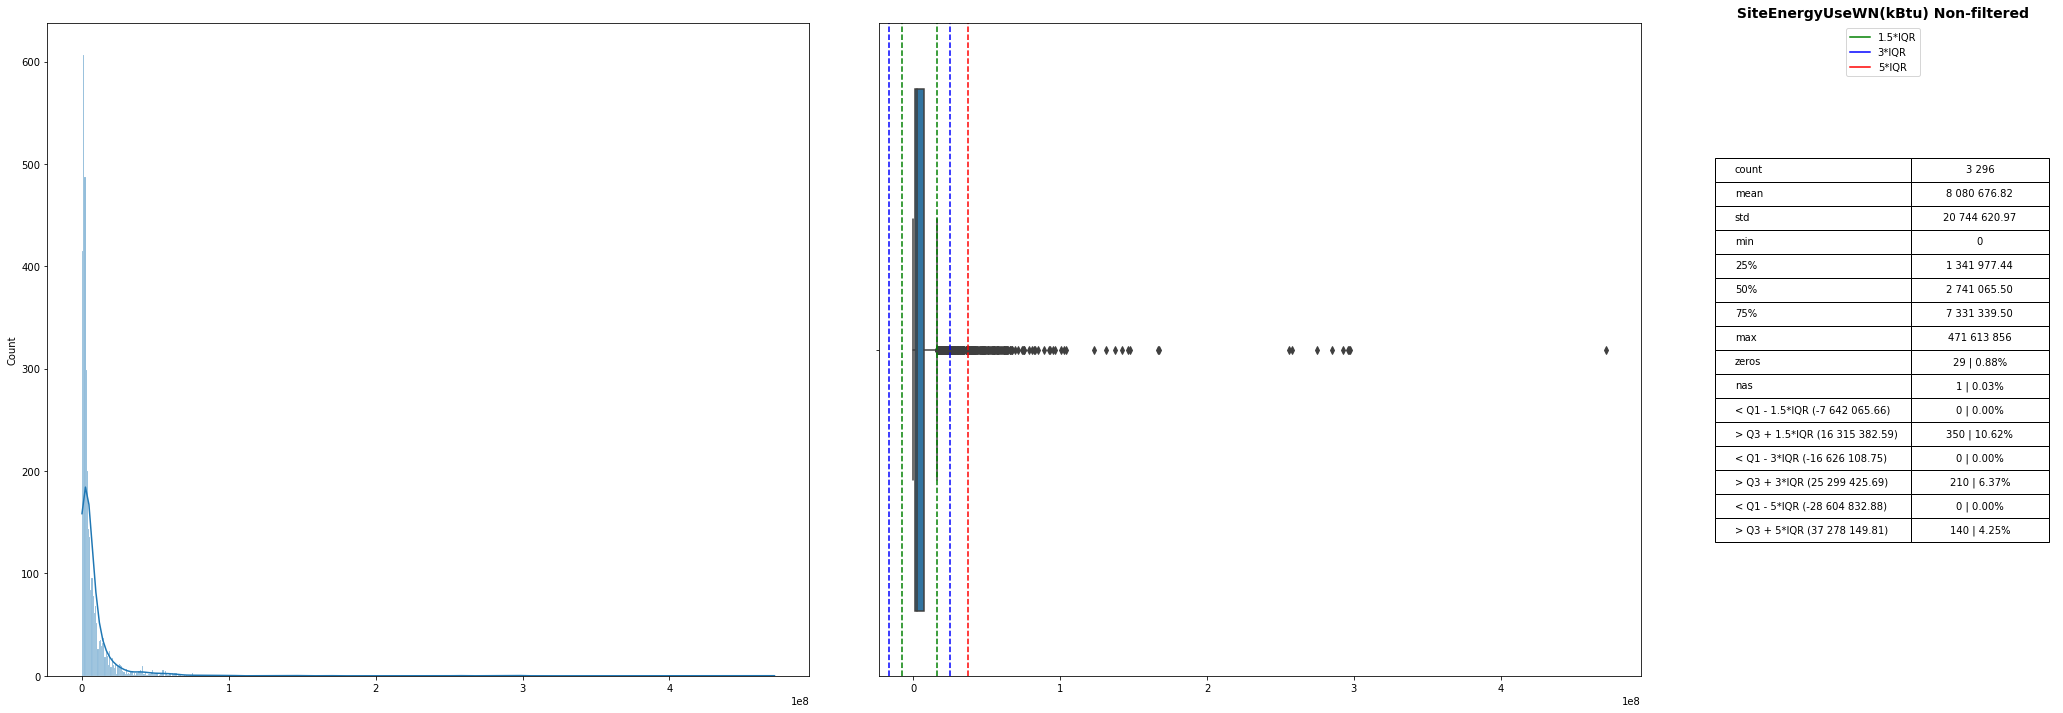

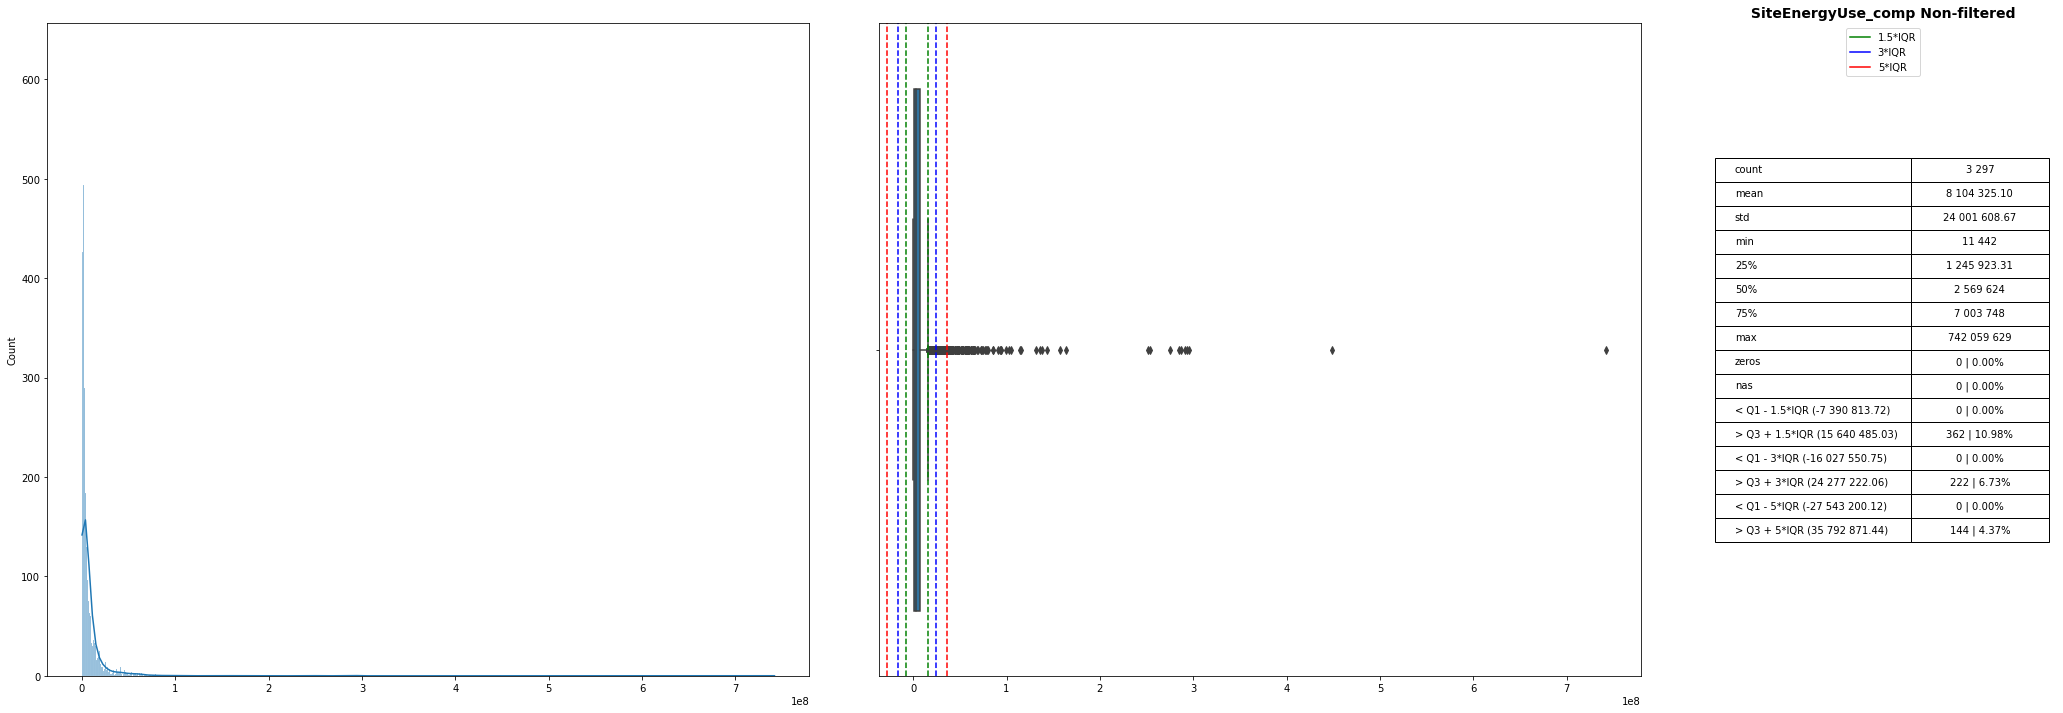

In [34]:
univariate_num(df['SiteEnergyUse(kBtu)'])
univariate_num(df['SiteEnergyUseWN(kBtu)'])
univariate_num(df['SiteEnergyUse_comp'])

#####  Etude conjointe 'SiteEnergyUse(kBtu)' et 'SiteEnergyUseWN(kBtu)'

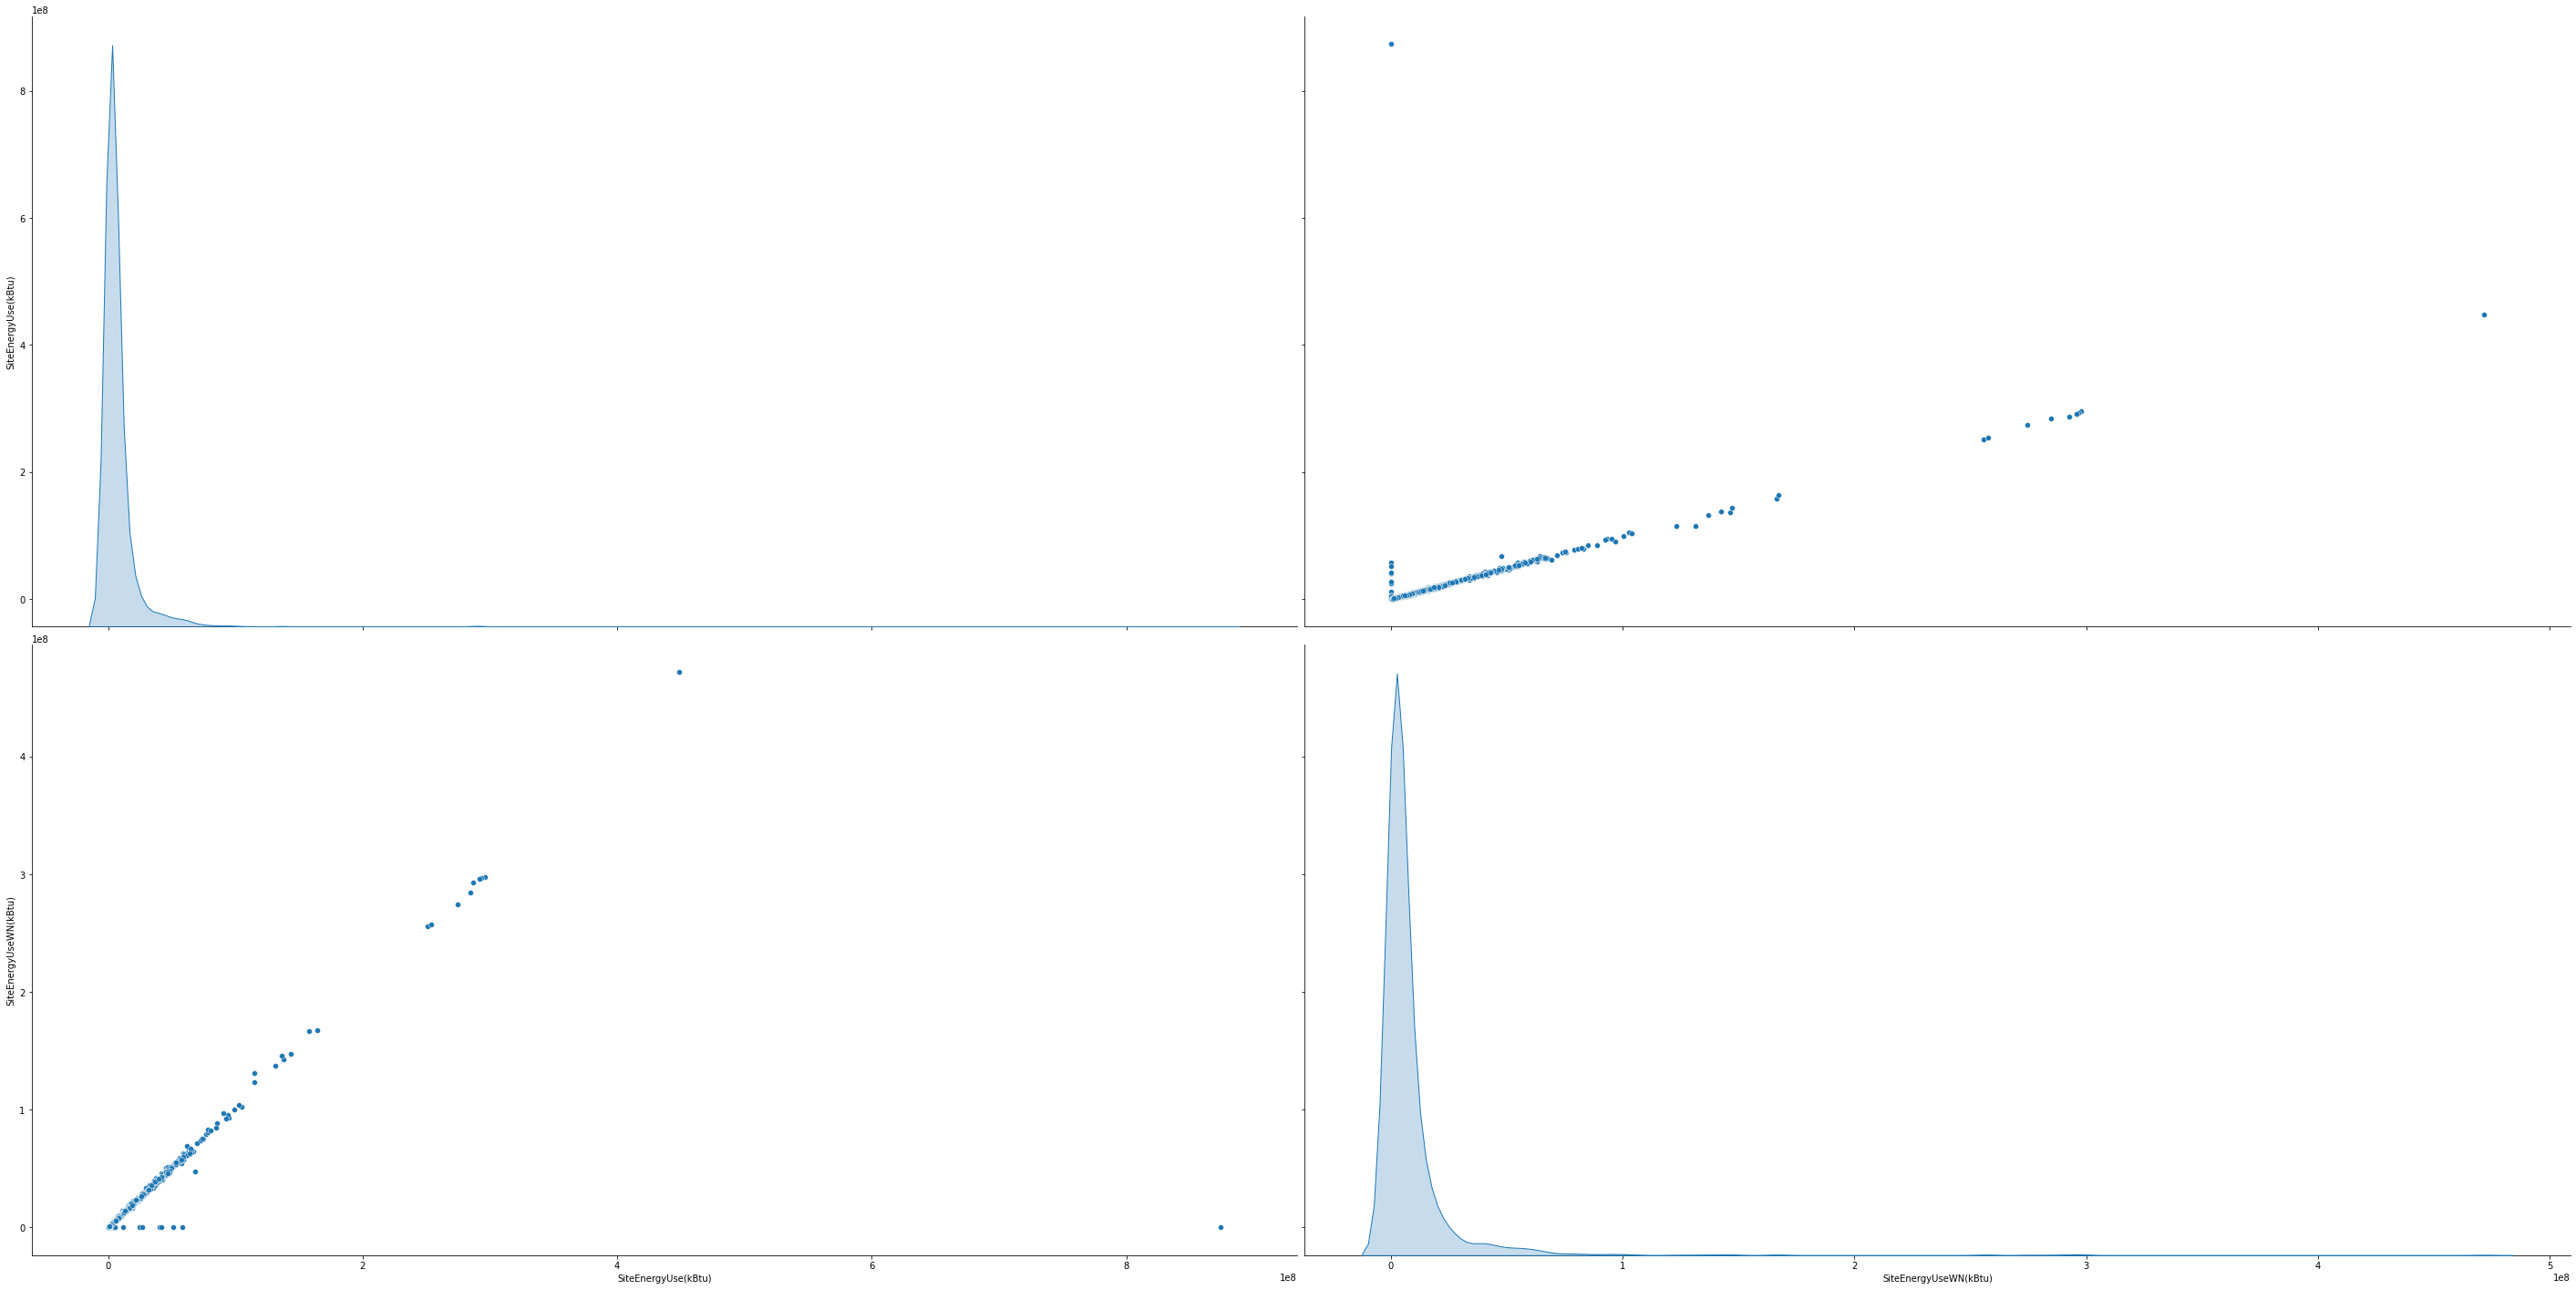

In [35]:
_ = sns.pairplot(df,vars=['SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)'],height=10,aspect=2,diag_kind='kde')

#####  Etude conjointe 'SiteEnergyUse(kBtu)' et 'SiteEnergyUse_comp'

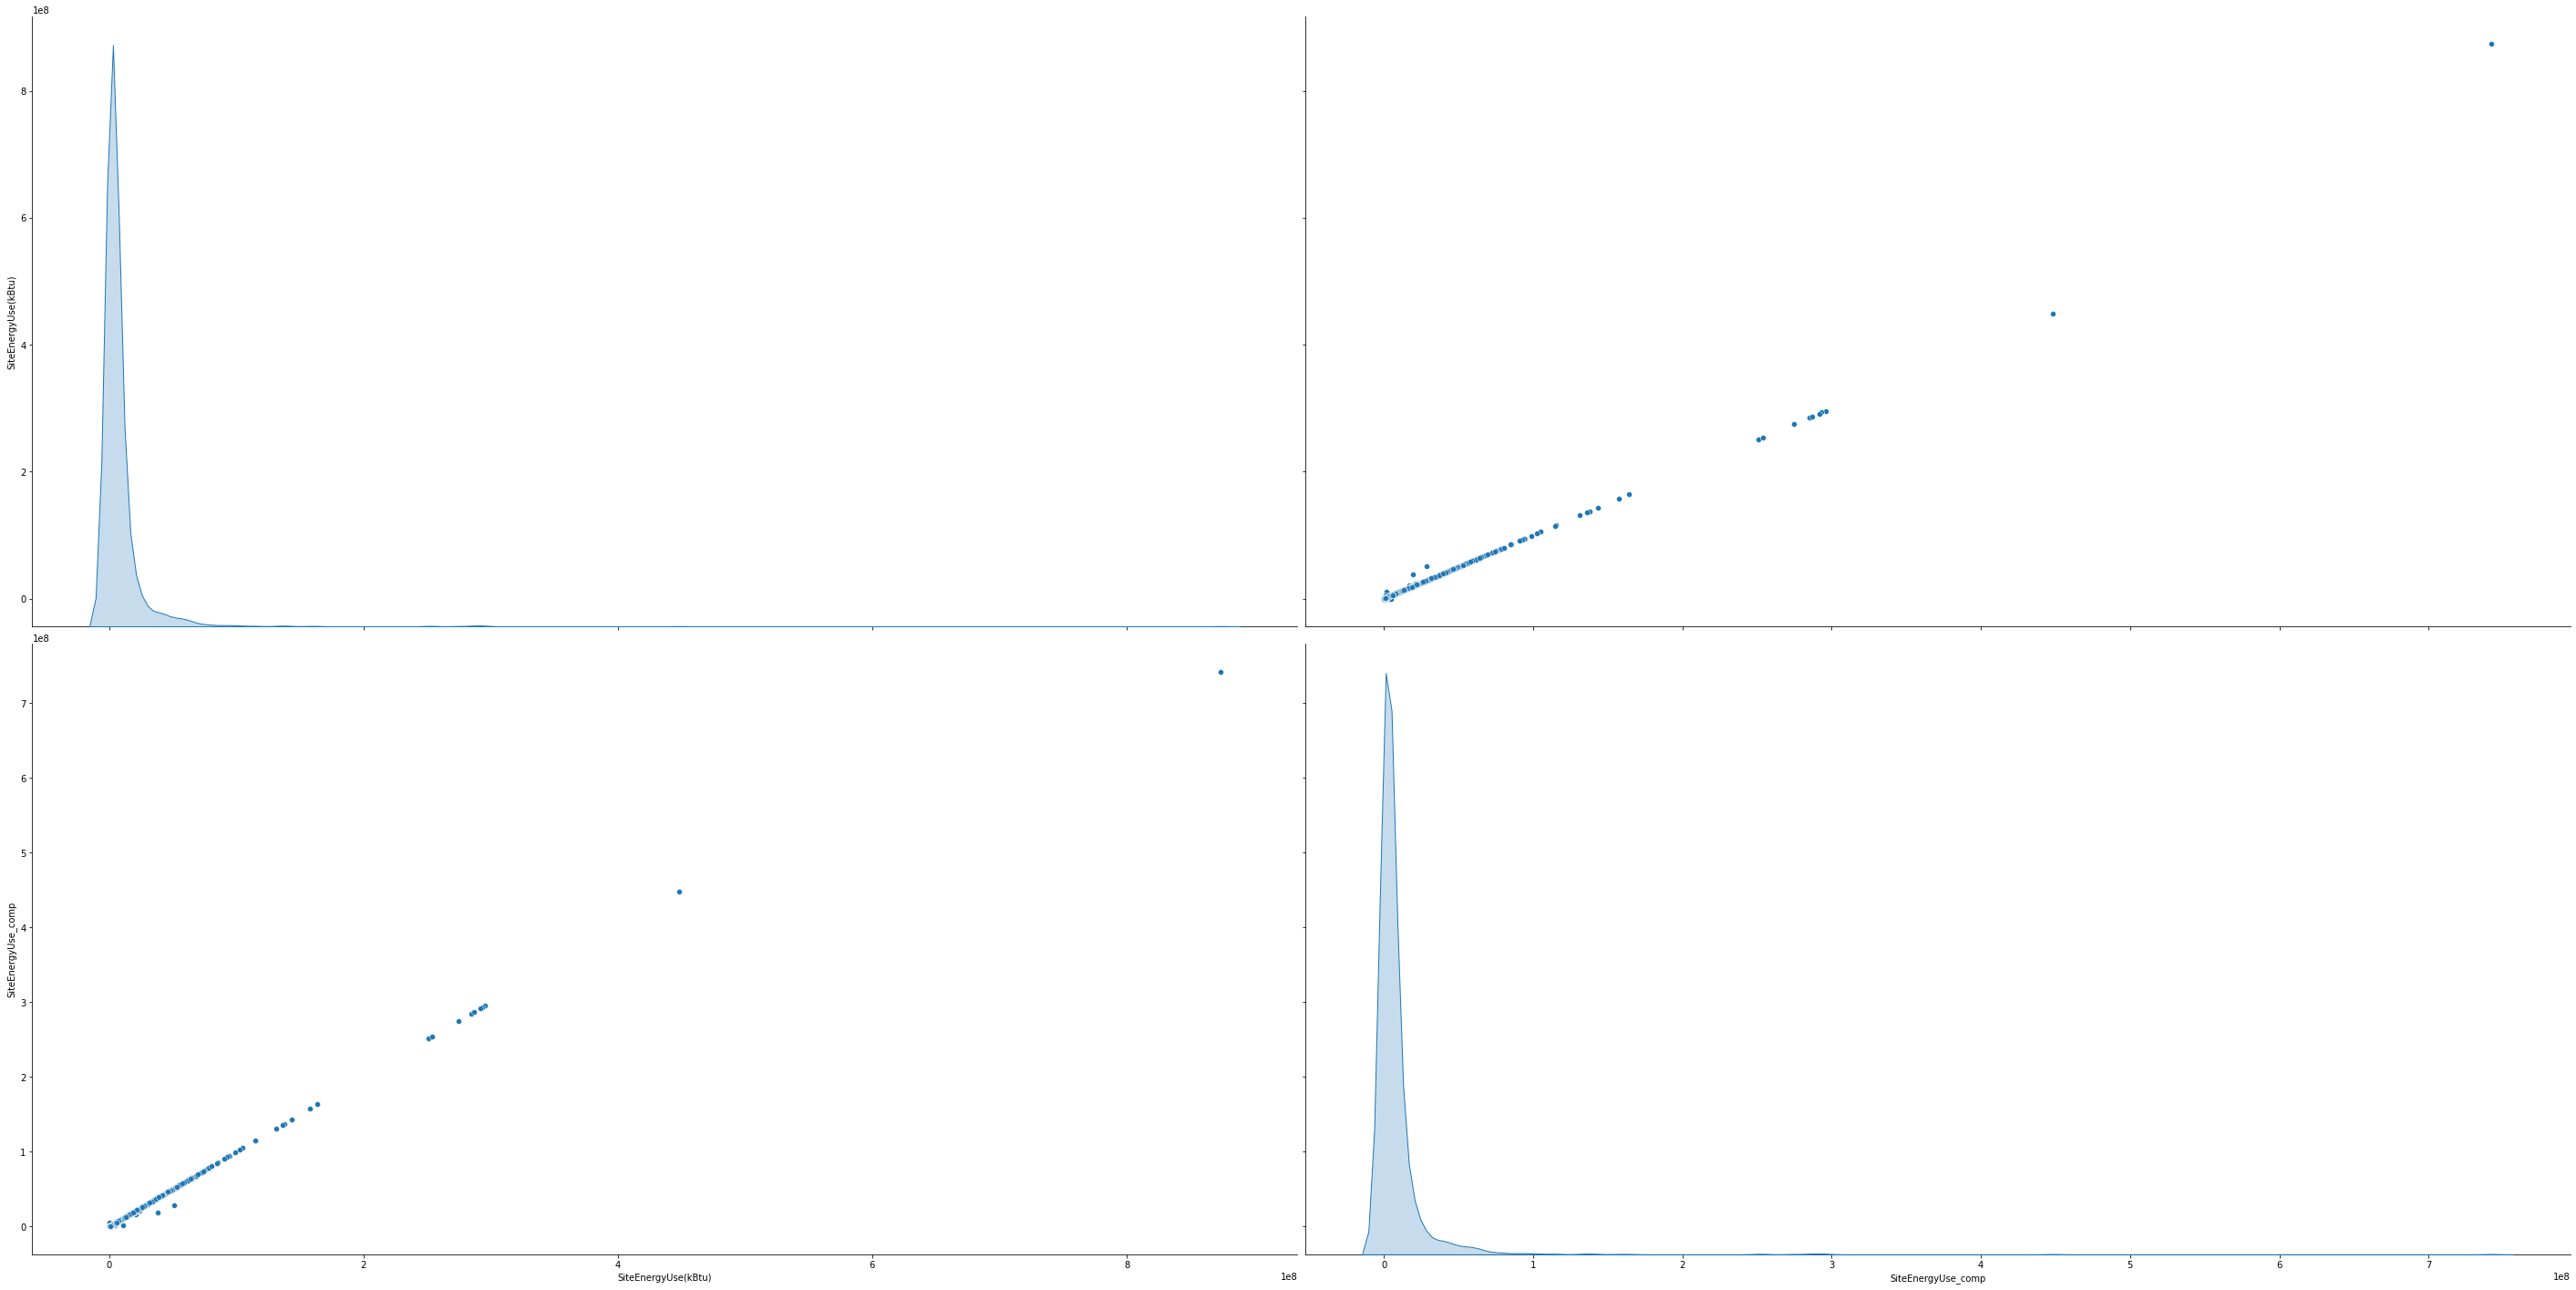

In [36]:
_ = sns.pairplot(df,vars=['SiteEnergyUse(kBtu)','SiteEnergyUse_comp'],height=10,aspect=2,diag_kind='kde')

On fait une régression linéaire de 'SiteEnergyUse(kBtu)' sur 'SiteEnergyUse_comp'. On filtre les points pour lesquels l'erreur est supérieure à 3 sigma.  
Et ensuite, on reprend l'étude conjointe.

a: 0.9450849037586492
b: 396081.79602986947
R2: 0.9936403619272967


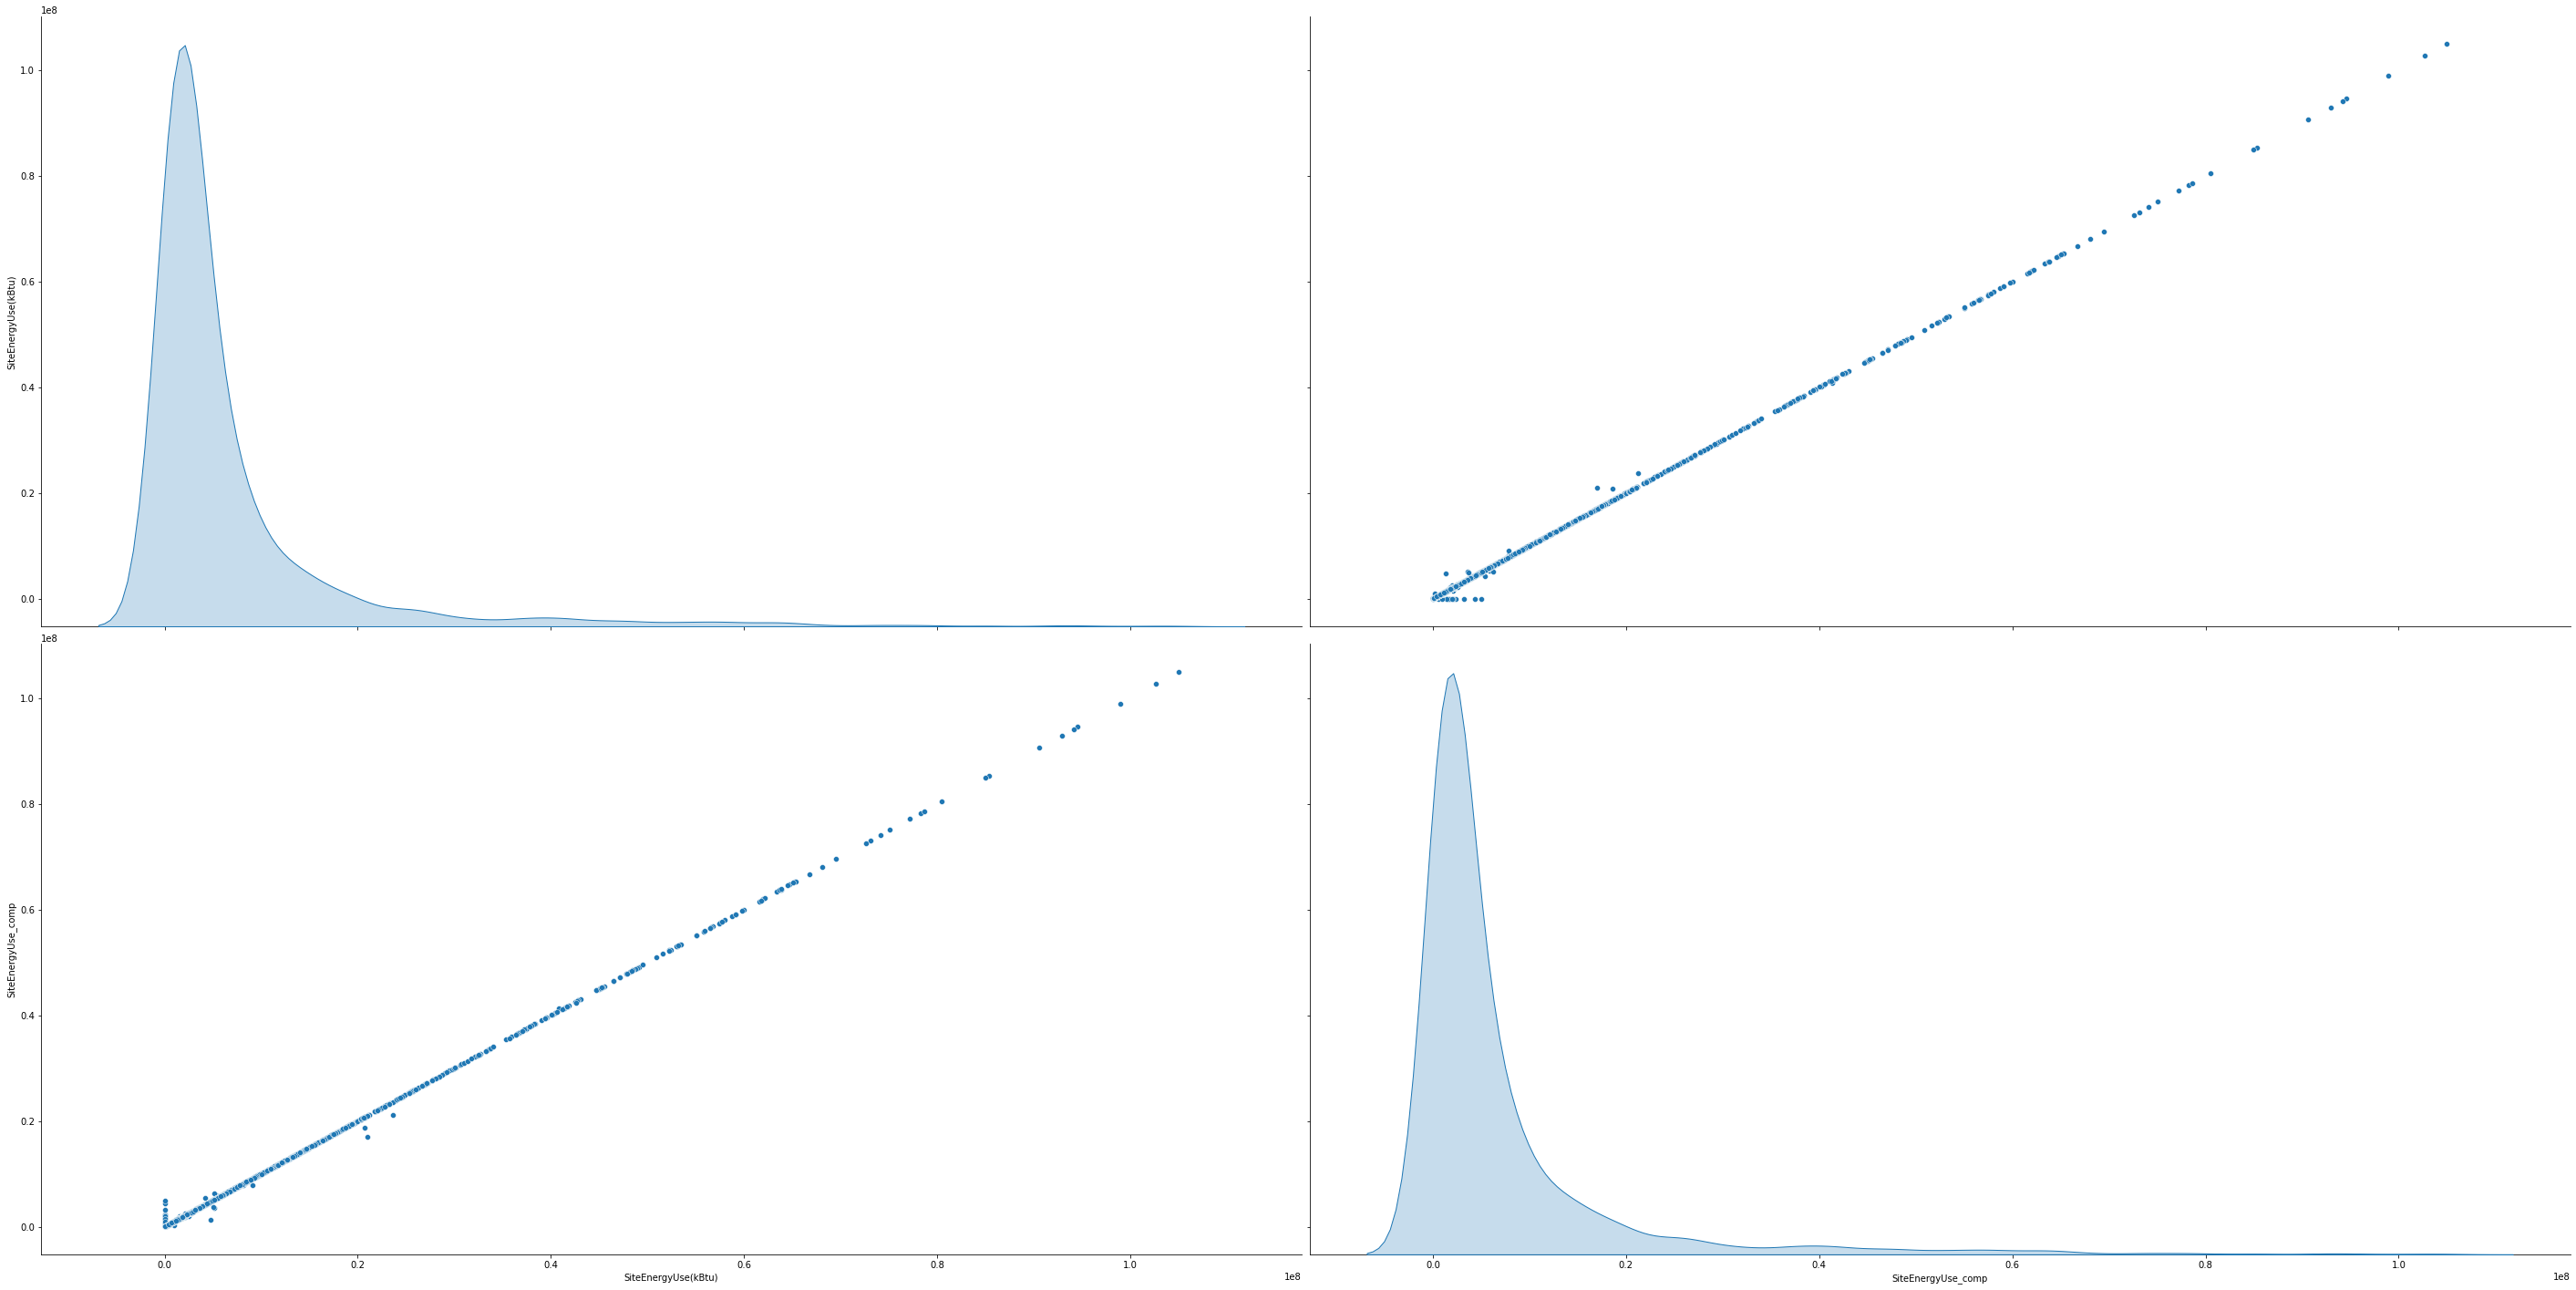

In [37]:
X = df['SiteEnergyUse(kBtu)'].values
Y = df['SiteEnergyUse_comp'].values
#fit= np.polyfit(X,Y,1)
a,b,*rest = scipy.stats.linregress(X, Y)
print(f'a: {a}')
print(f'b: {b}')
print(f'R2: {rest[0]**2}')
poly = np.poly1d([a,b])
diff =  Y - poly(X)
mask = abs(diff) < 3*diff.std()
df_filtered = df[mask][['SiteEnergyUse(kBtu)','SiteEnergyUse_comp','SiteEUI(kBtu/sf)','GHGEmissions','GHGEmissionsIntensity']]
_ = sns.pairplot(df_filtered,vars=['SiteEnergyUse(kBtu)','SiteEnergyUse_comp'],height=10,aspect=2,diag_kind='kde')

Affichage des points où 'SiteEnergyUse(kBtu)' est nulle

In [38]:
selection = df[(df['SiteEnergyUse(kBtu)'] == 0.0) & (df['SiteEnergyUse_comp'] != 0.0)]
display(df.loc[selection.index,['NaturalGas(kBtu)','Electricity(kBtu)','SteamUse(kBtu)','OtherFuelUse(kBtu)','SiteEnergyUse(kBtu)','SiteEnergyUse_comp']])

NaturalGas(kBtu)  Electricity(kBtu)  SteamUse(kBtu)  OtherFuelUse(kBtu)  \
3371               0.0          1496816.0             0.0                 0.0   
3402               0.0           600813.0             0.0                 0.0   
3421               0.0          1698176.0             0.0                 0.0   
3425               0.0          2347138.0             0.0                 0.0   
3435               0.0          2104286.0             0.0                 0.0   
3473         4318917.0                0.0             0.0                 0.0   
3479         3217877.0                0.0             0.0                 0.0   
3954               0.0          1957268.0             0.0                 0.0   
3970               0.0          1433596.0             0.0                 0.0   
5234          945537.0                0.0             0.0                 0.0   
6506         4993620.0                0.0             0.0                 0.0   

      SiteEnergyUse(kBtu)  SiteEnergyUse_comp  
3371                  0.0           1496816.0  
3402                  0.0            600813.0  
3421                  0.0           1698176.0  
3425                  0.0           2347138.0  
3435                  0.0           2104286.0  
3473                  0.0           4318917.0  
3479                  0.0           3217877.0  
3954                  0.0           1957268.0  
3970                  0.0           1433596.0  
5234                  0.0            945537.0  
6506                  0.0           4993620.0

Affichage des données filtrées à 3 sigma

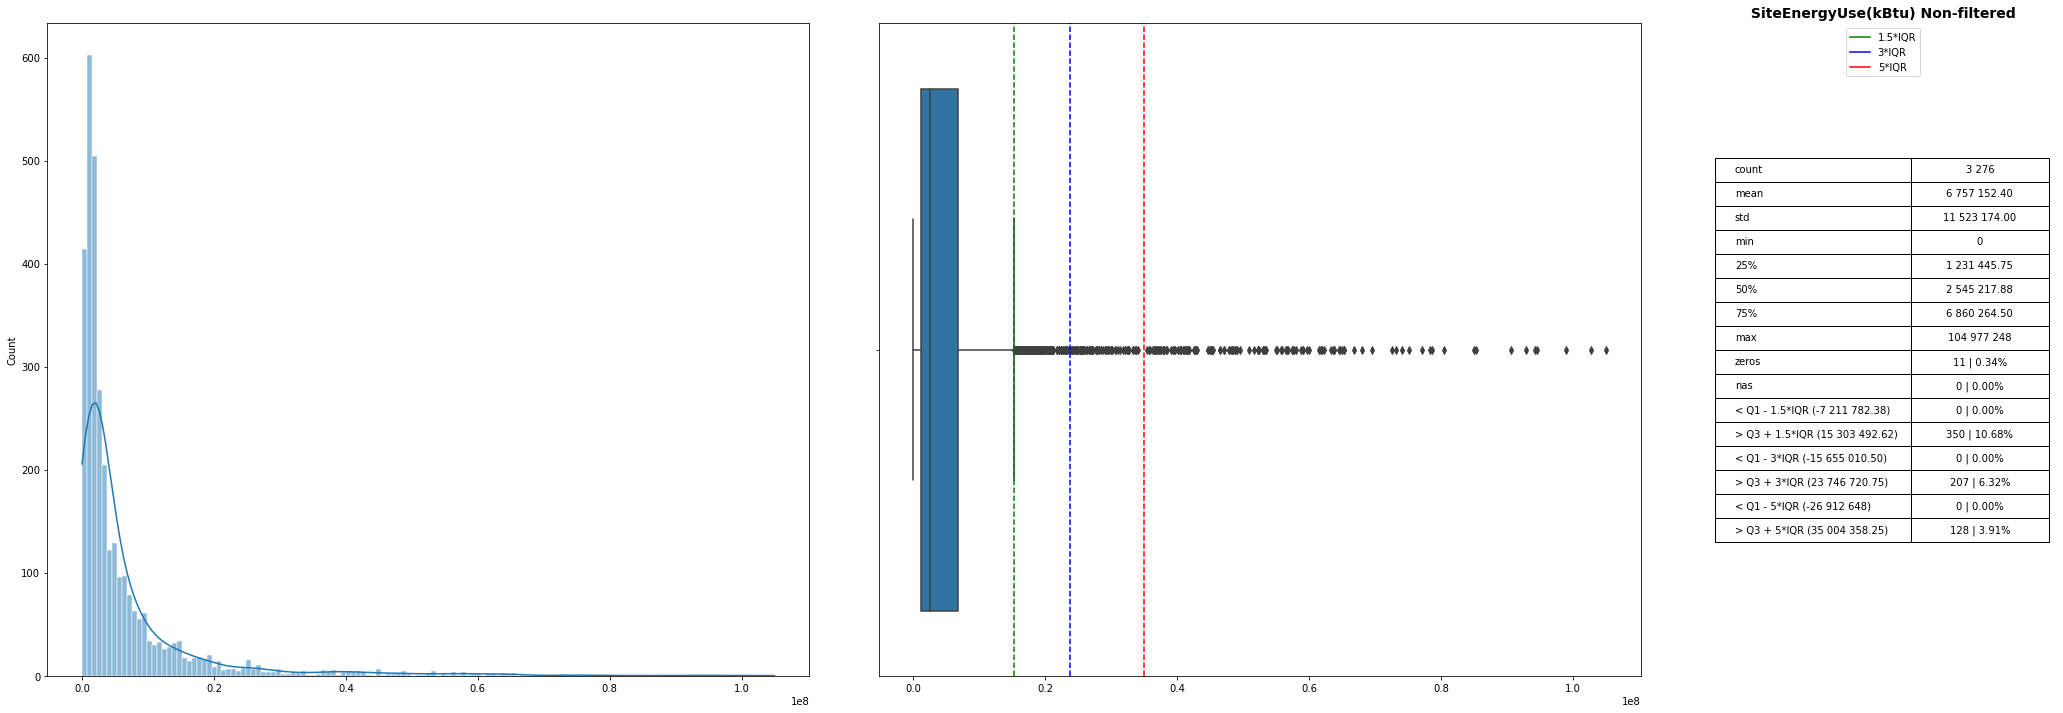

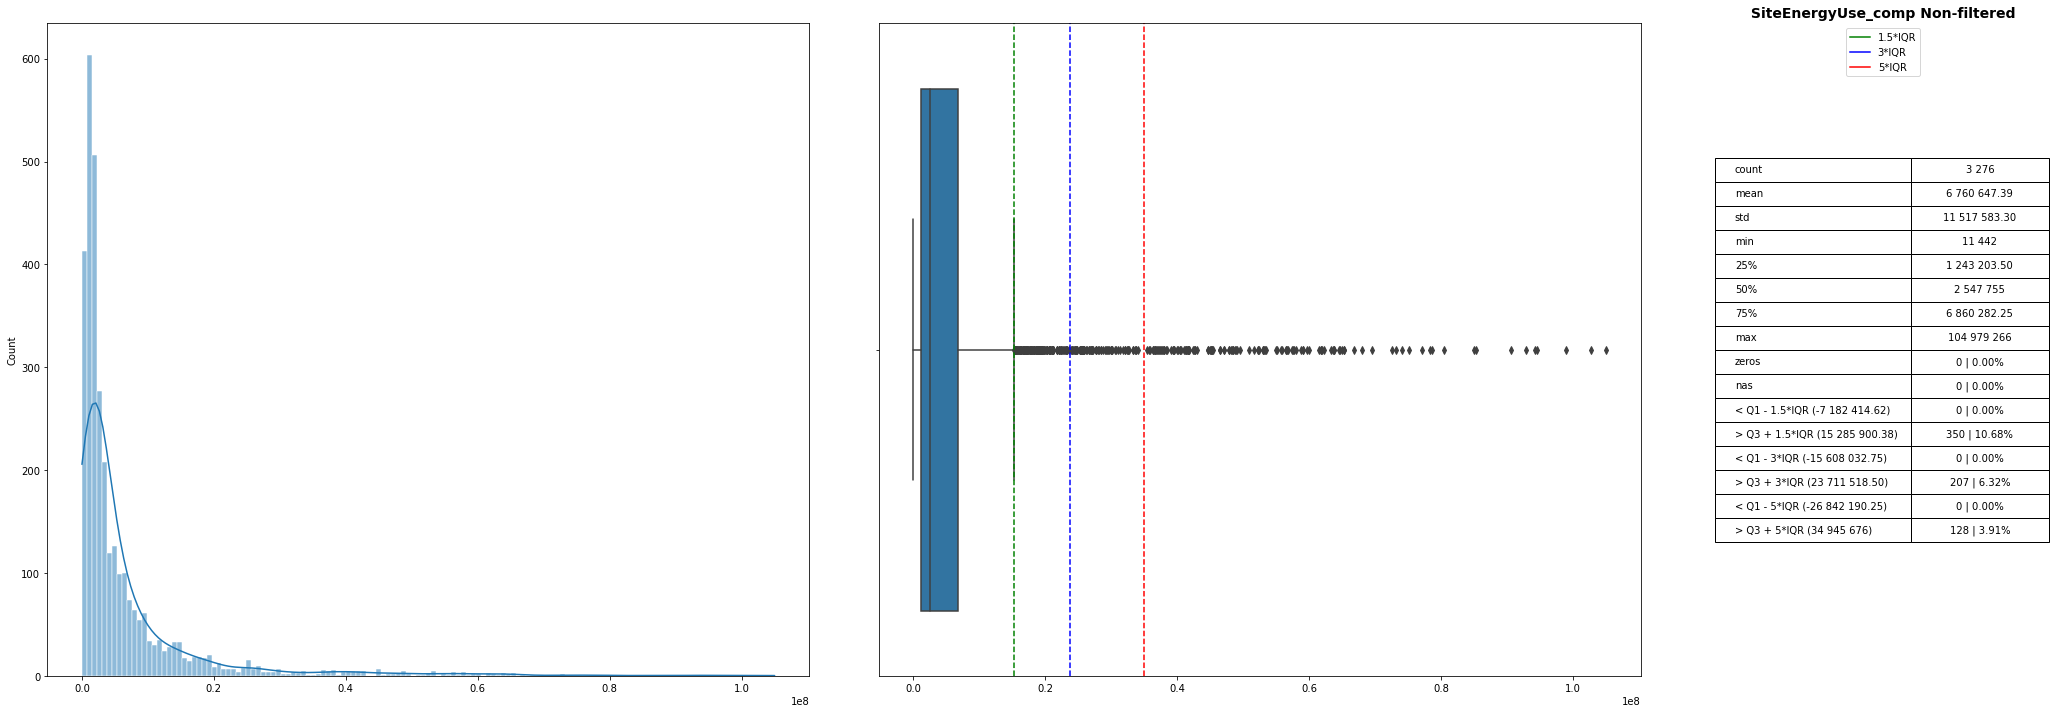

In [39]:
univariate_num(df_filtered['SiteEnergyUse(kBtu)'])
univariate_num(df_filtered['SiteEnergyUse_comp'])

**Conclusions:**
- il y a des différences entre la consmmation d'énergie donnée dans le fichier et la somme des consommations des différetnes énergie => on garde la valeur calculée.
- Un filtrage (basée sur une régression linéaire) n'est pas suffisant pour supprimer les valeurs aberrantes de la consommation d'énergie.

## Emission gaz à effet de serre

### Estimation des émissions de CO2

GHGEmissions(MetricTonsCO2e):<br/>
The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources.
 This uses:<br/>
  Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh.<br/>
  Enwave steam factor = 170.17 lbs CO2e/MMBtu.<br/>
  Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.<br/>

Sur la base de la description, on crée une nouvelle colonne qui correspond à l'émission de gaz à effet de serre ('GHGEmissions_comp').

In [40]:
k = 1000.0
lbs2ton    = 0.453592/k
kwh2kbtu   = 3.4121416
GHGE_elec  = (52.44/k)*lbs2ton/kwh2kbtu
GHGE_steam = (170.17/k)*lbs2ton
GHGE_gas   = 53.11/k/k
selection = df[df['OtherFuelUse(kBtu)'] == 0.0]

df.loc[selection.index,'GHGEmissions_comp'] = GHGE_gas*df['NaturalGas(kBtu)'] + GHGE_elec*df['Electricity(kBtu)'] + GHGE_steam*df['SteamUse(kBtu)']

##### Etude conjointe 'GHGEmissions_comp' et 'GHGEmissions'

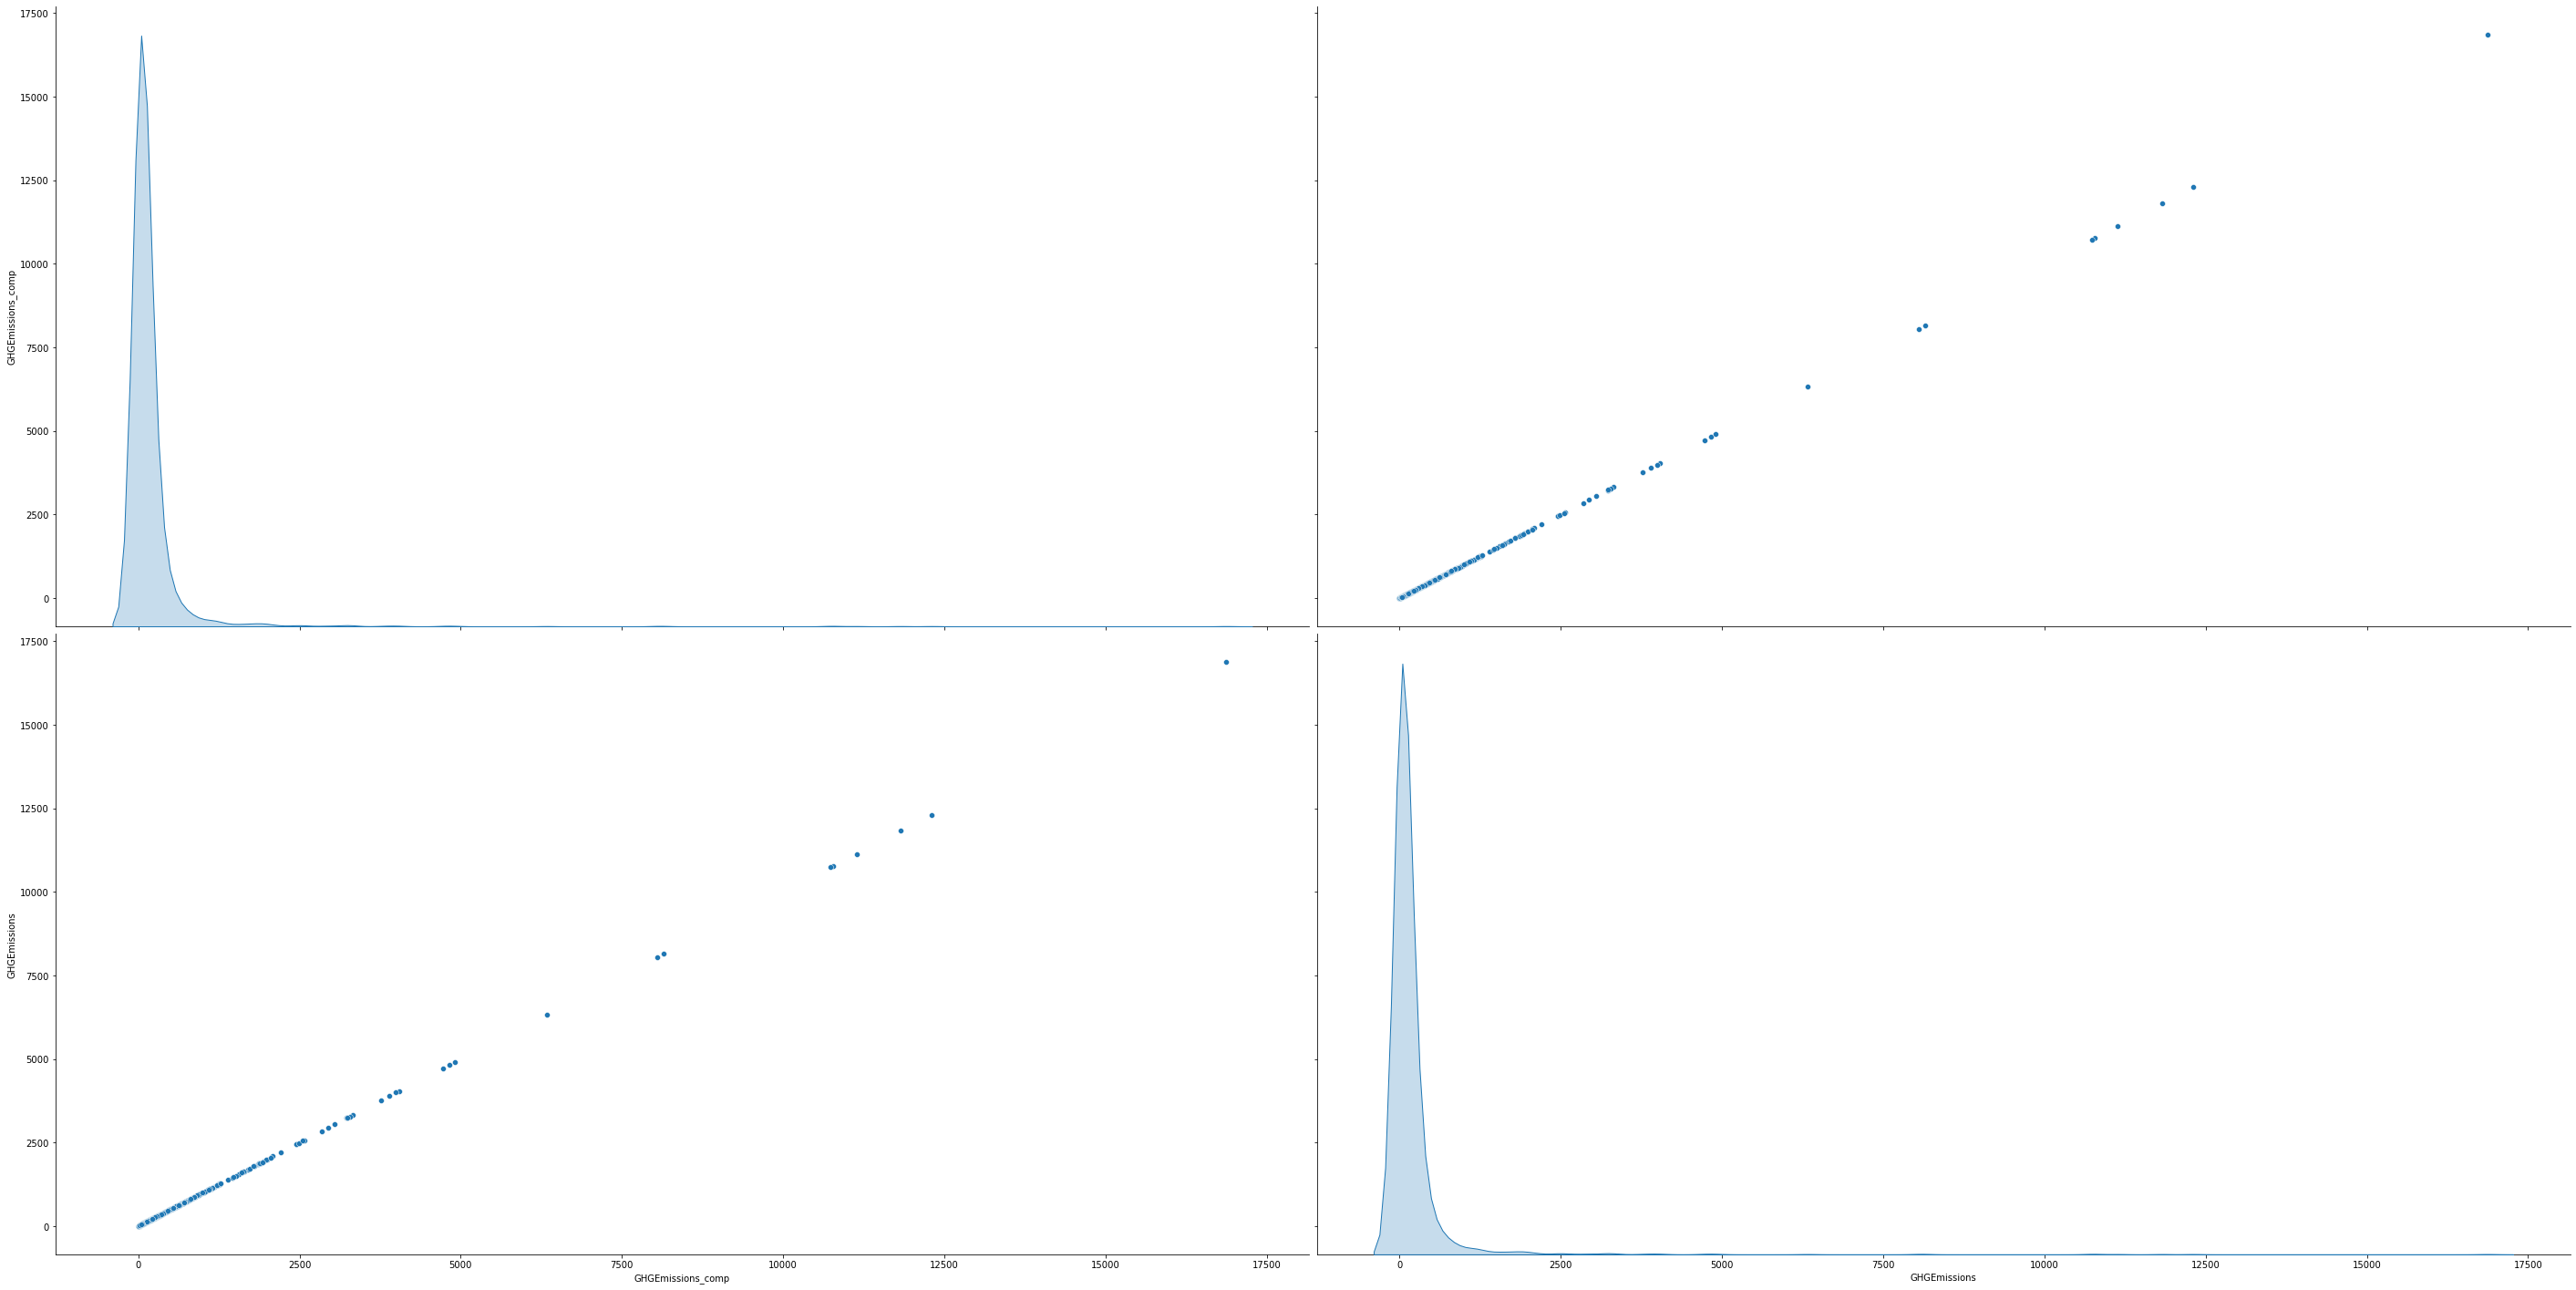

In [41]:
_ = sns.pairplot(df,vars=['GHGEmissions_comp','GHGEmissions'],height=10,aspect=2,diag_kind='kde')

In [42]:
X = df.loc[selection.index,:]['GHGEmissions'].values
Y = df.loc[selection.index,:]['GHGEmissions_comp'].values
#fit= np.polyfit(X,Y,1)
a,b,*rest = scipy.stats.linregress(X, Y)
print(f'a: {a}')
print(f'b: {b}')
print(f'R2: {rest[0]**2}')

a: 0.9999953552238208
b: -0.00016041311215531096
R2: 0.9999999999485052


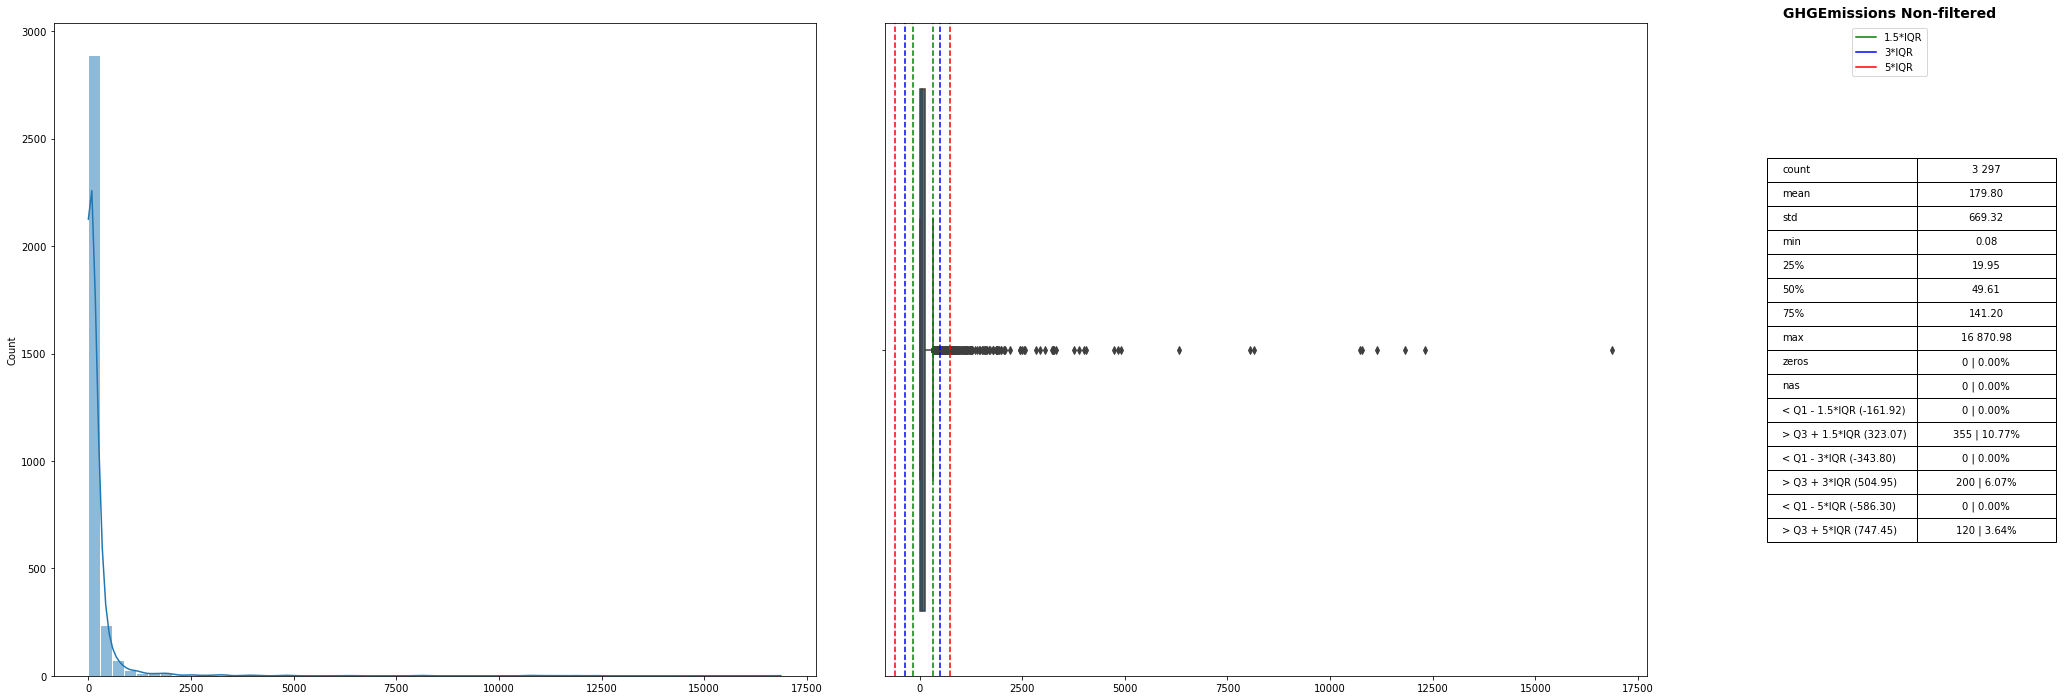

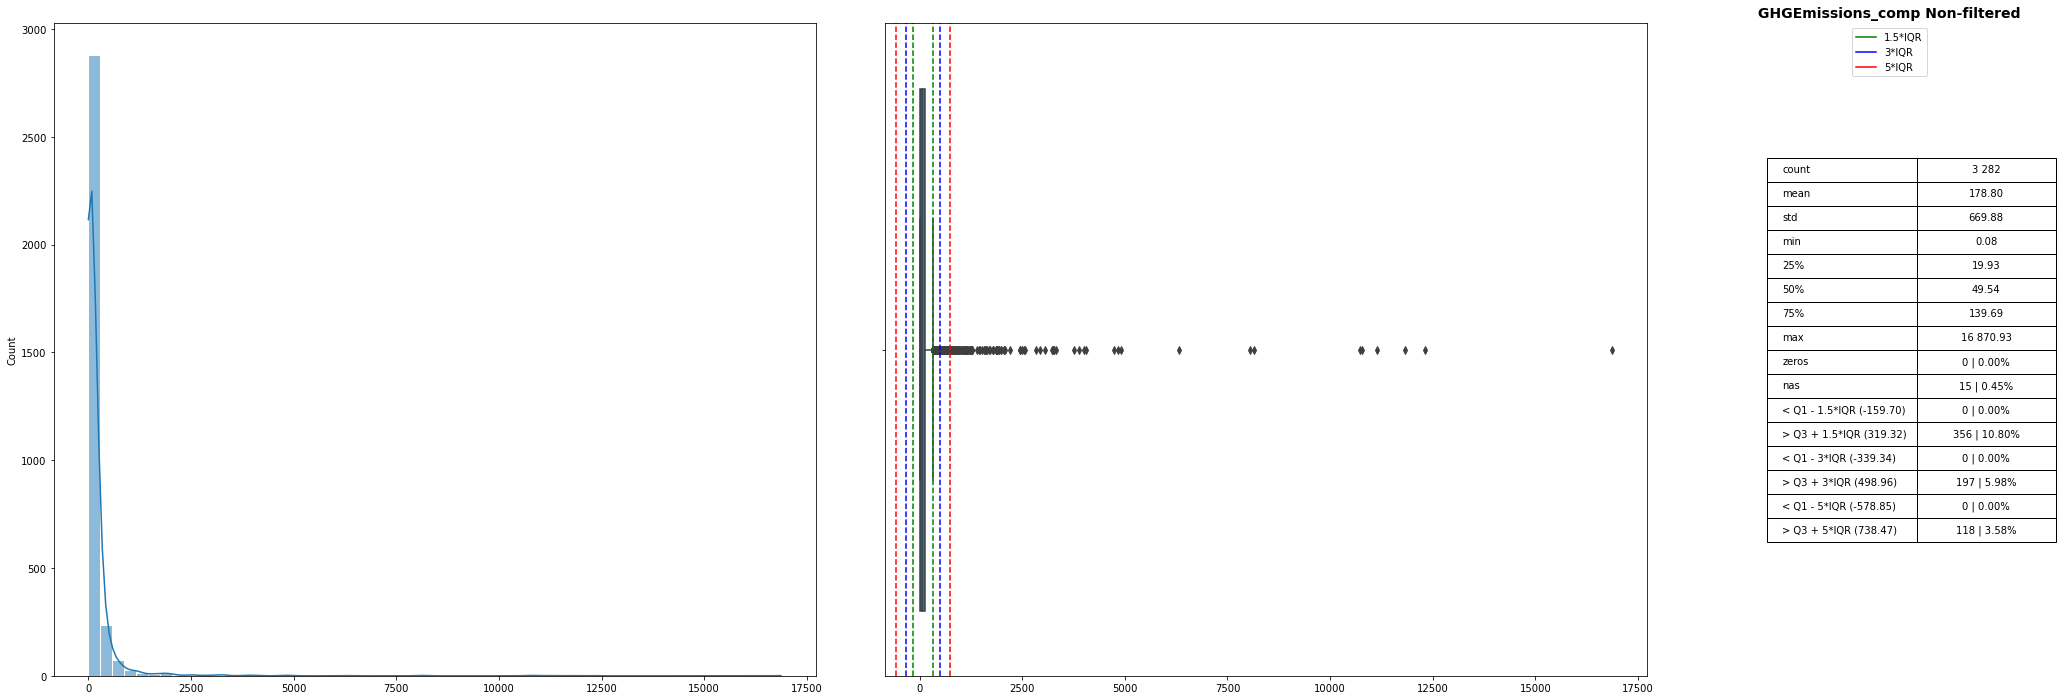

In [43]:
univariate_num(df['GHGEmissions'])
univariate_num(df['GHGEmissions_comp'])

**Conclusions:**
- il y a peu de différences entre la valeur d'émissions de gaz à effet de serre présente dans le fichier et la valeur calculée mais population calculée < population initiale (3297 Vs 3282)).
 => on garde la variable présente dans le fichier.


## Etude des surfaces des bâtiments

In [44]:
GFAs = ['PropertyGFATotal','PropertyGFABuilding(s)','PropertyGFAParking','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']
for GFA in GFAs:
    description(GFA)

{'PropertyGFATotal': 'Total building and parking gross floor area.'}
{'PropertyGFABuilding(s)': 'Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc. '}
{'PropertyGFAParking': 'Total space in square feet of all types of parking (Fully Enclosed, Partially Enclosed, and Open).'}
{'LargestPropertyUseTypeGFA': 'The gross floor area (GFA) of the largest use of the property.'}
{'SecondLargestPropertyUseTypeGFA': 'The gross floor area (GFA) of the second largest use of the property.'}
{'ThirdLargestPropertyUseTypeGFA': 'The gross floor area (GFA) of the third largest use of the property.'}


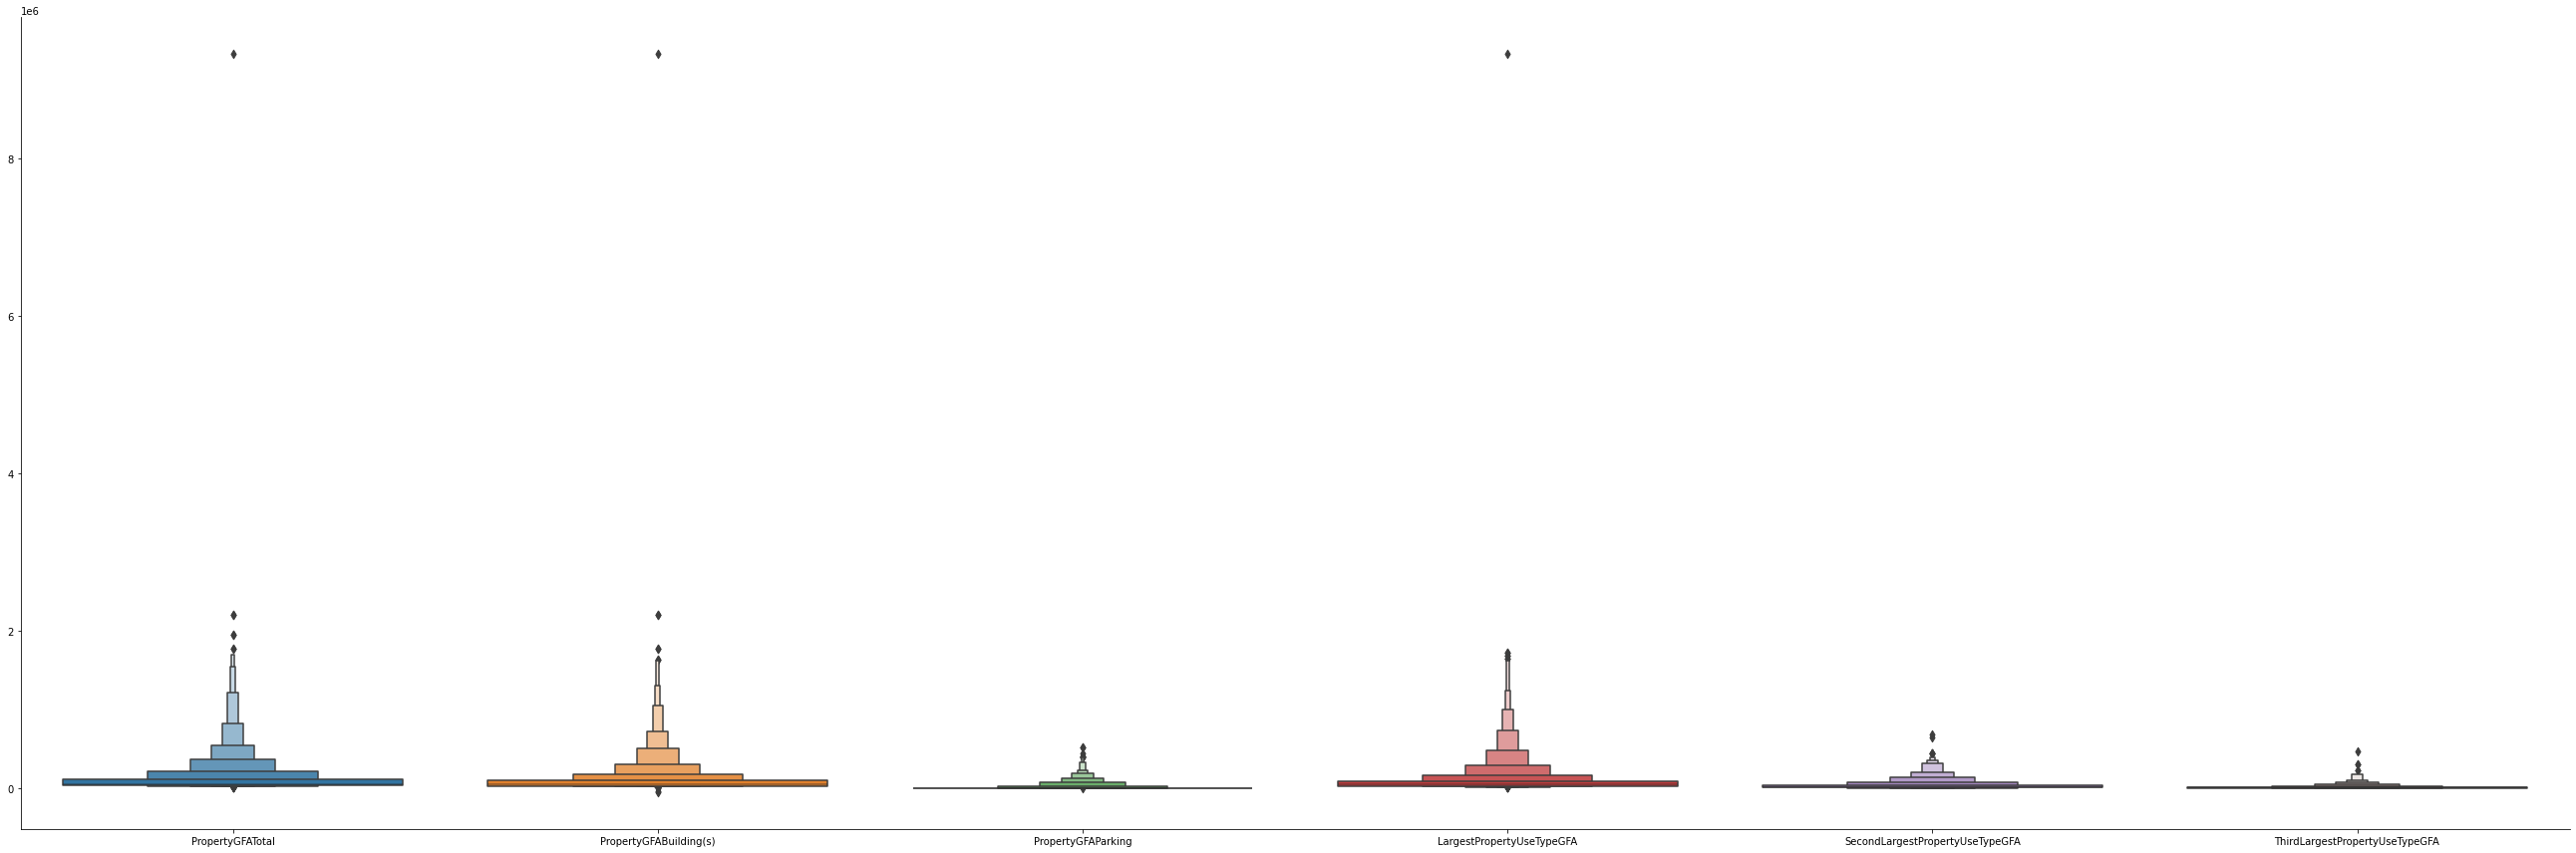

In [45]:
_ = sns.catplot(data=df.loc[:,GFAs],height=12,aspect=3,kind='boxen')

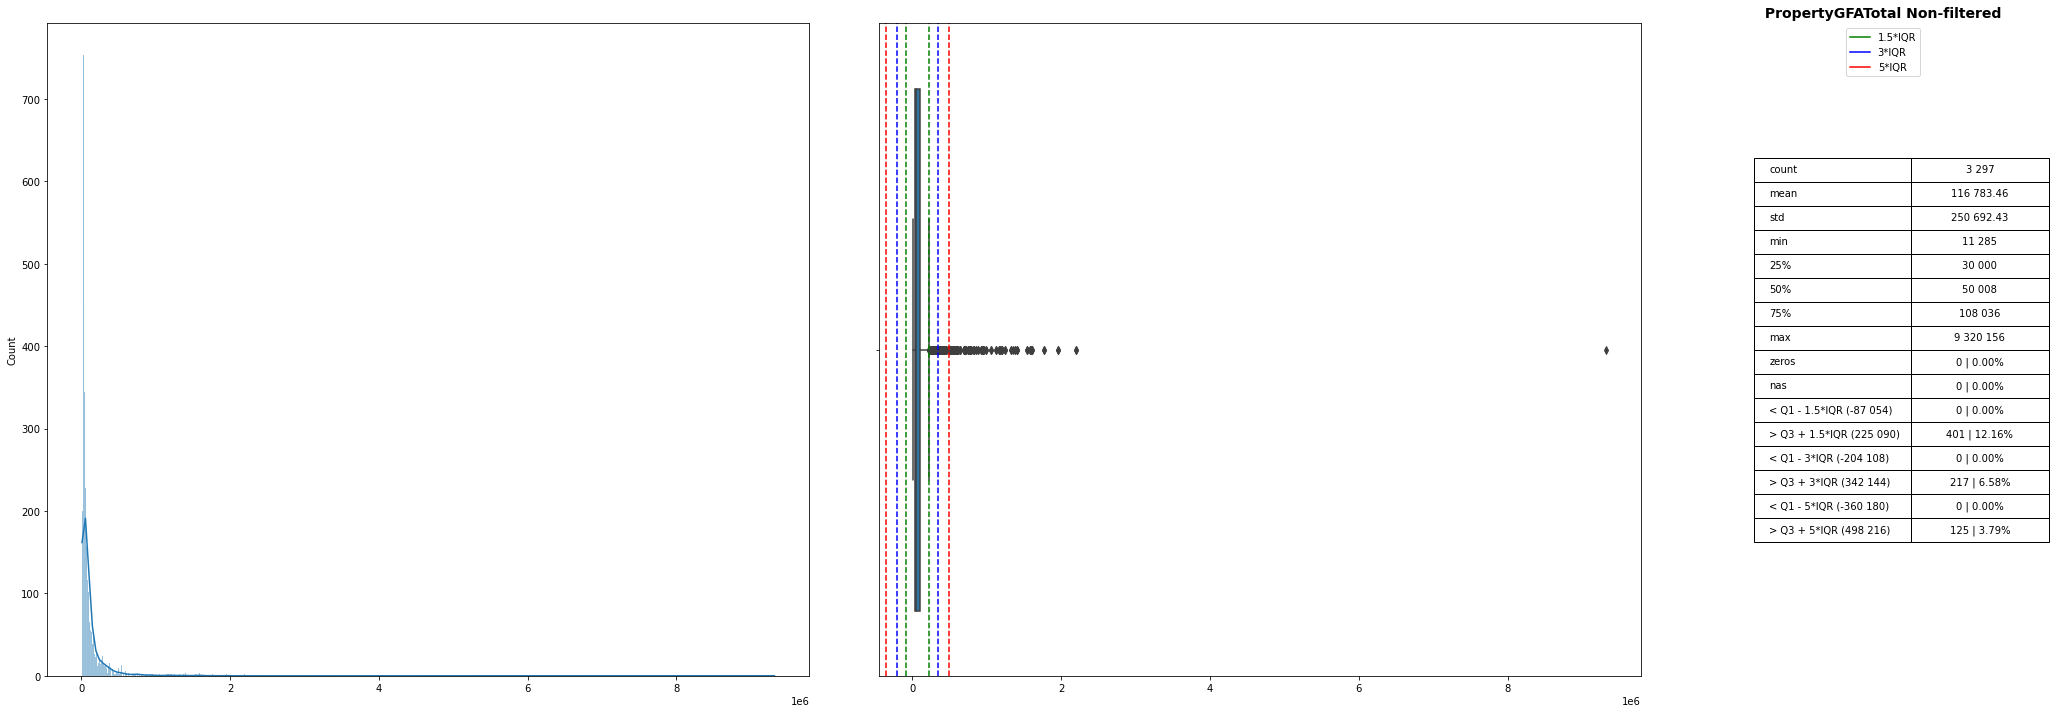

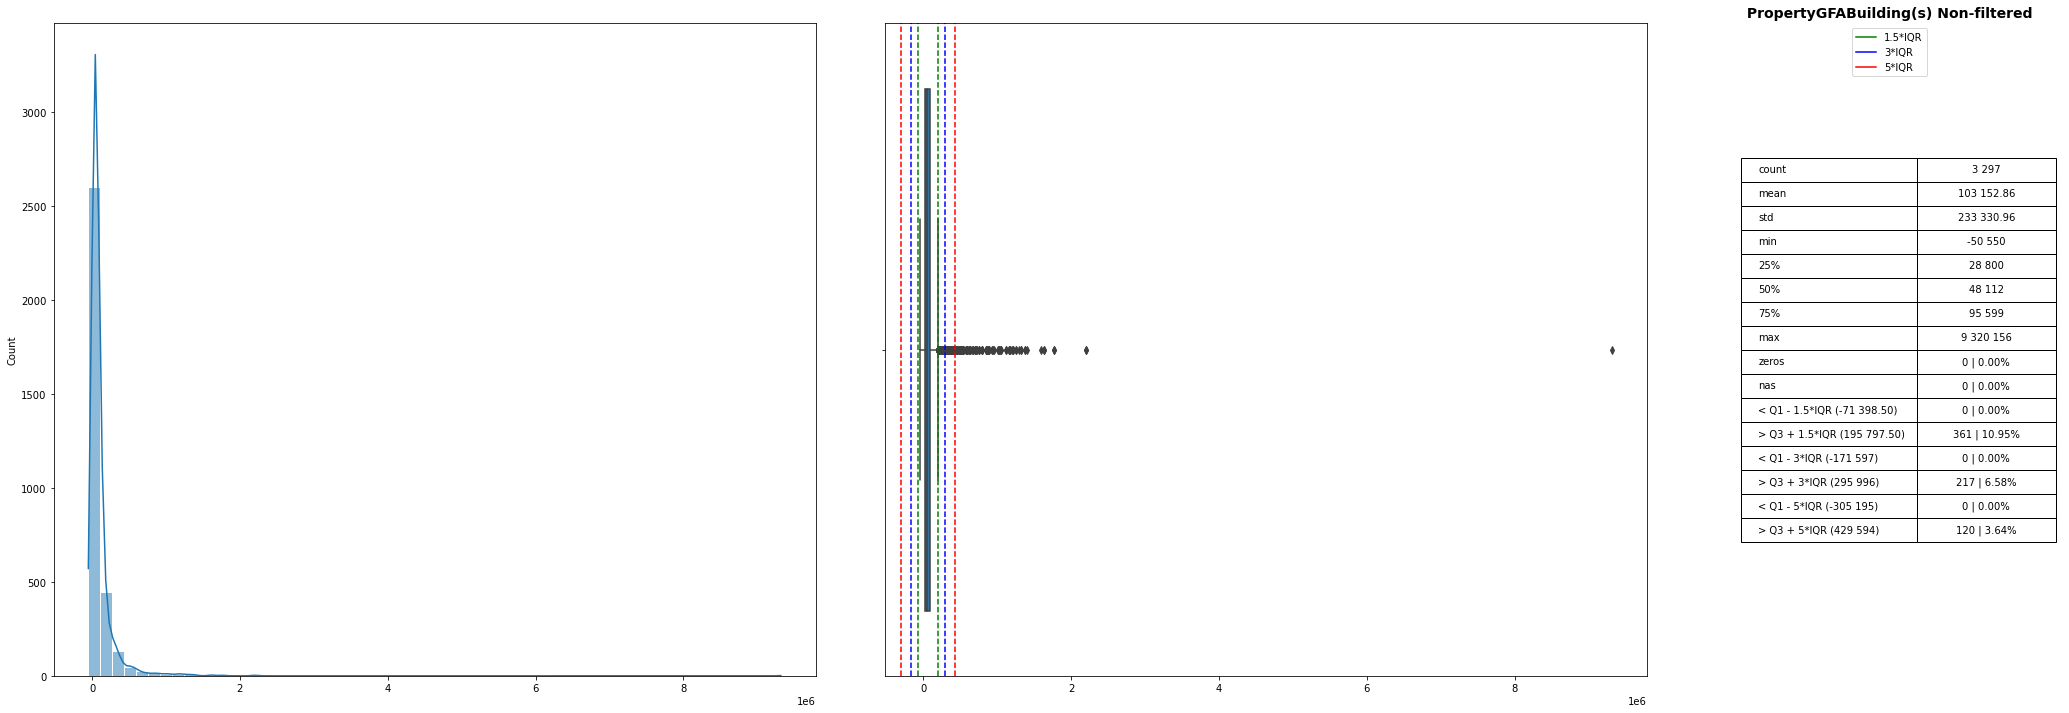

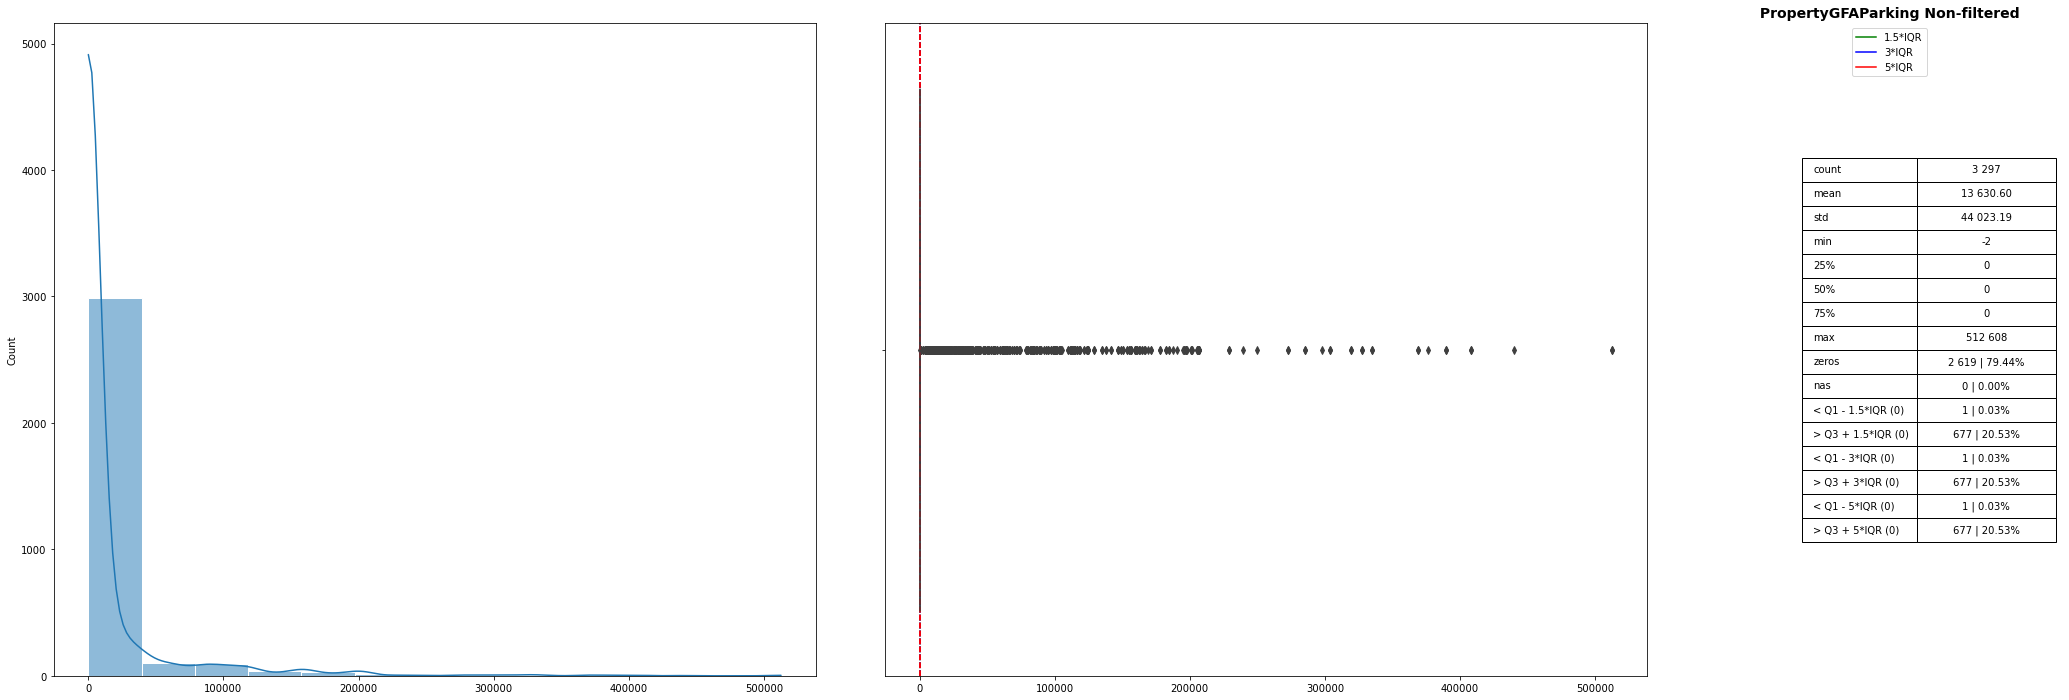

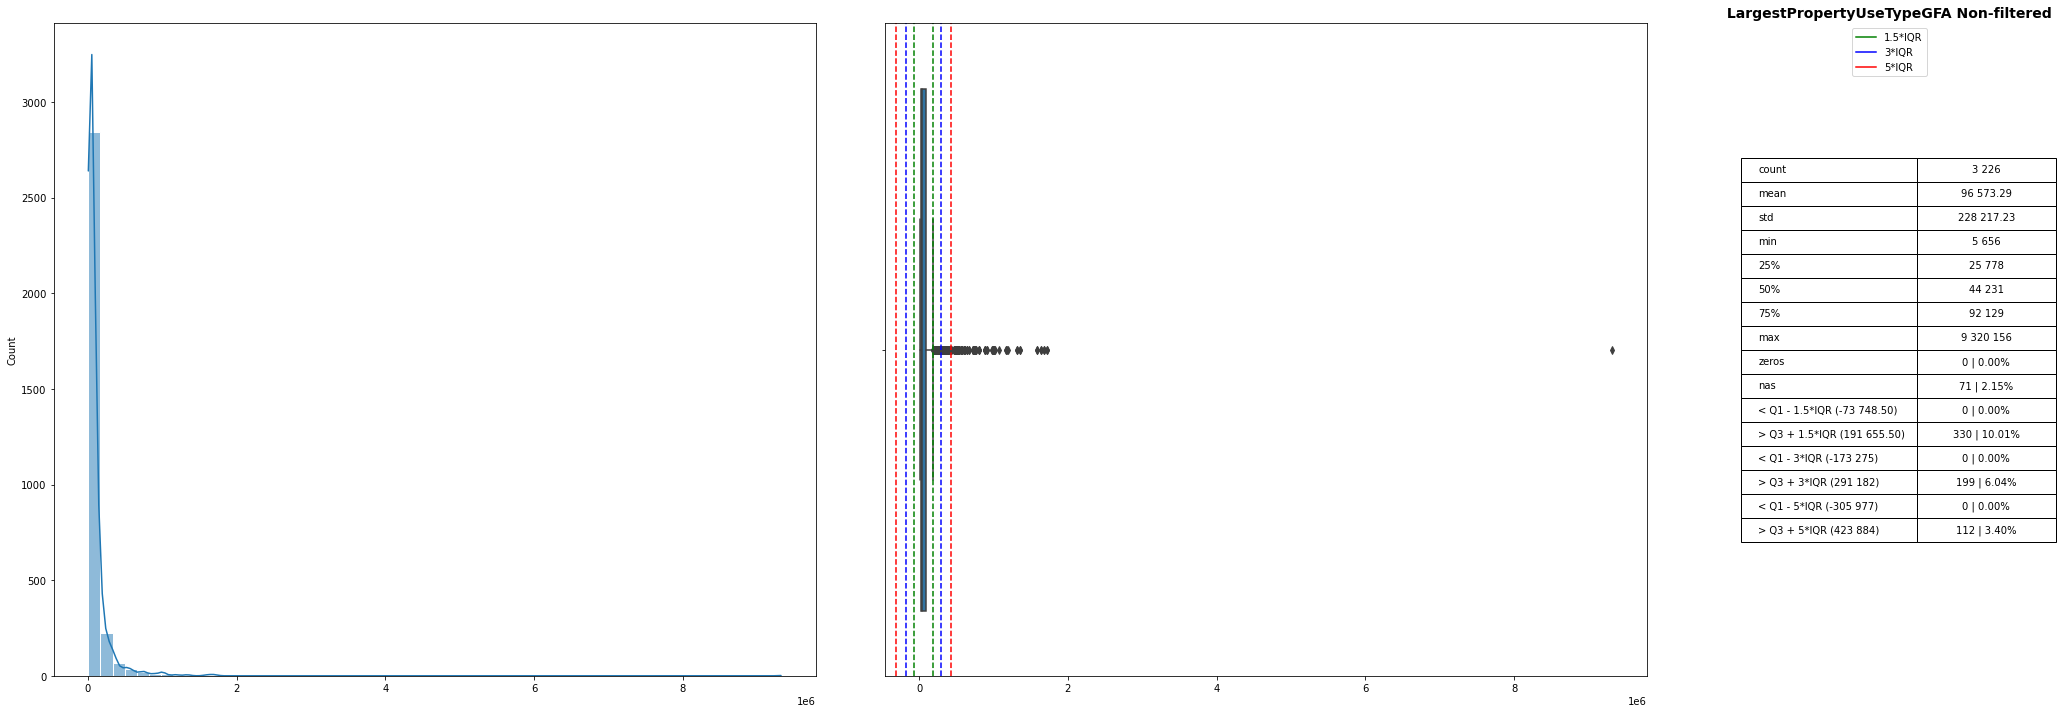

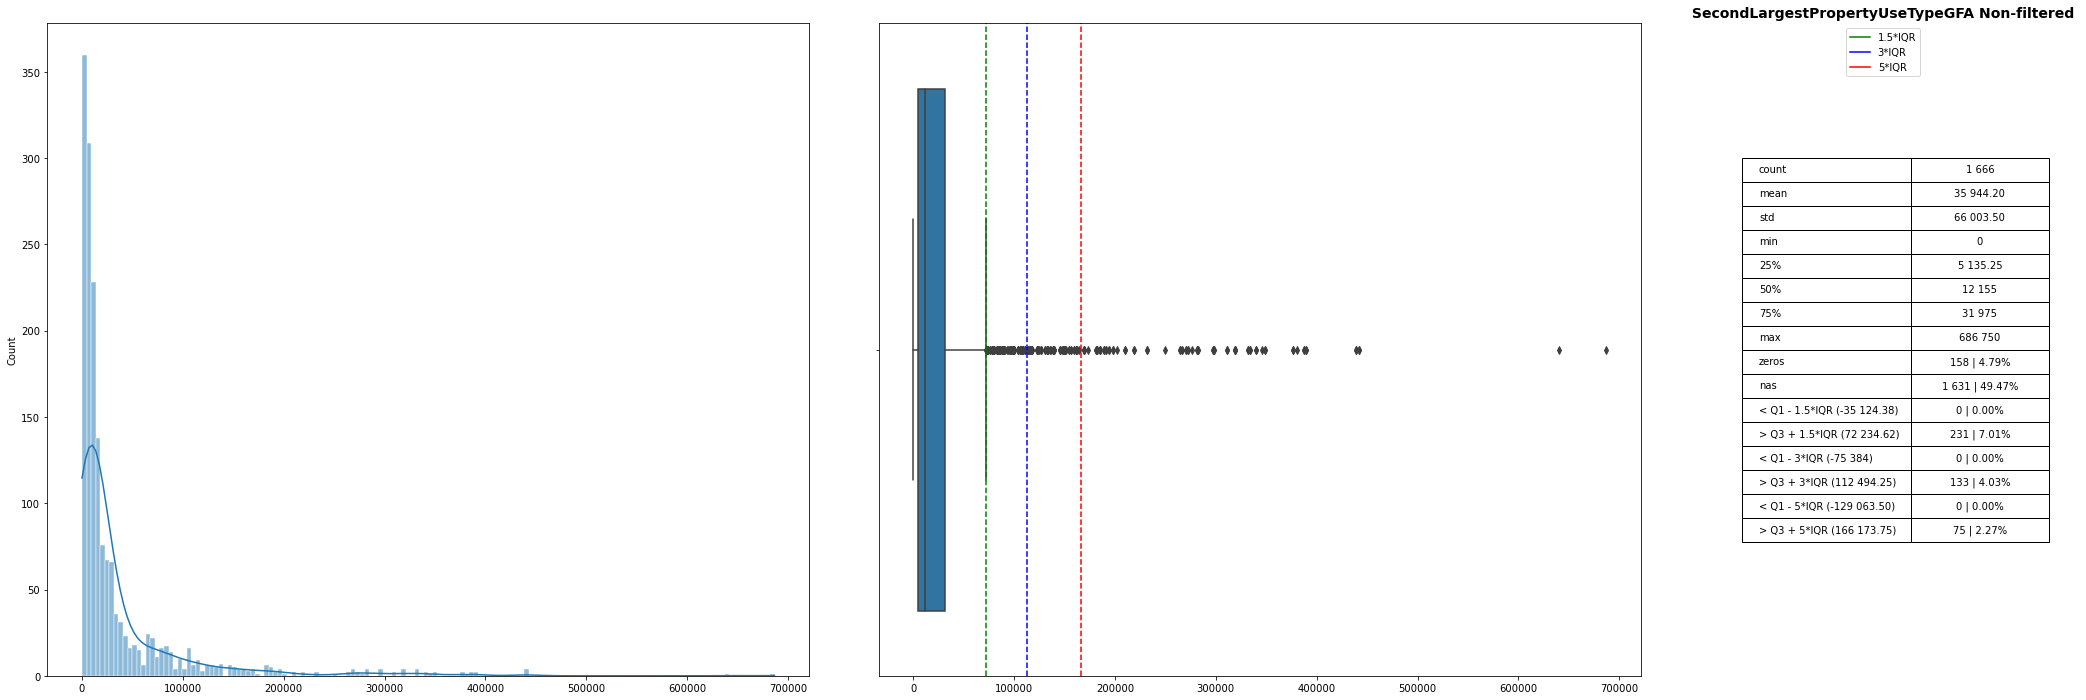

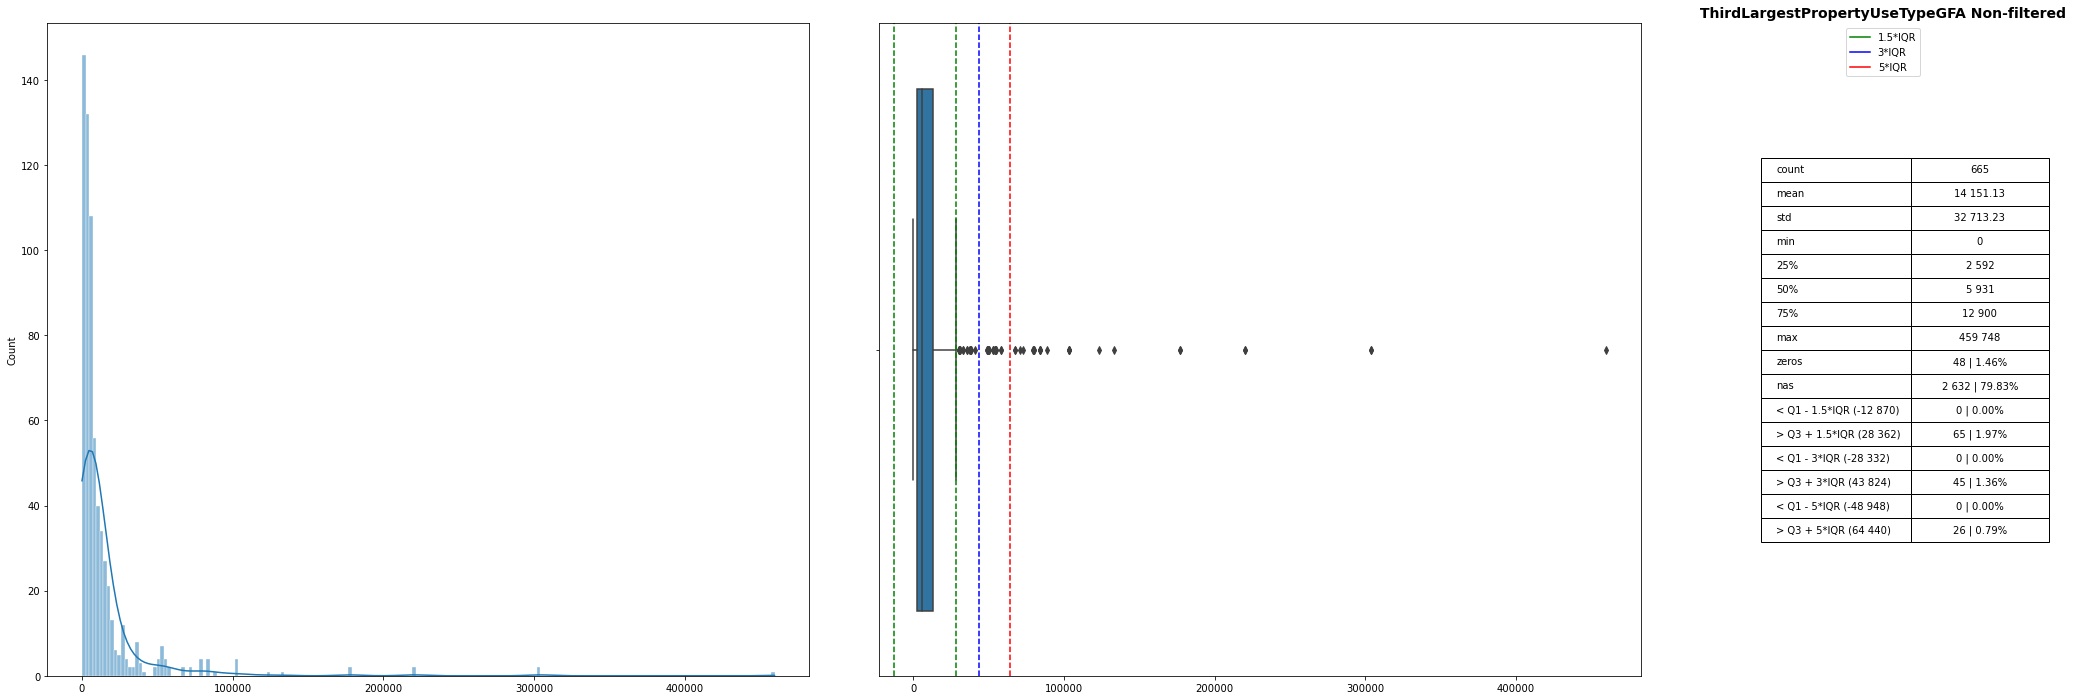

In [46]:
for gfa in GFAs:
    univariate_num(df[gfa])

Hypothèse: 'PropertyGFATotal' =  'PropertyGFABuilding(s)' + 'PropertyGFAParking' ok

In [47]:
df[df['PropertyGFATotal'] != df['PropertyGFABuilding(s)'] + df['PropertyGFAParking']]

Empty DataFrame
Columns: [OSEBuildingID, LargestPropertyUseTypeGFA, PropertyGFAParking, ENERGYSTARScore, SteamUse(kBtu), SecondLargestPropertyUseType, DataYear, SiteEUIWN(kBtu/sf), SourceEUIWN(kBtu/sf), Electricity(kWh), ComplianceStatus, ThirdLargestPropertyUseType, Neighborhood, SiteEnergyUse(kBtu), ThirdLargestPropertyUseTypeGFA, SiteEnergyUseWN(kBtu), PropertyGFABuilding(s), SourceEUI(kBtu/sf), Outlier, CouncilDistrictCode, SecondLargestPropertyUseTypeGFA, NumberofBuildings, PropertyGFATotal, NaturalGas(therms), BuildingType, SiteEUI(kBtu/sf), DefaultData, Electricity(kBtu), NumberofFloors, LargestPropertyUseType, PrimaryPropertyType, NaturalGas(kBtu), YearsENERGYSTARCertified, ListOfAllPropertyUseTypes, PropertyName, YearBuilt, TaxParcelIdentificationNumber, GHGEmissions, GHGEmissionsIntensity, OtherFuelUse(kBtu), Location, Latitude, Longitude, c_PropertyType, BuildingAge, distanceCenter, angleCenter, SiteEnergyUse_comp, GHGEmissions_comp]
Index: []

[0 rows x 49 columns]

On remarque qu'il y a des surfaces négatives. On on s'aperçoit alors que la colonne 'PropertyGFABuilding' est en fait ajustée pour que l'égalité précédente soit vérifiée.

In [48]:
df[df['PropertyGFABuilding(s)'] < 0][GFAs]

PropertyGFATotal  PropertyGFABuilding(s)  PropertyGFAParking  \
3139             54015                  -43310               97325   
3322             33648                  -50550               84198   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
3139                    54015.0                              NaN   
3322                    83600.0                          39000.0   

      ThirdLargestPropertyUseTypeGFA  
3139                             NaN  
3322                             NaN

Hypothèse: 'PropertyGFABuilding(s)' = 'LargestPropertyUseTypeGFA'+'SecondLargestPropertyUseTypeGFA'+'ThirdLargestPropertyUseTypeGFA' ko

In [49]:
len(df[df['PropertyGFABuilding(s)'] != df['LargestPropertyUseTypeGFA']+df['SecondLargestPropertyUseTypeGFA']+df['ThirdLargestPropertyUseTypeGFA']])

3212

'LargestPropertyUseTypeGFA' n'est pas toujours défini

In [50]:
len(df[df['LargestPropertyUseTypeGFA'].isna()][GFAs])

71

In [51]:
print(f"LargestPropertyUseTypeGFA not defined => SecondLargestPropertyUseTypeGFA not defined ? {len(df[df['LargestPropertyUseTypeGFA'].isna()].index.difference(df[df['SecondLargestPropertyUseTypeGFA'].isna()].index)) == 0 }")
print(f"LargestPropertyUseTypeGFA not defined => ThirdLargestPropertyUseTypeGFA not defined ? {len(df[df['LargestPropertyUseTypeGFA'].isna()].index.difference(df[df['ThirdLargestPropertyUseTypeGFA'].isna()].index)) == 0}")

LargestPropertyUseTypeGFA not defined => SecondLargestPropertyUseTypeGFA not defined ? True
LargestPropertyUseTypeGFA not defined => ThirdLargestPropertyUseTypeGFA not defined ? True


On définit une nouvelle colonne c_TotalGFA qui est égale à la somme des surfaces pour les trois types d'usage du bâtiment. Si la valeur 'LargestPropertyUseTypeGFA' n'est pas définie, on utilise 'PropertyGFABuilding(s)'.

In [52]:
selection = df[df['LargestPropertyUseTypeGFA'].isna()].index
df.loc[selection,'LargestPropertyUseTypeGFA'] = df.loc[selection,'PropertyGFABuilding(s)']
for col in ['SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']:
    df.loc[df[df[col].isna()].index,col]  = 0.0
df['c_TotalGFA'] = df['LargestPropertyUseTypeGFA'] + df['SecondLargestPropertyUseTypeGFA'] + df['ThirdLargestPropertyUseTypeGFA'] 

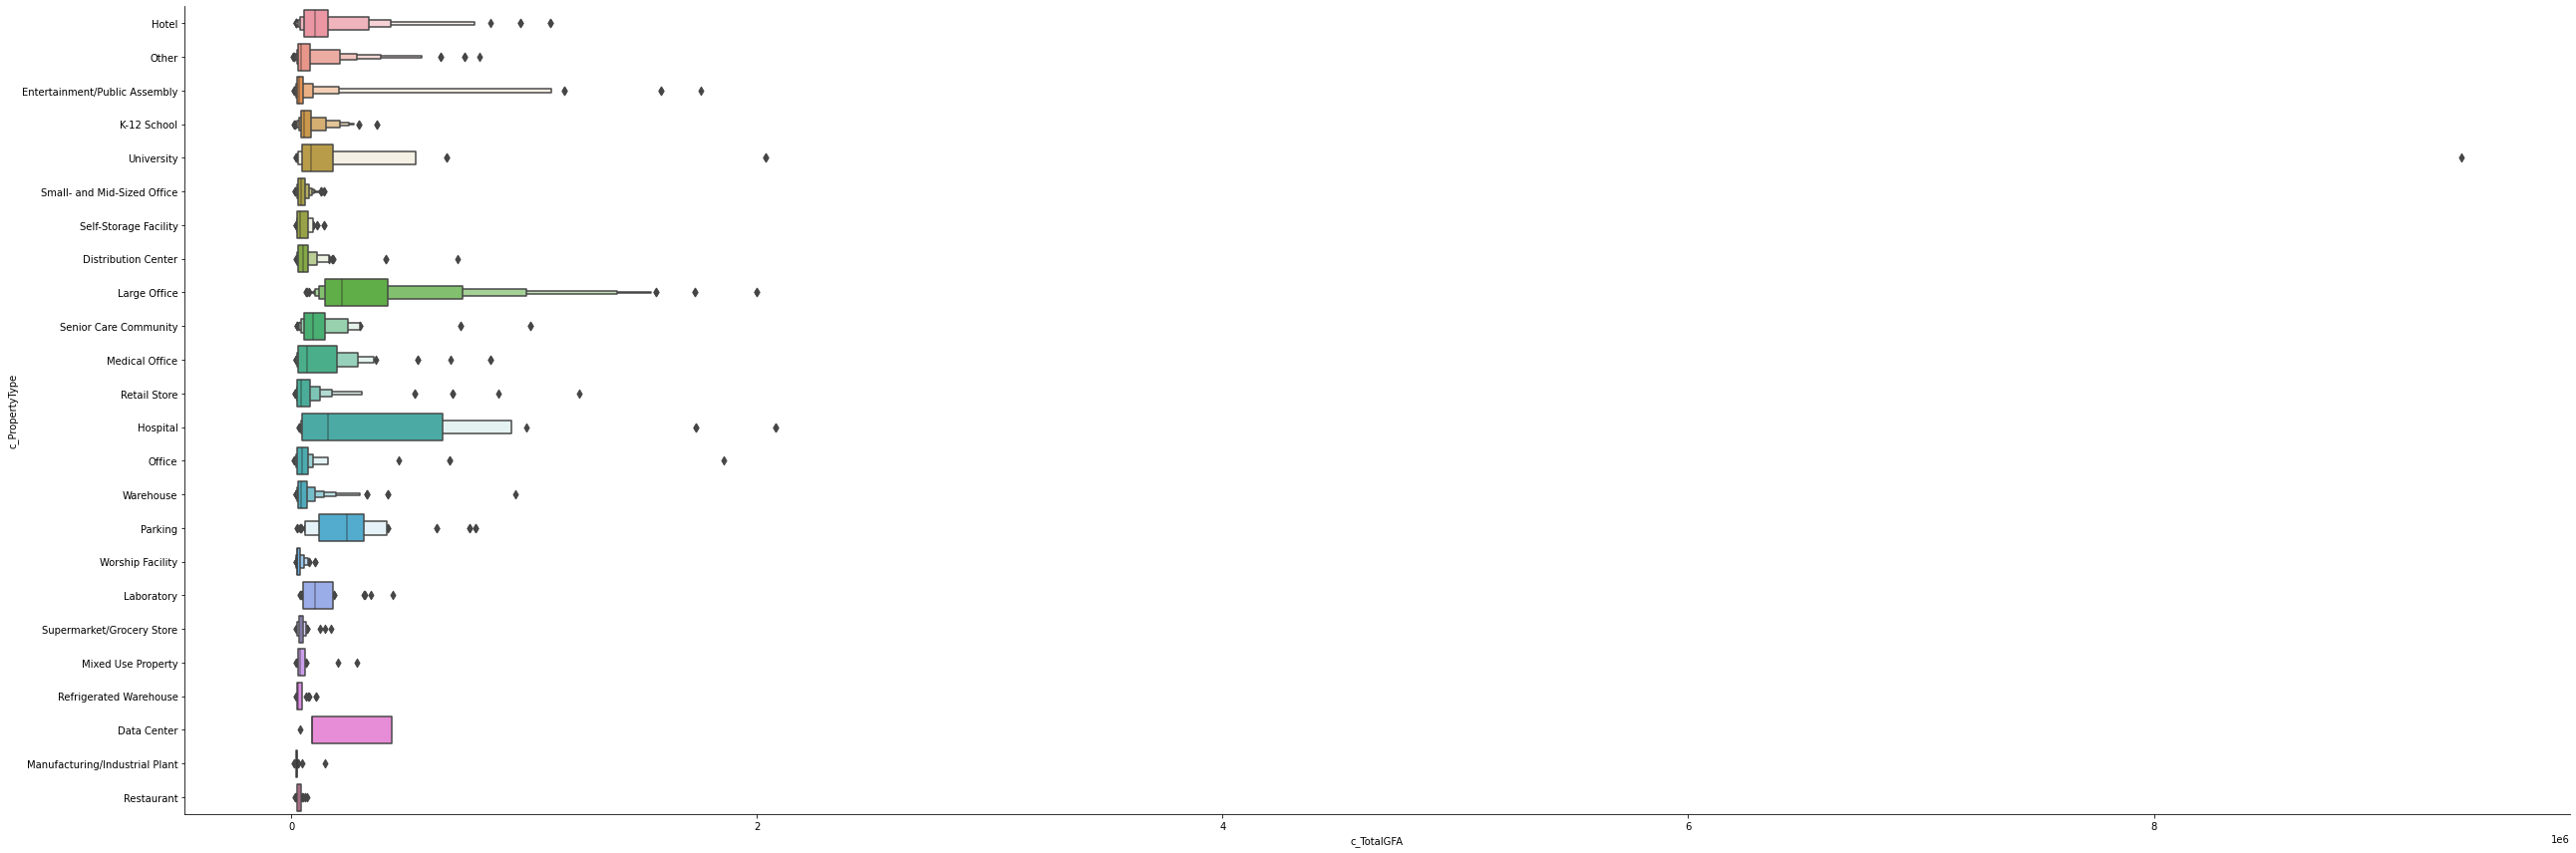

In [53]:
_ = sns.catplot(x='c_TotalGFA',y='c_PropertyType',data=df,height=12,aspect=3,kind='boxen')

Détail de la plus grande surface.

865 870 m2 pour 42 000 étudiant => cohérent.

In [54]:
display(df.loc[ df[df['c_TotalGFA'] == df['c_TotalGFA'].max()].index,: ][['PropertyName','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']])

PropertyName  LargestPropertyUseTypeGFA  \
6614  University of Washington - Seattle Campus                  9320156.0   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  
6614                              0.0                             0.0

## Etude du score EnergyStar

2220 sur 3297 Energy star scores are set


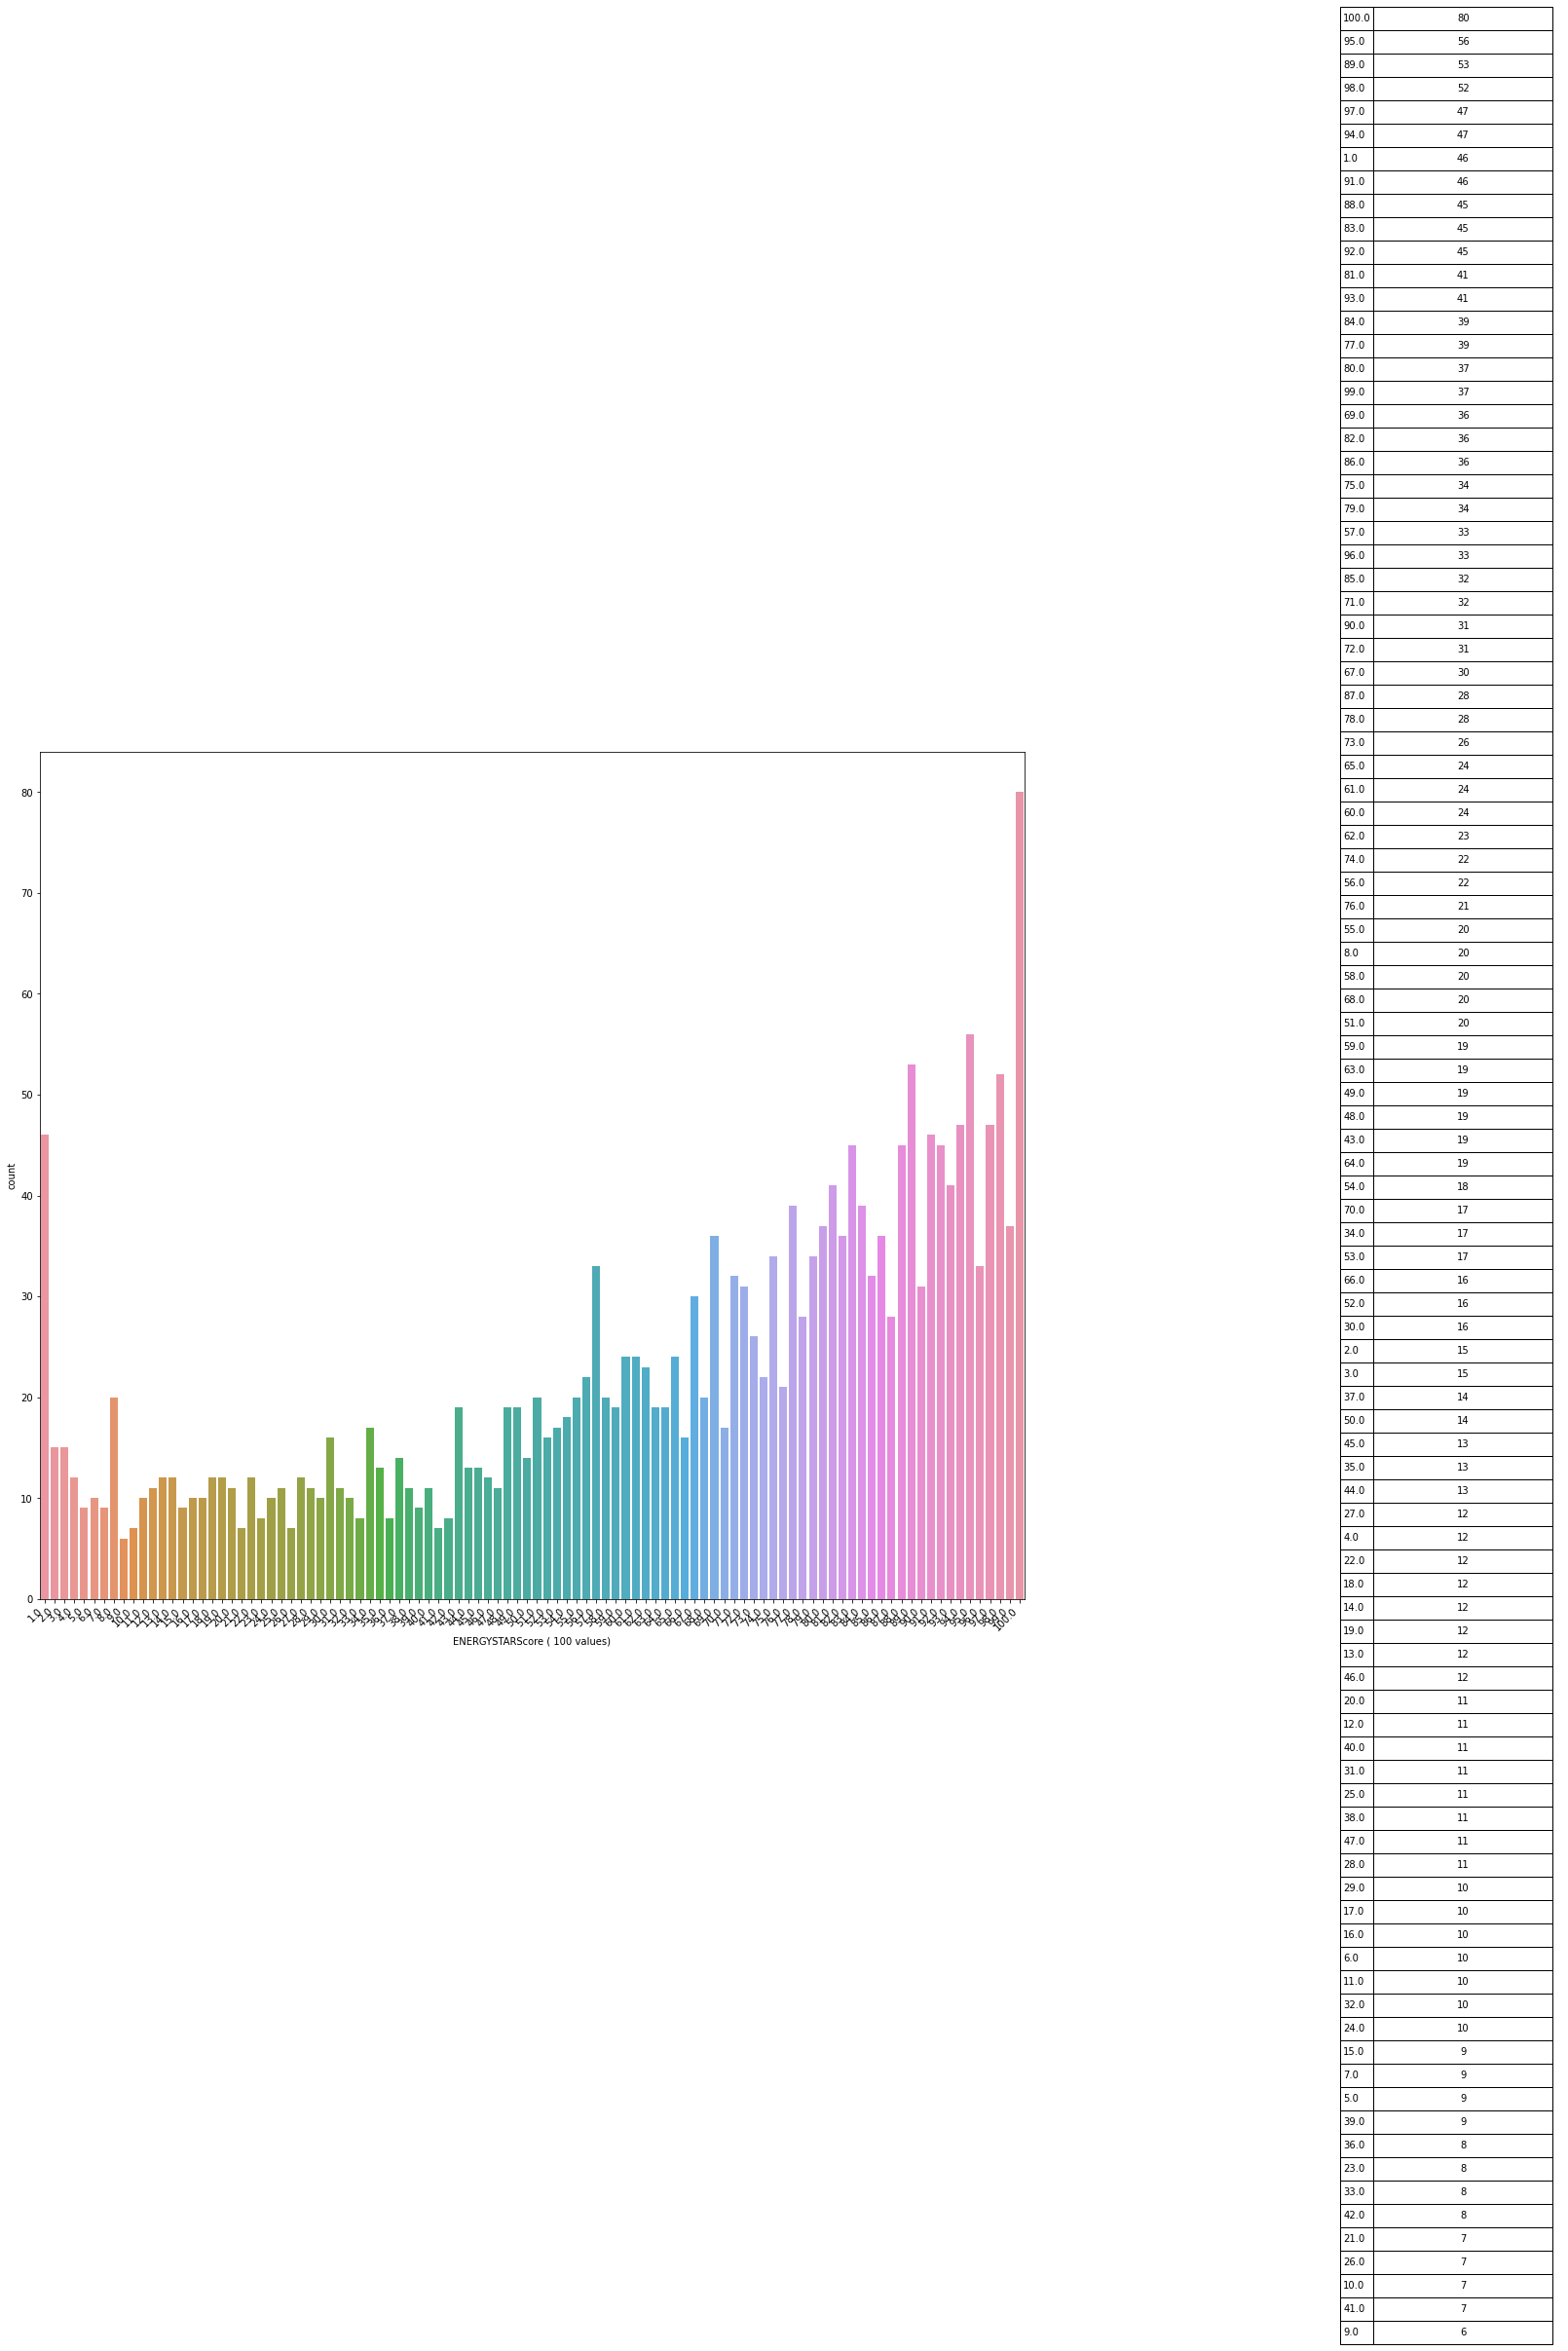

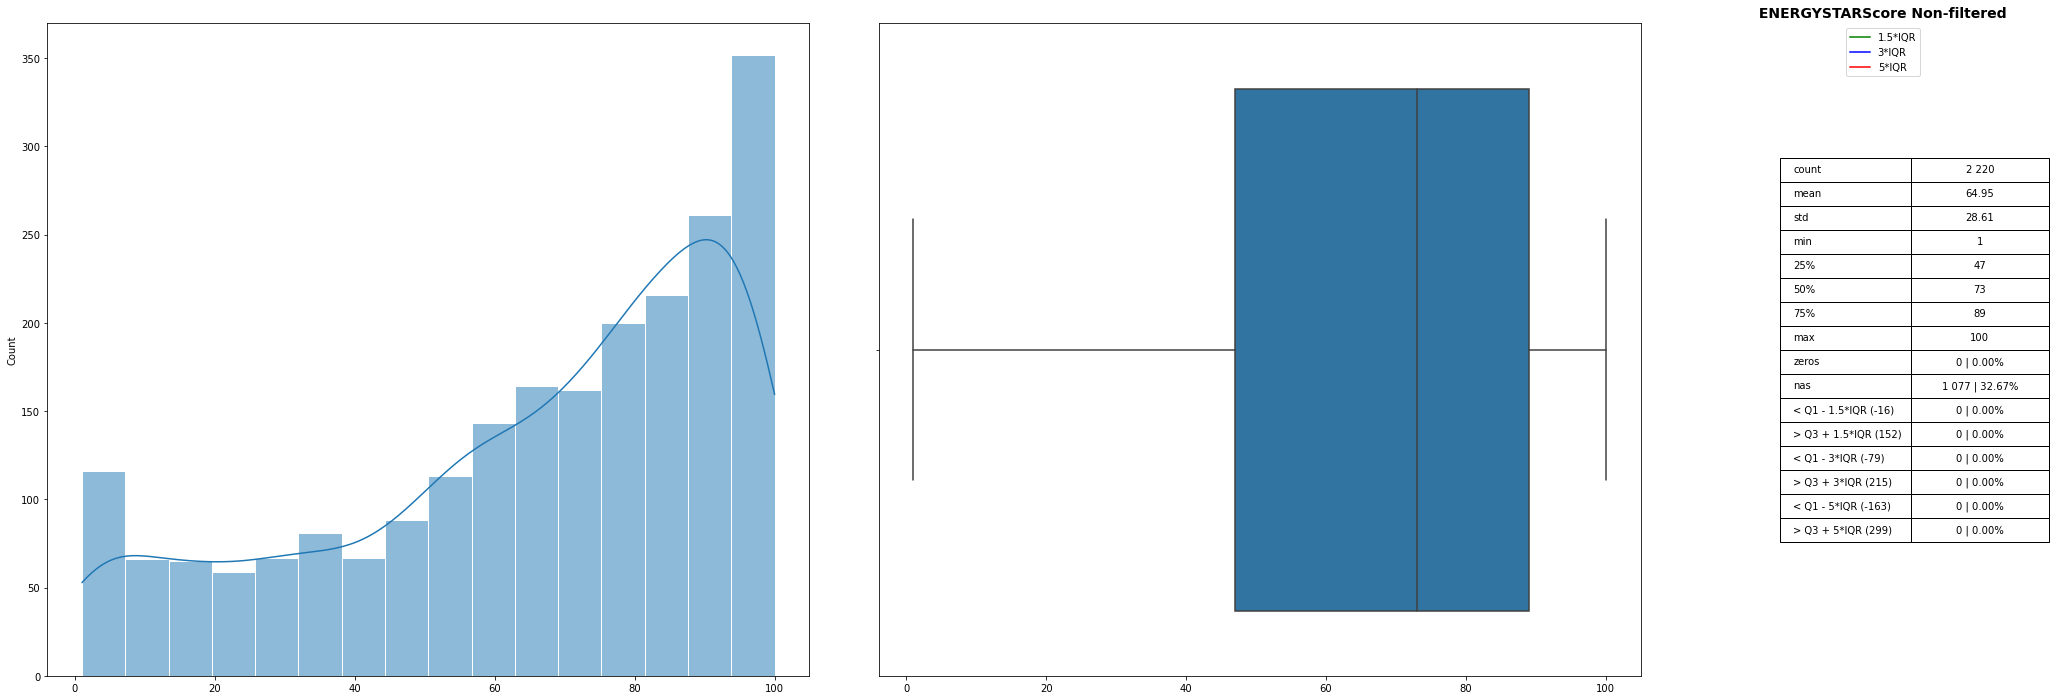

In [55]:
print(f"{df['ENERGYSTARScore'].count()} sur {len(df)} Energy star scores are set")
countplot(df,x="ENERGYSTARScore",rot=45,figsize=(28,16))
univariate_num(df["ENERGYSTARScore"])

## Définiton de la principale source d'énergie


In [56]:
EnergySources = ['NaturalGas(kBtu)','Electricity(kBtu)','SteamUse(kBtu)','OtherFuelUse(kBtu)']
def max_column(df,columns):
    values = np.nan_to_num(df.loc[:,columns].values)
    return list(map(lambda t: t[0] ,
                    map(lambda vs: max(list(zip(columns,vs)),
                        key = lambda x:x[1]),
                        values
                    )
                )
            )
df['c_MainEnergy'] = max_column(df,EnergySources)


## Etude des variations 2015-2016

Pour les deux variables à prédire, on observe des valeurs aberrantes. Pour essayer de les supprimer, on va utiliser les taux de variations entre 2015 et 2016.

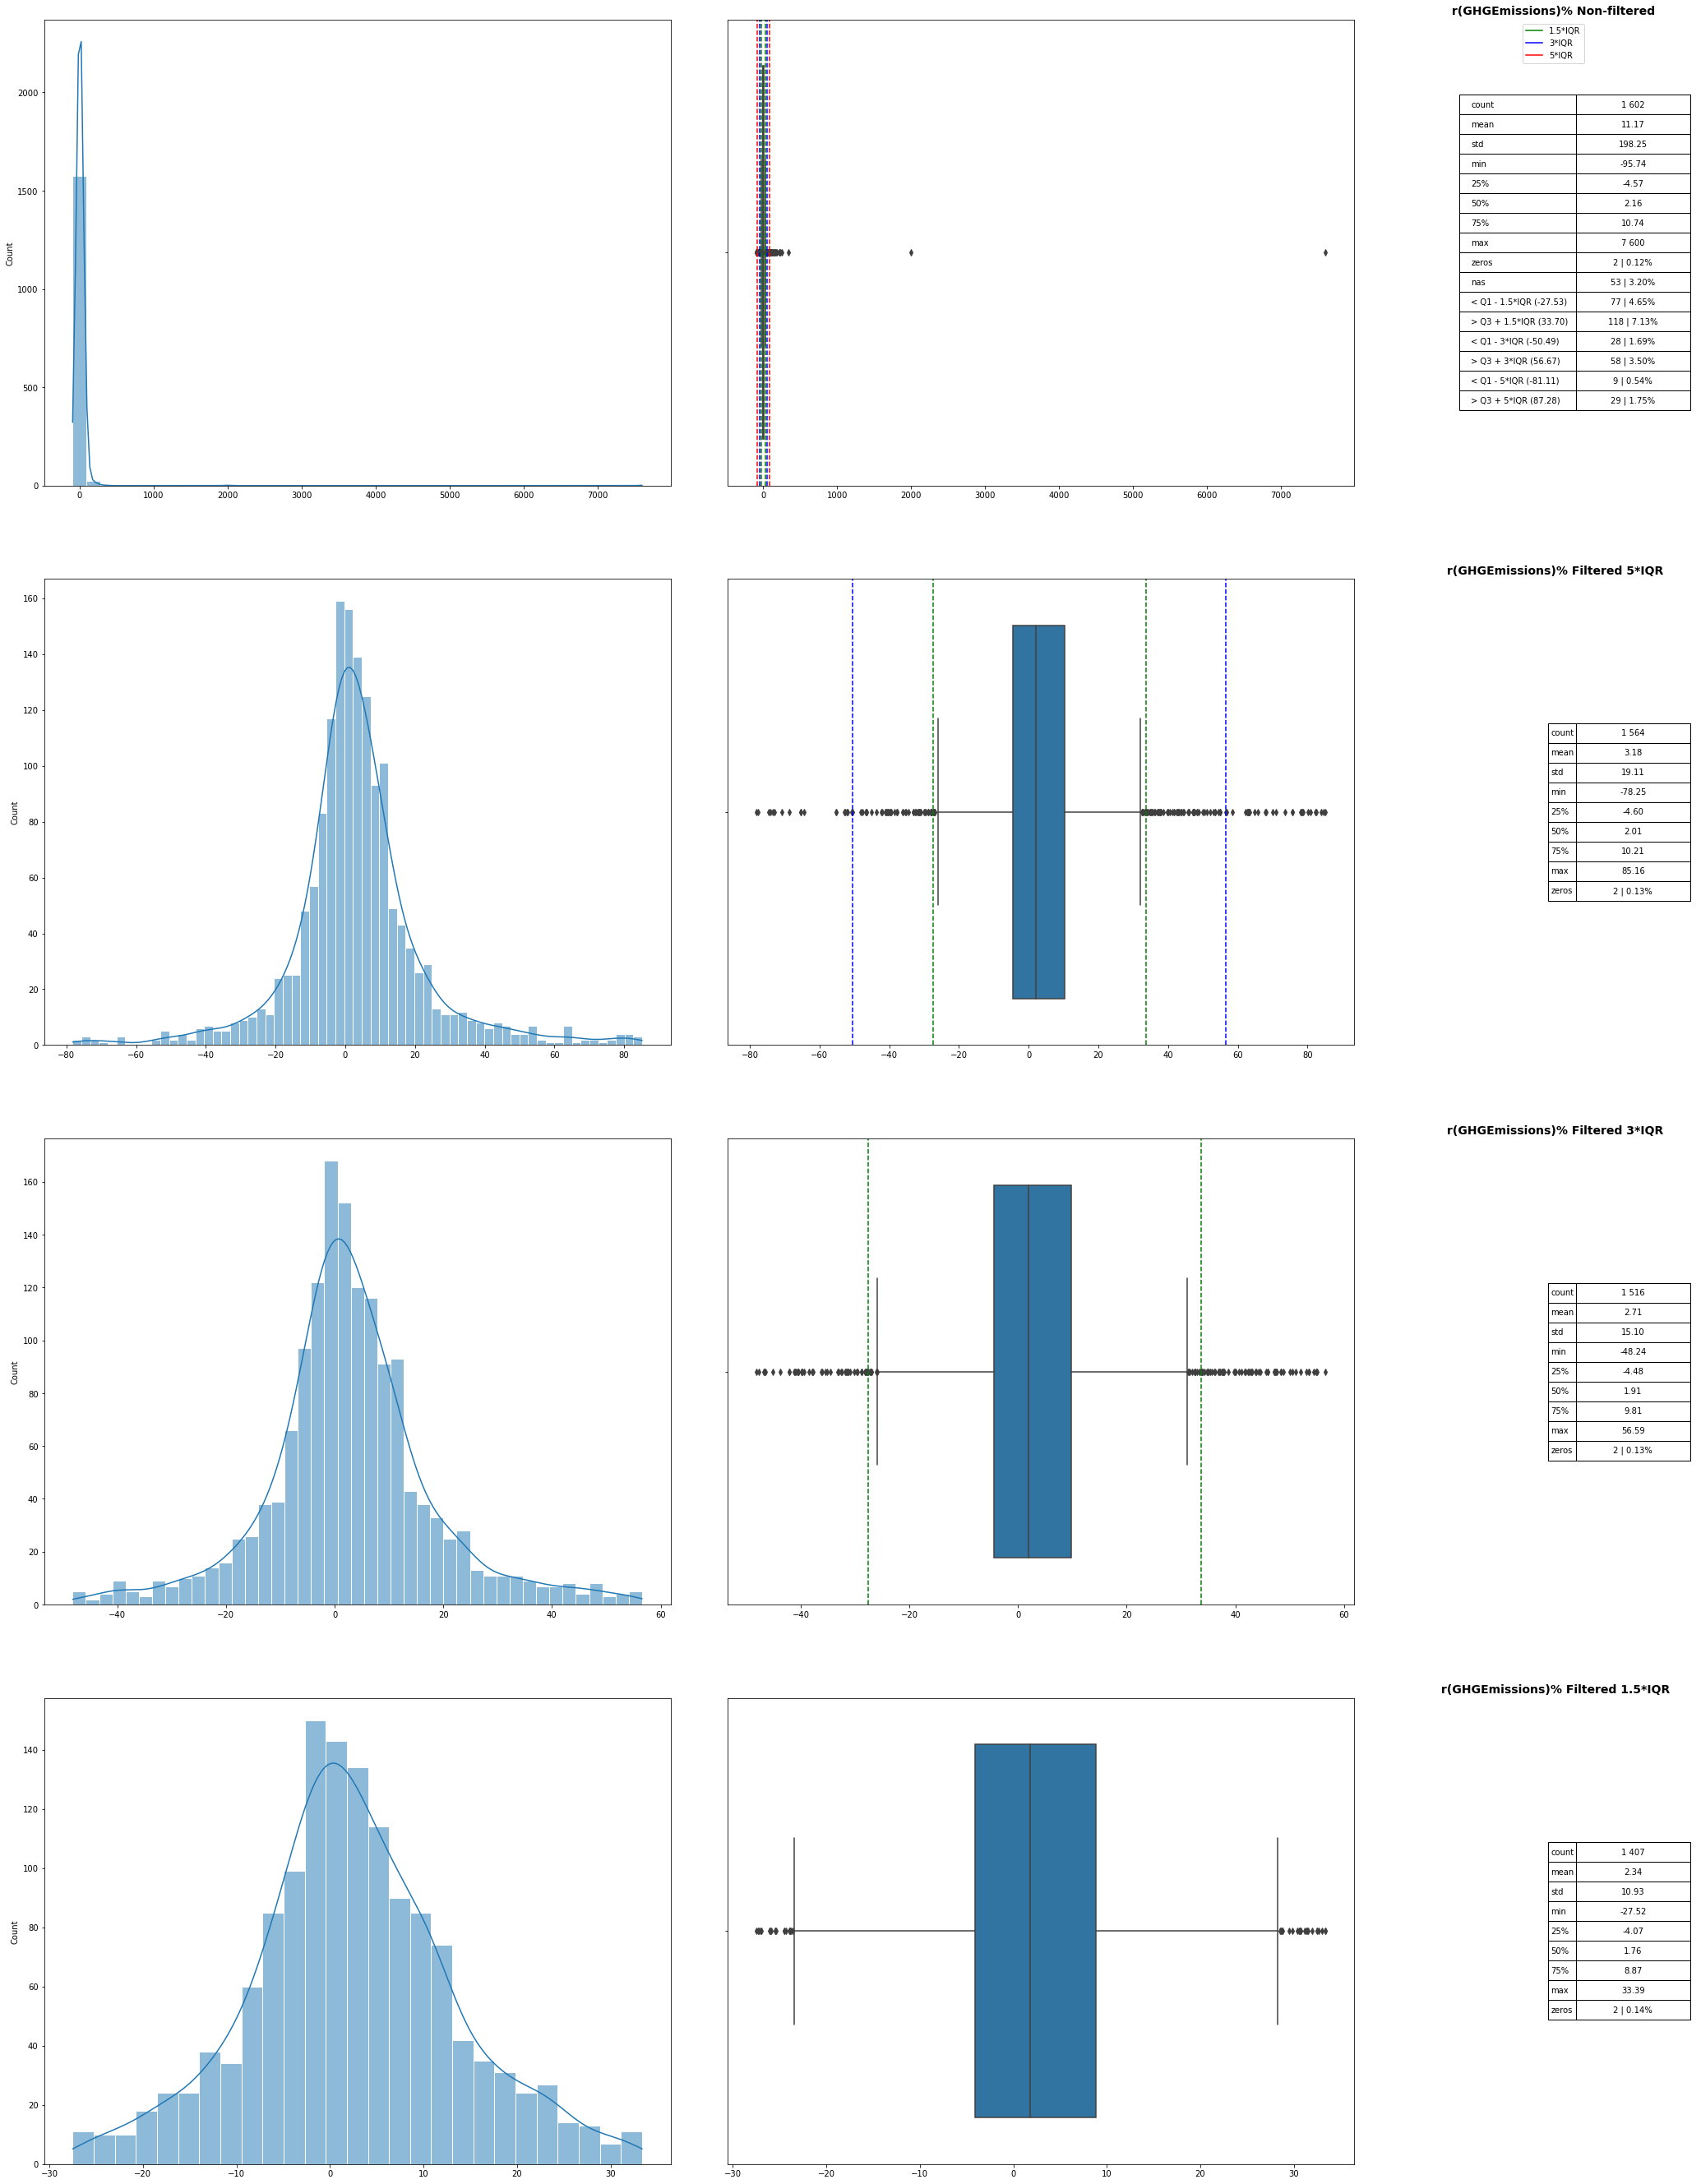

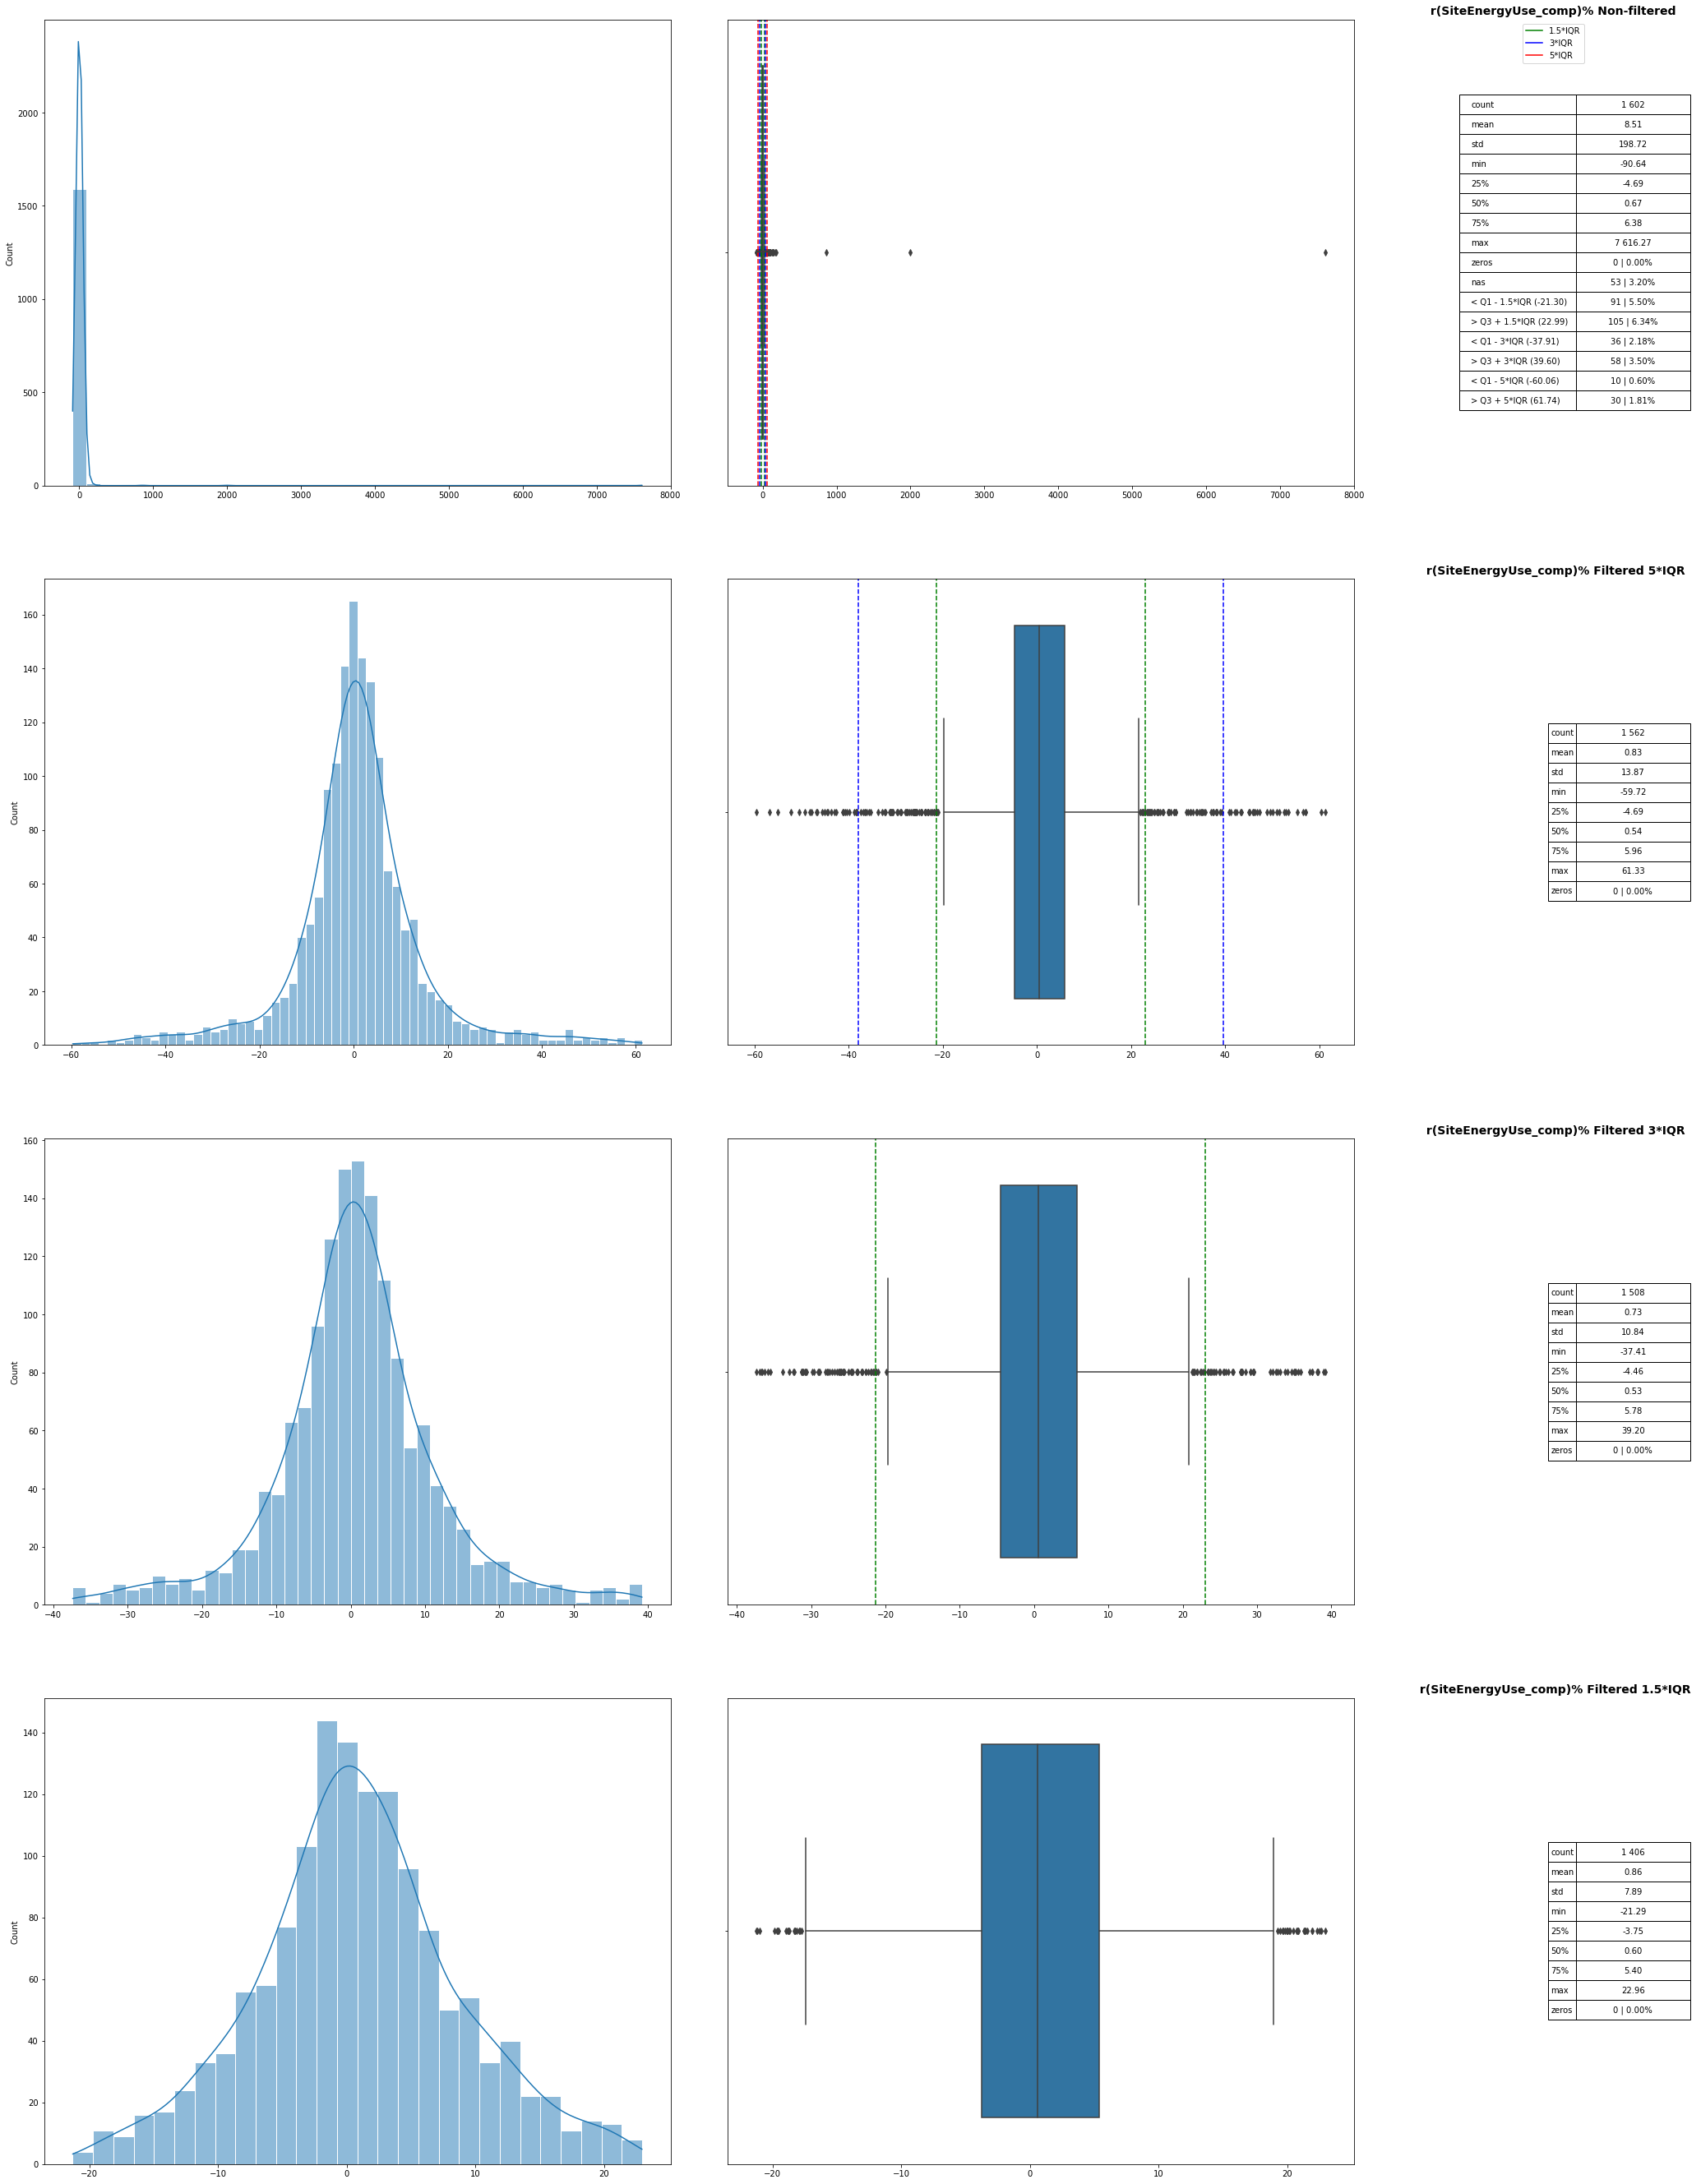

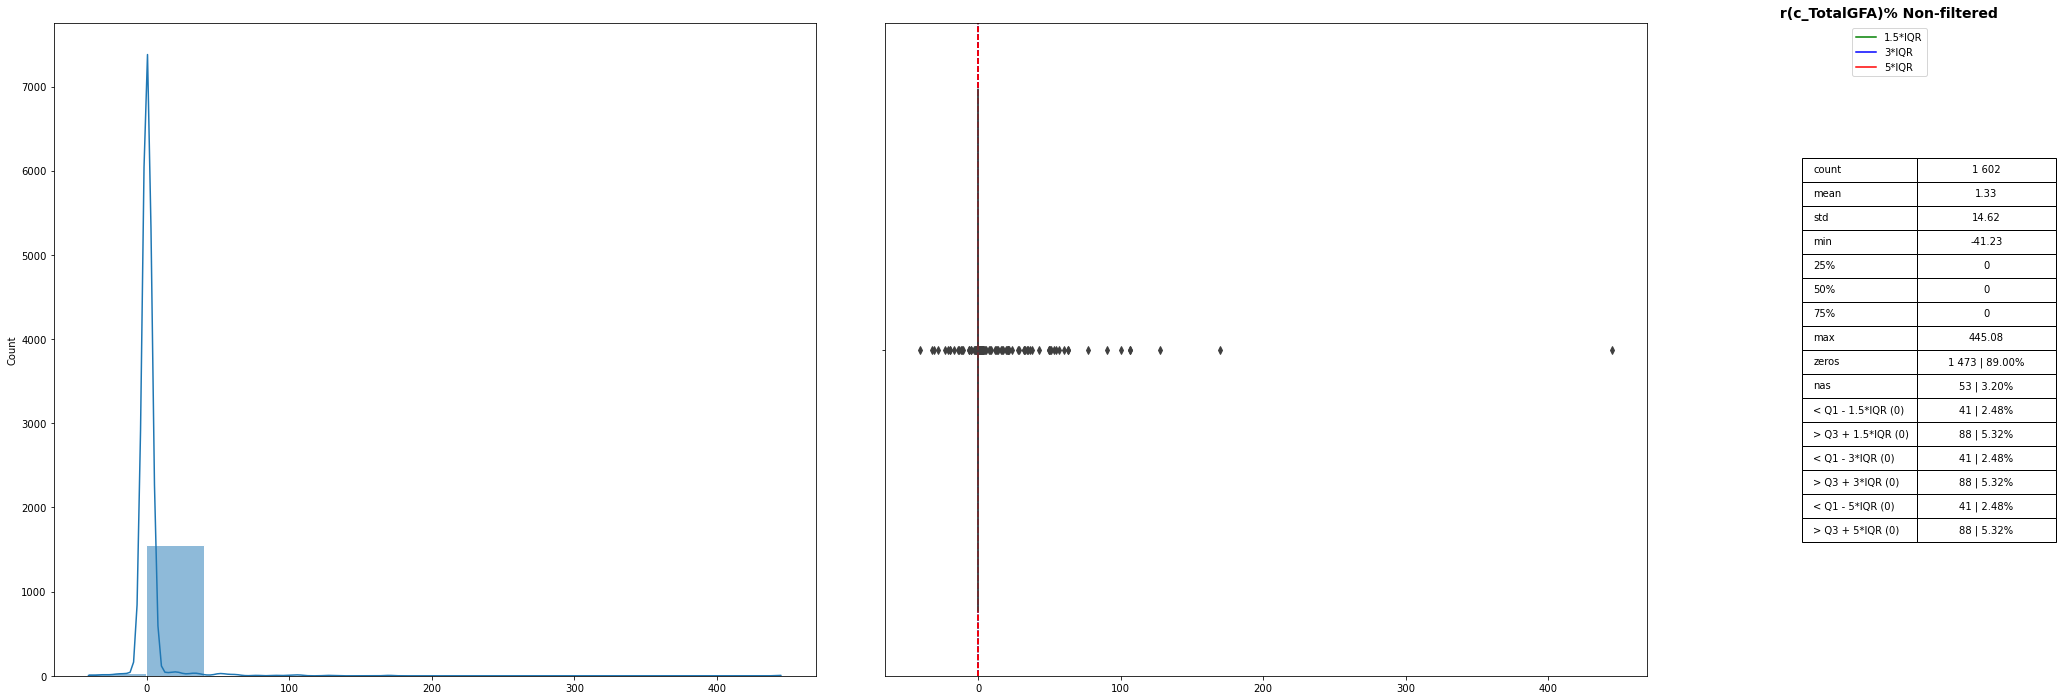

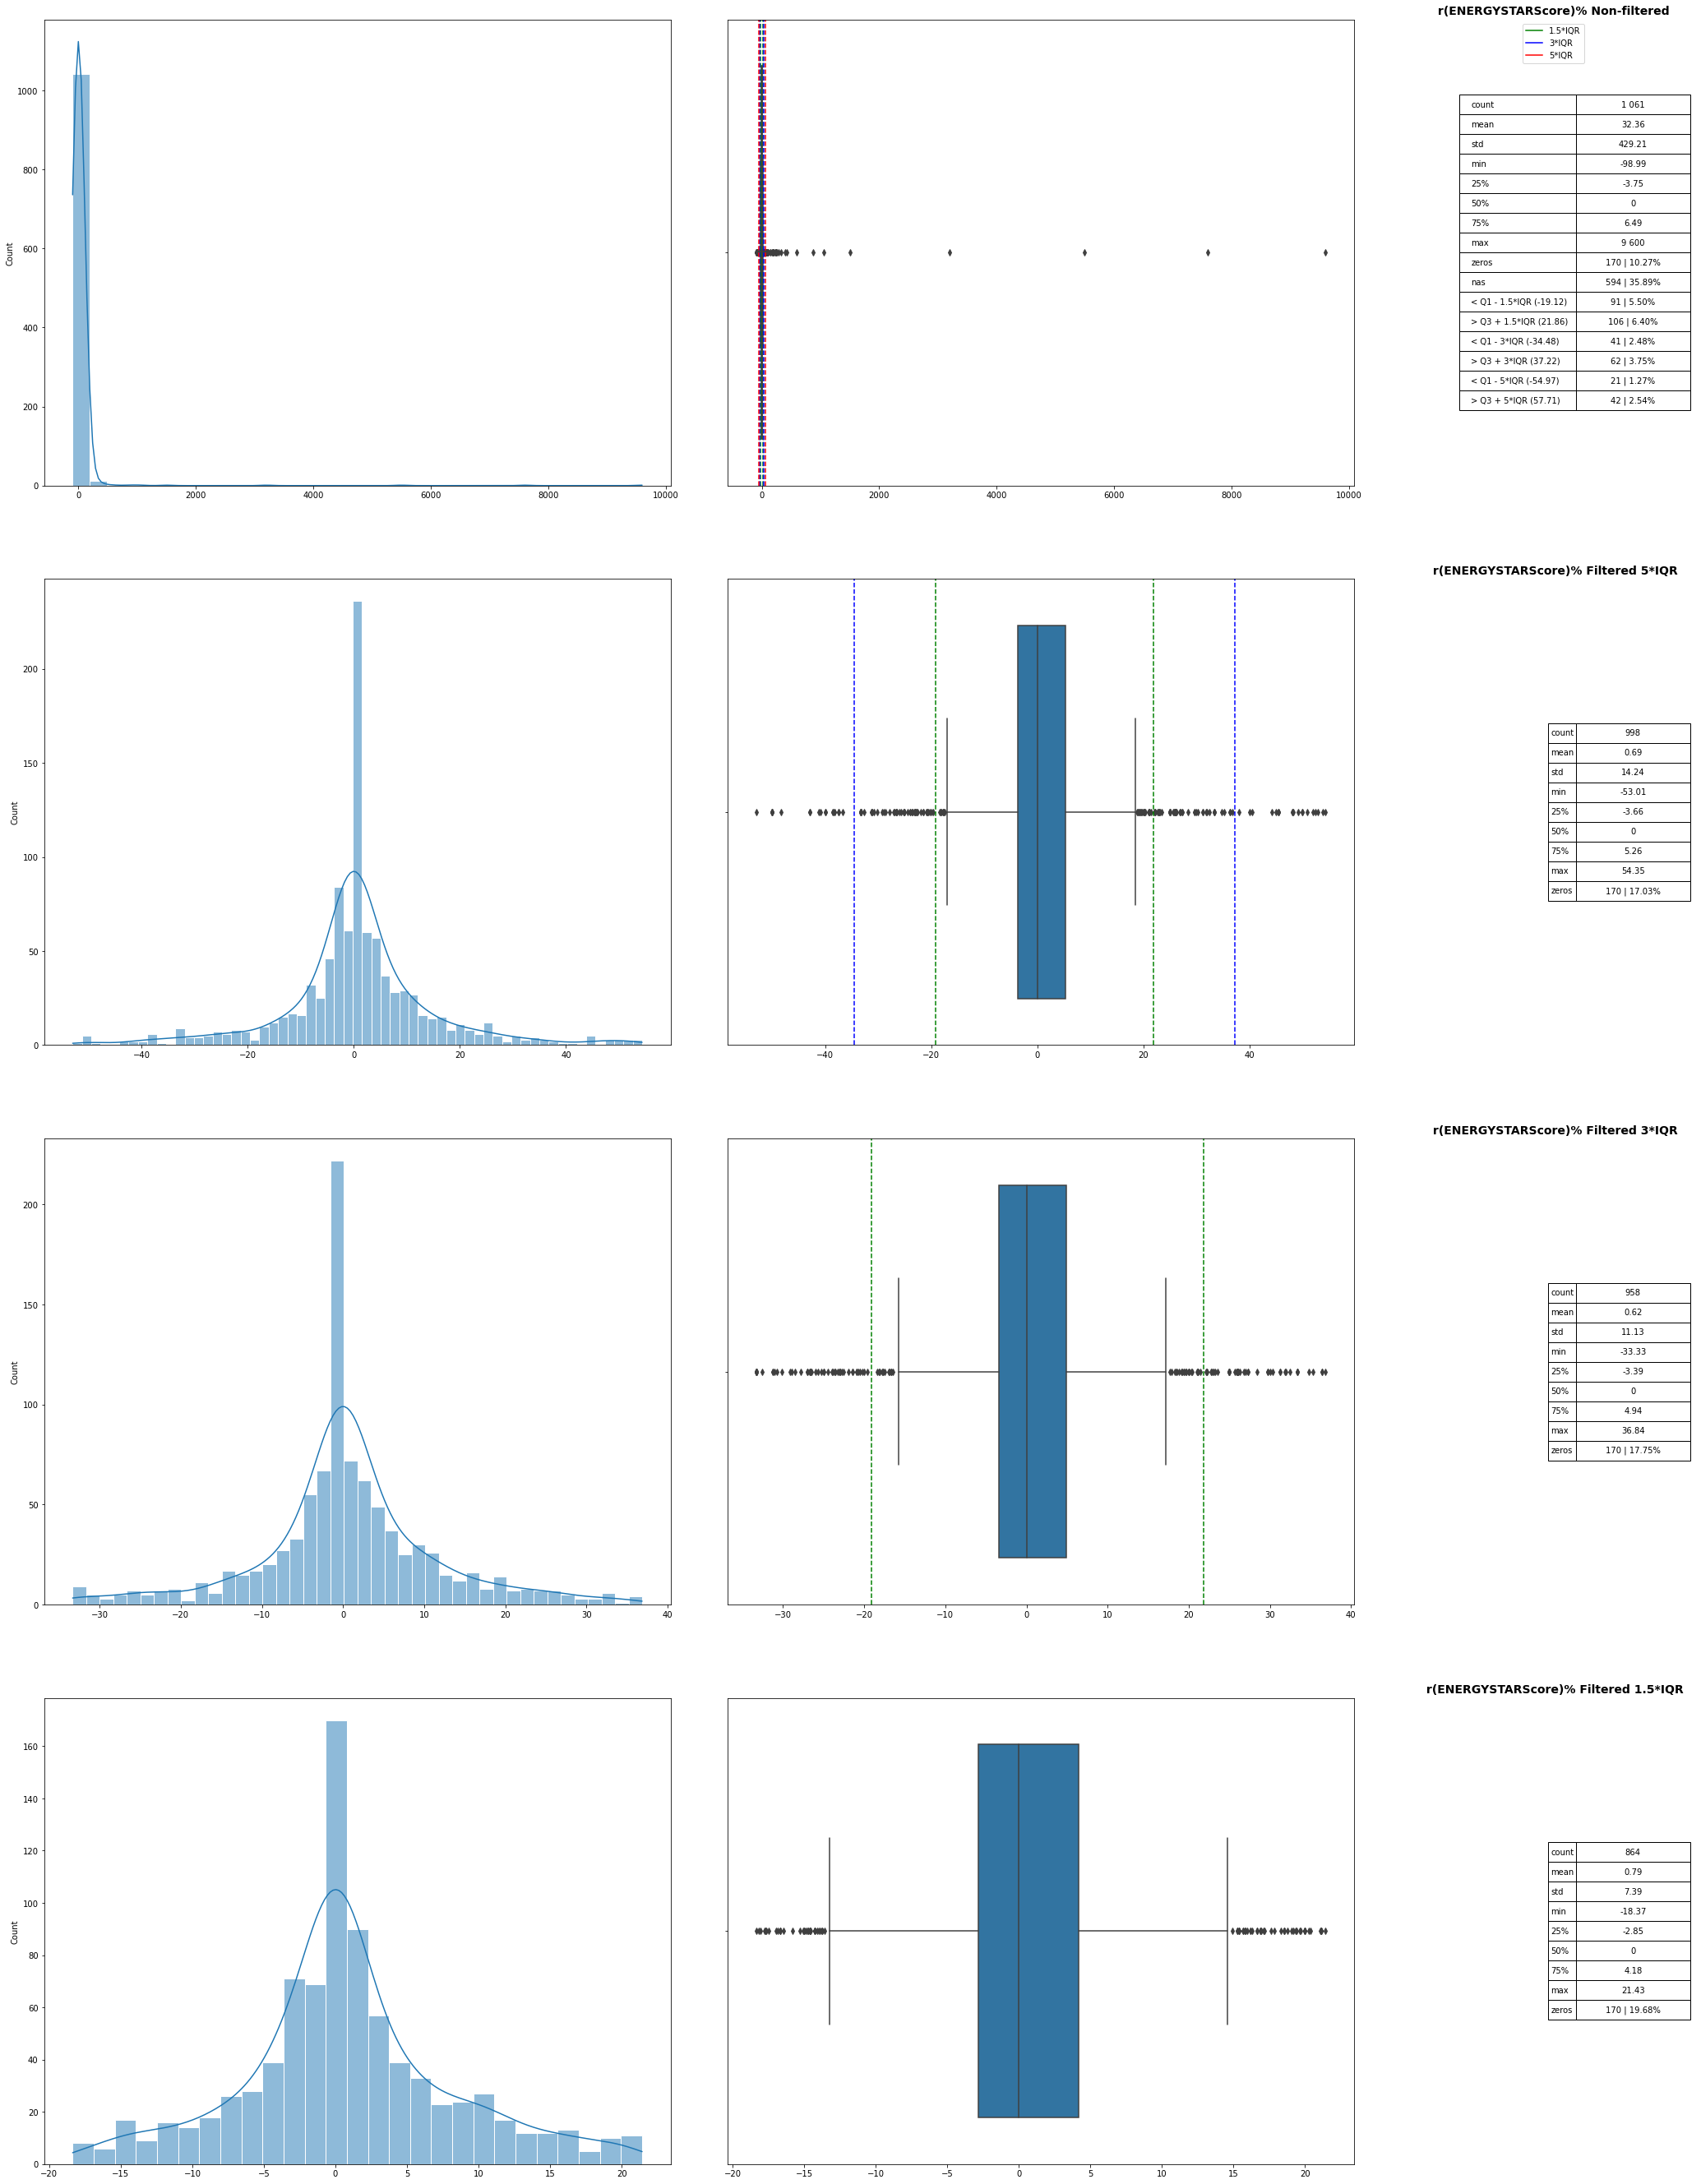

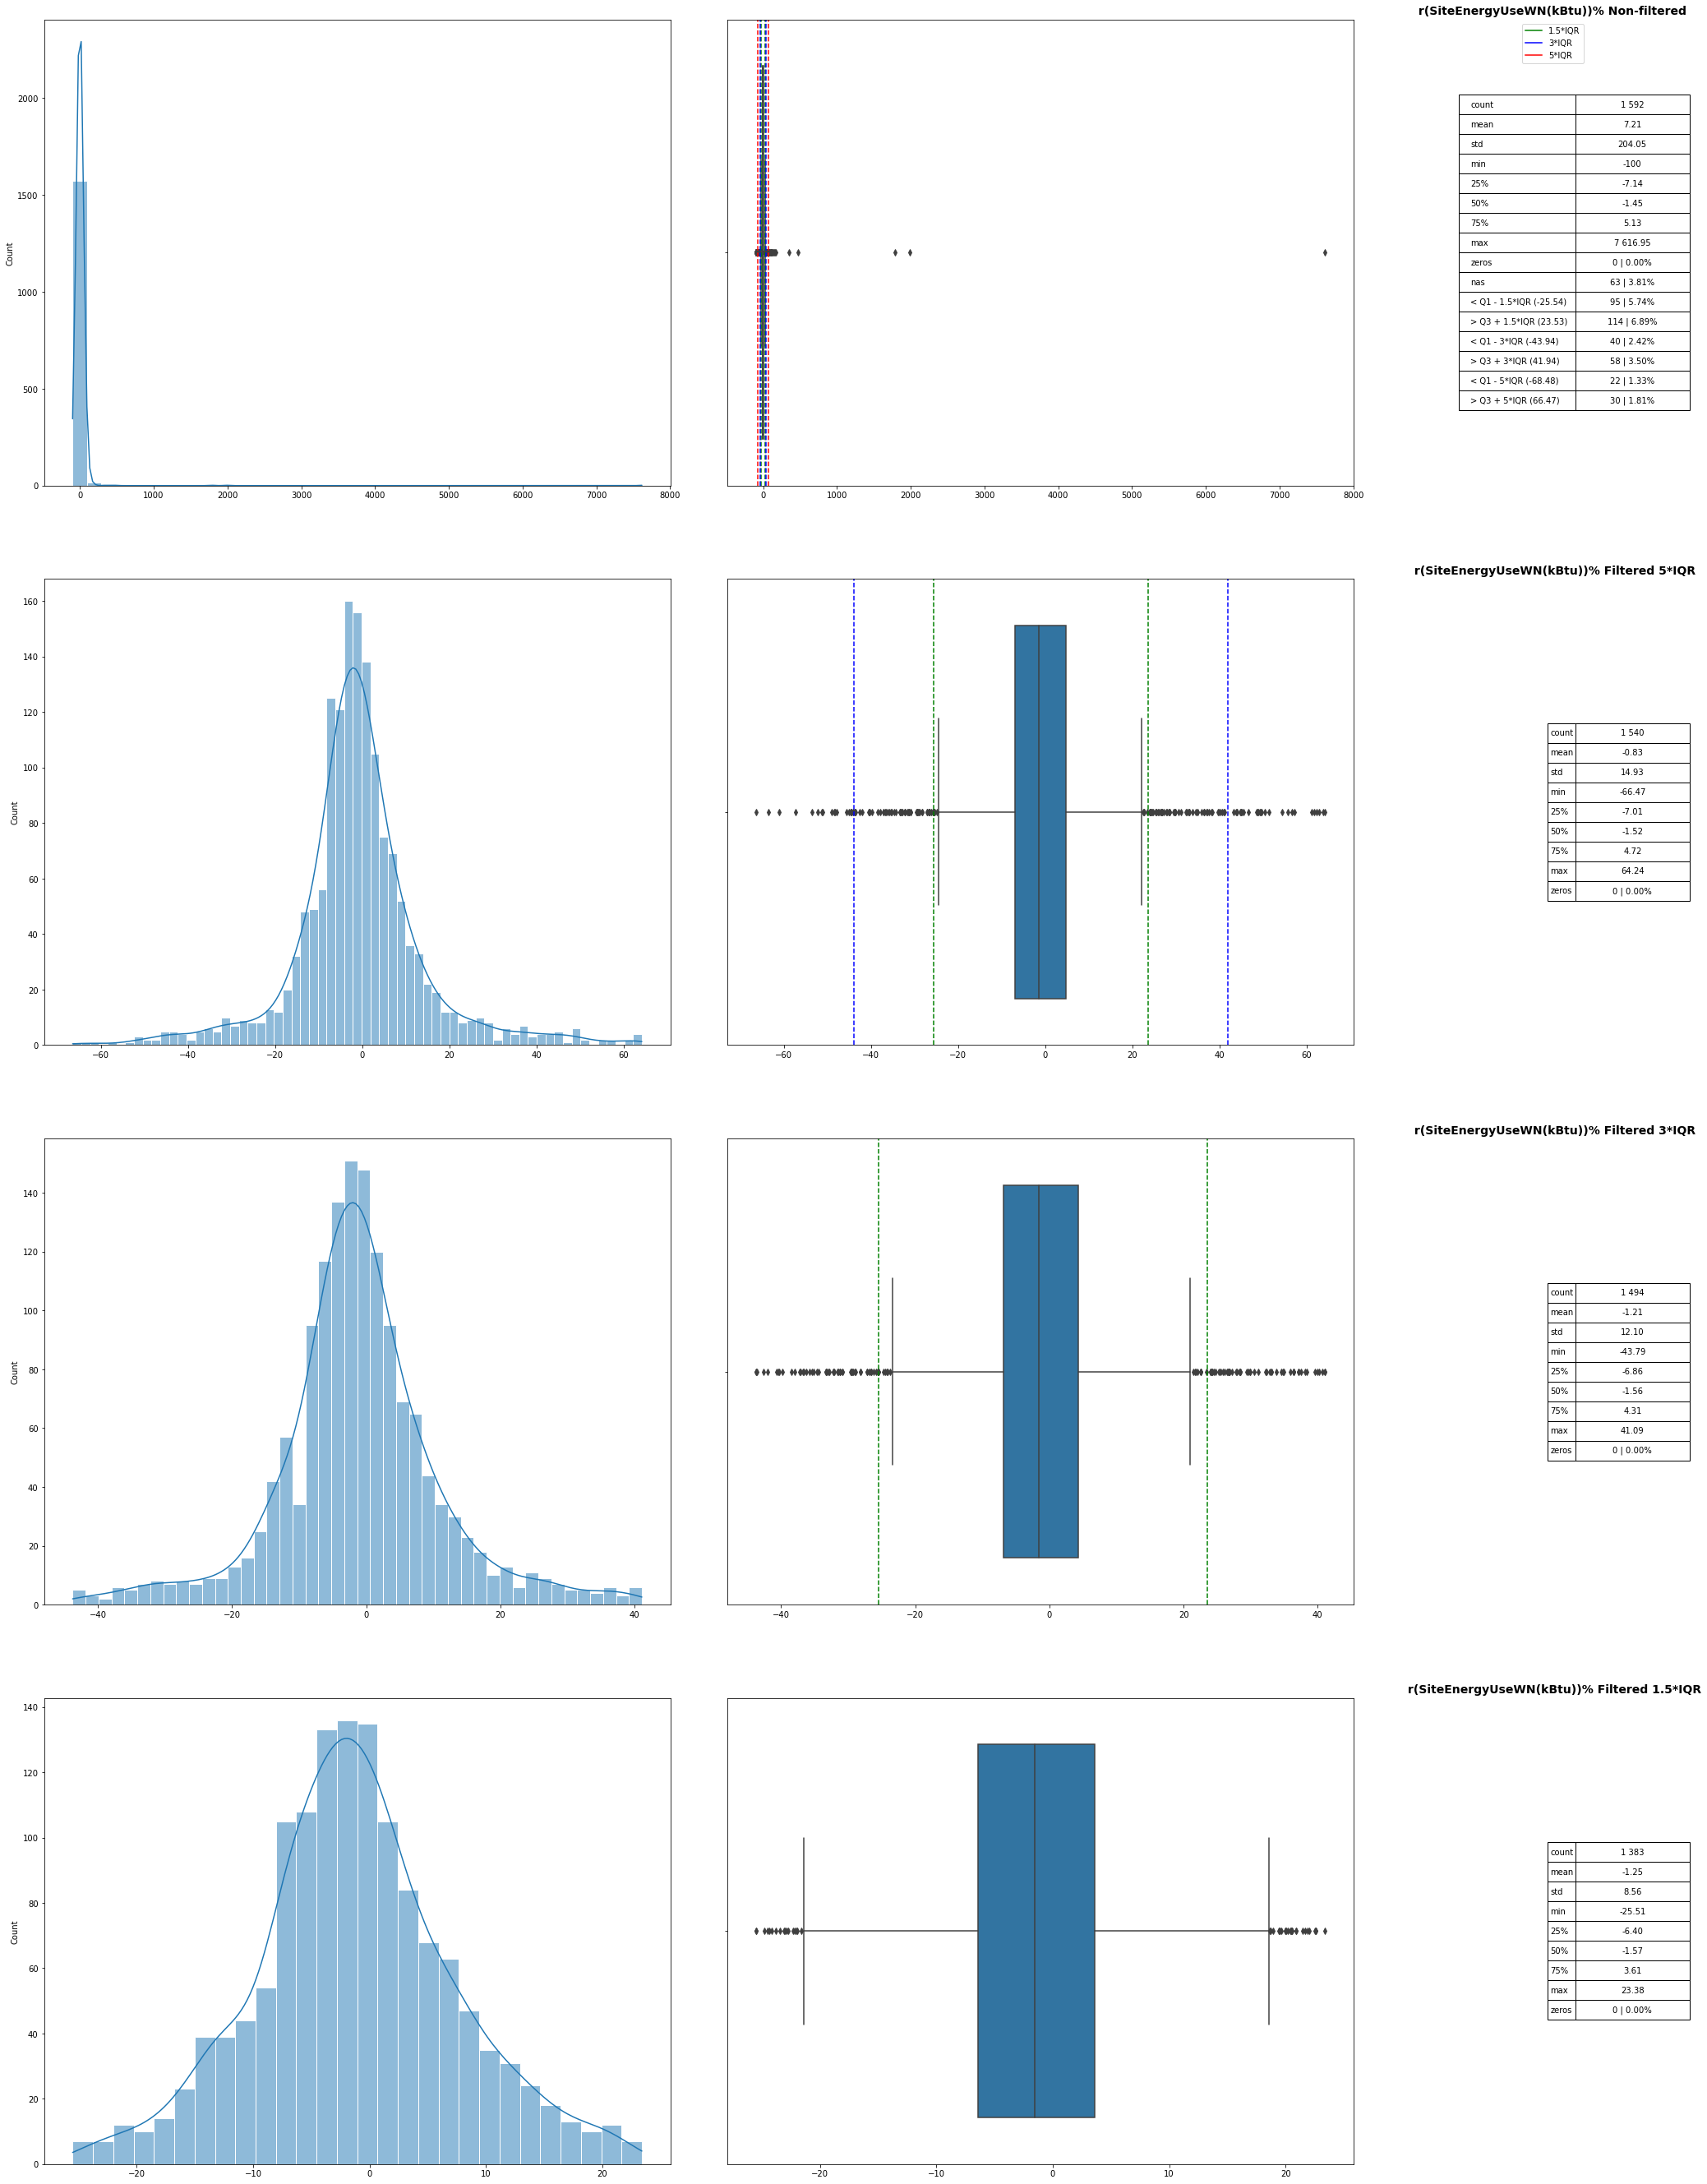

In [57]:
def compute_pct_change(df,key,columns):
    pct_columns = list(map(lambda x: f'r({x})%',columns))
    df[pct_columns] = df.groupby(by=key)[columns].transform(lambda x: 100*(x.iloc[1] - x.iloc[0])/x.iloc[0] if (x.count() == 2 and x.iloc[0] != 0.0) else np.NAN)
    return pct_columns

def display_pct(df,pct_columns,filters=[],no_iqr_filters=[]):
    for pct_column in pct_columns:
        filters_ = filters
        if pct_column in no_iqr_filters:
            filters_ = []
        univariate_num(df[pct_column],filters=filters_)

vcolumns = ['GHGEmissions','SiteEnergyUse_comp','c_TotalGFA','ENERGYSTARScore','SiteEnergyUseWN(kBtu)']
pct_columns = compute_pct_change(df,'OSEBuildingID',vcolumns)

display_pct(df[df['DataYear'] == 2016],pct_columns,filters=['1.5*IQR','3*IQR','5*IQR'],no_iqr_filters=['r(c_TotalGFA)%'])


Affichage après filtrage sur la variable consommation d'énergie normalisée.

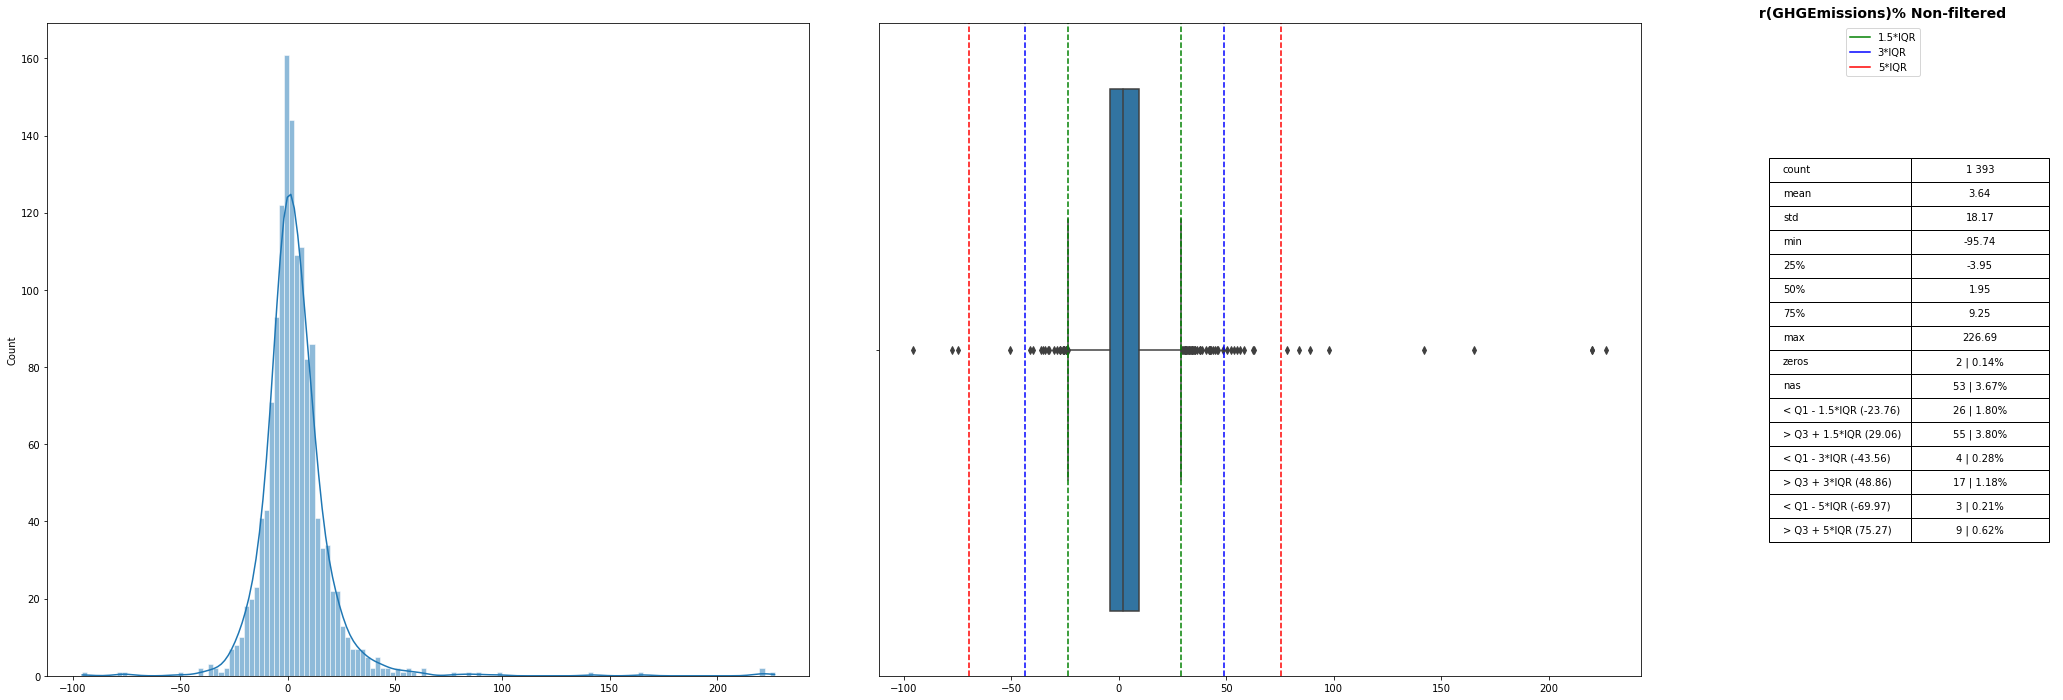

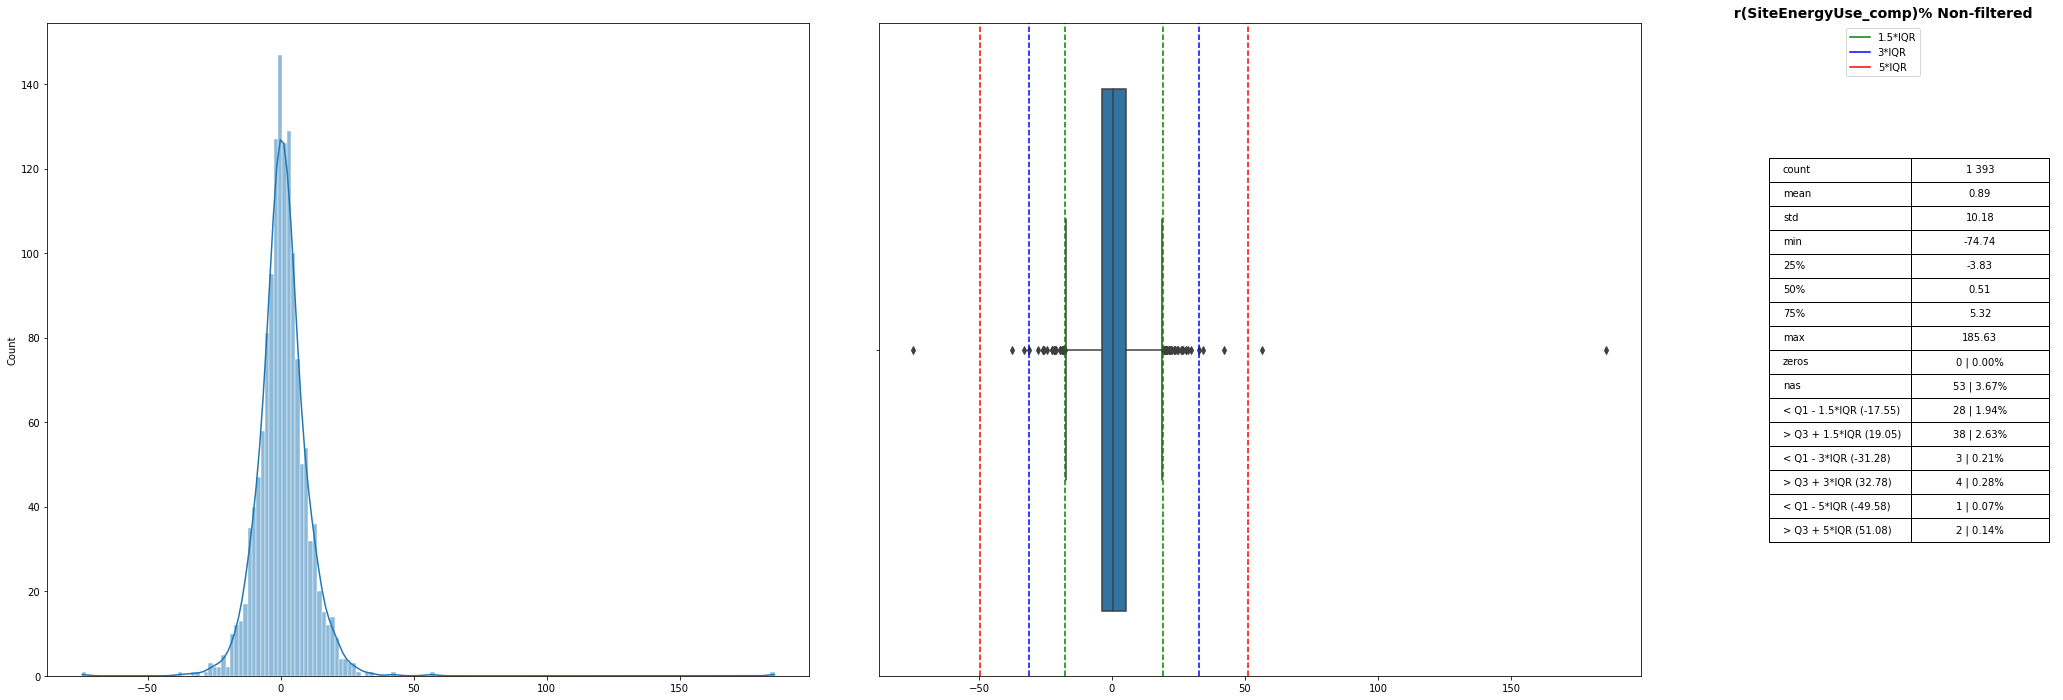

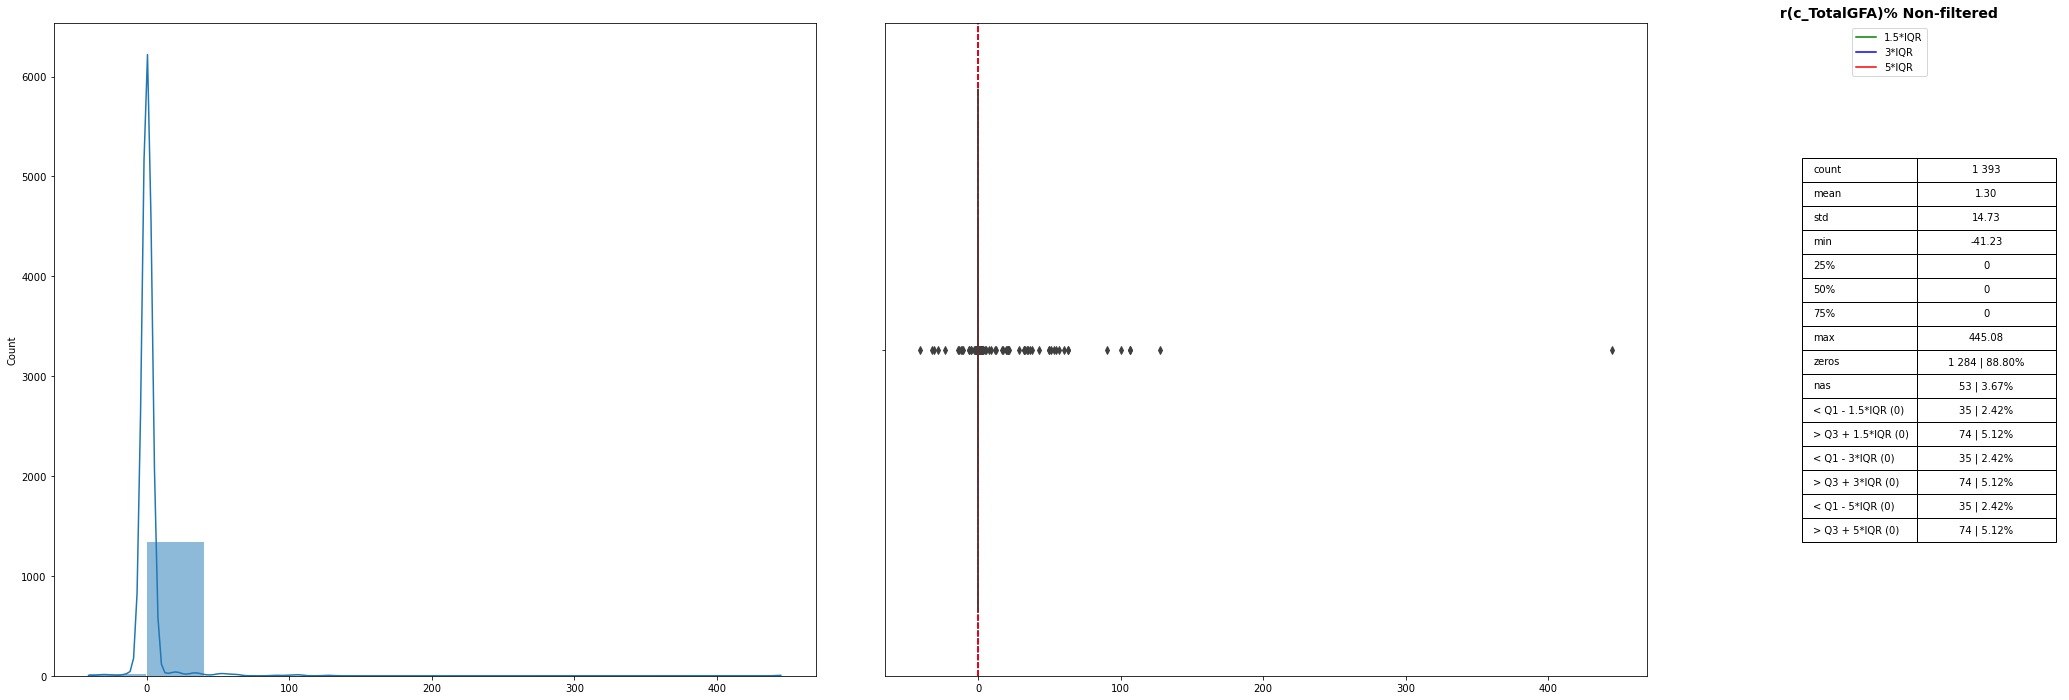

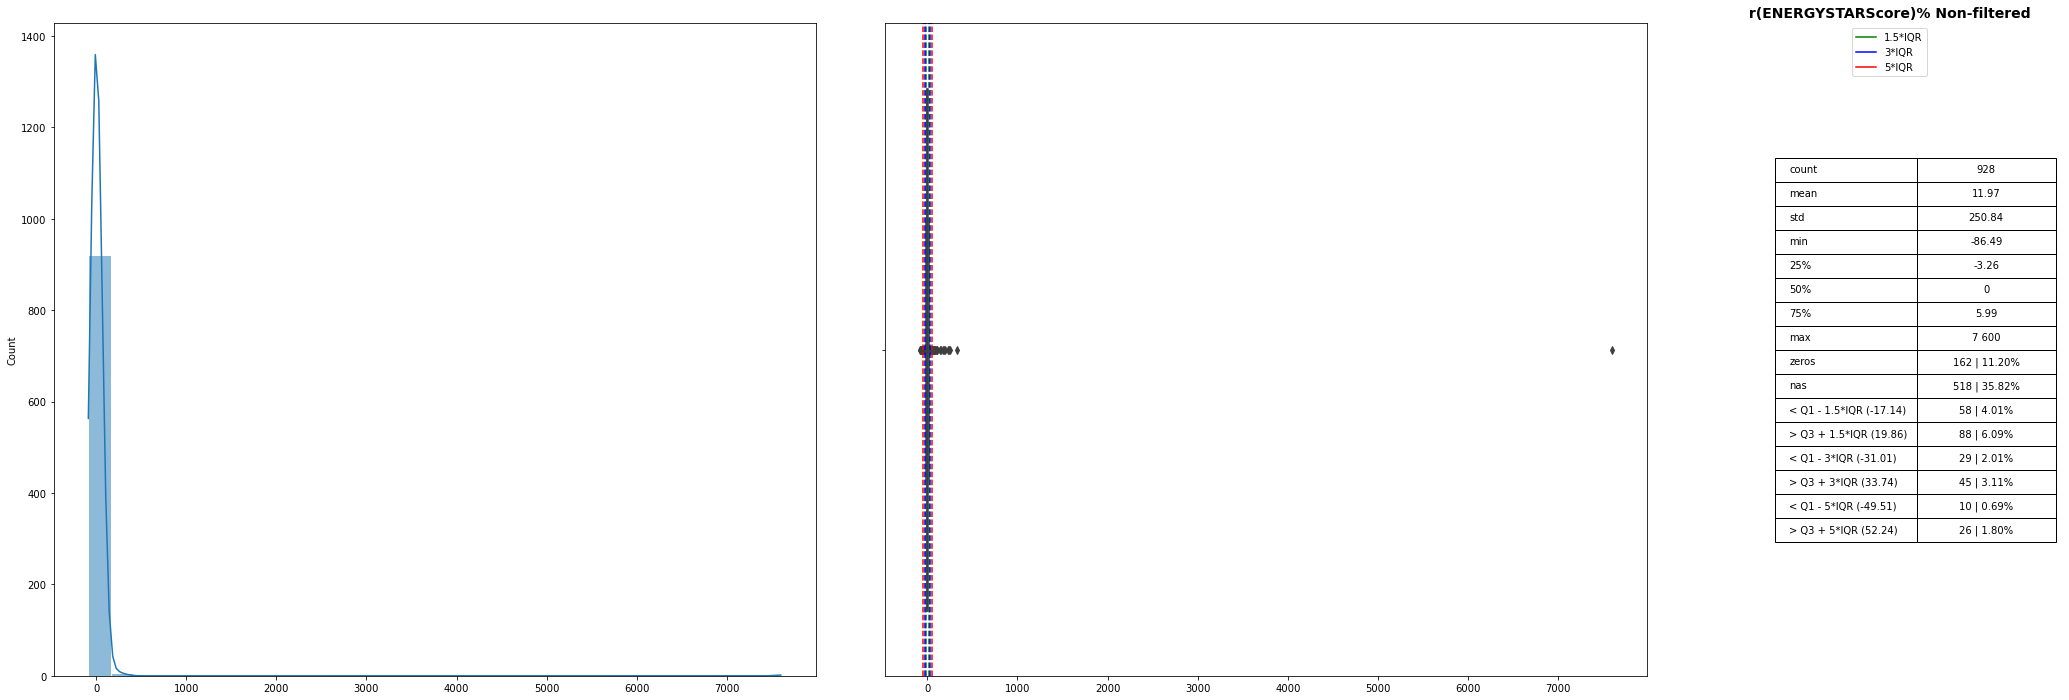

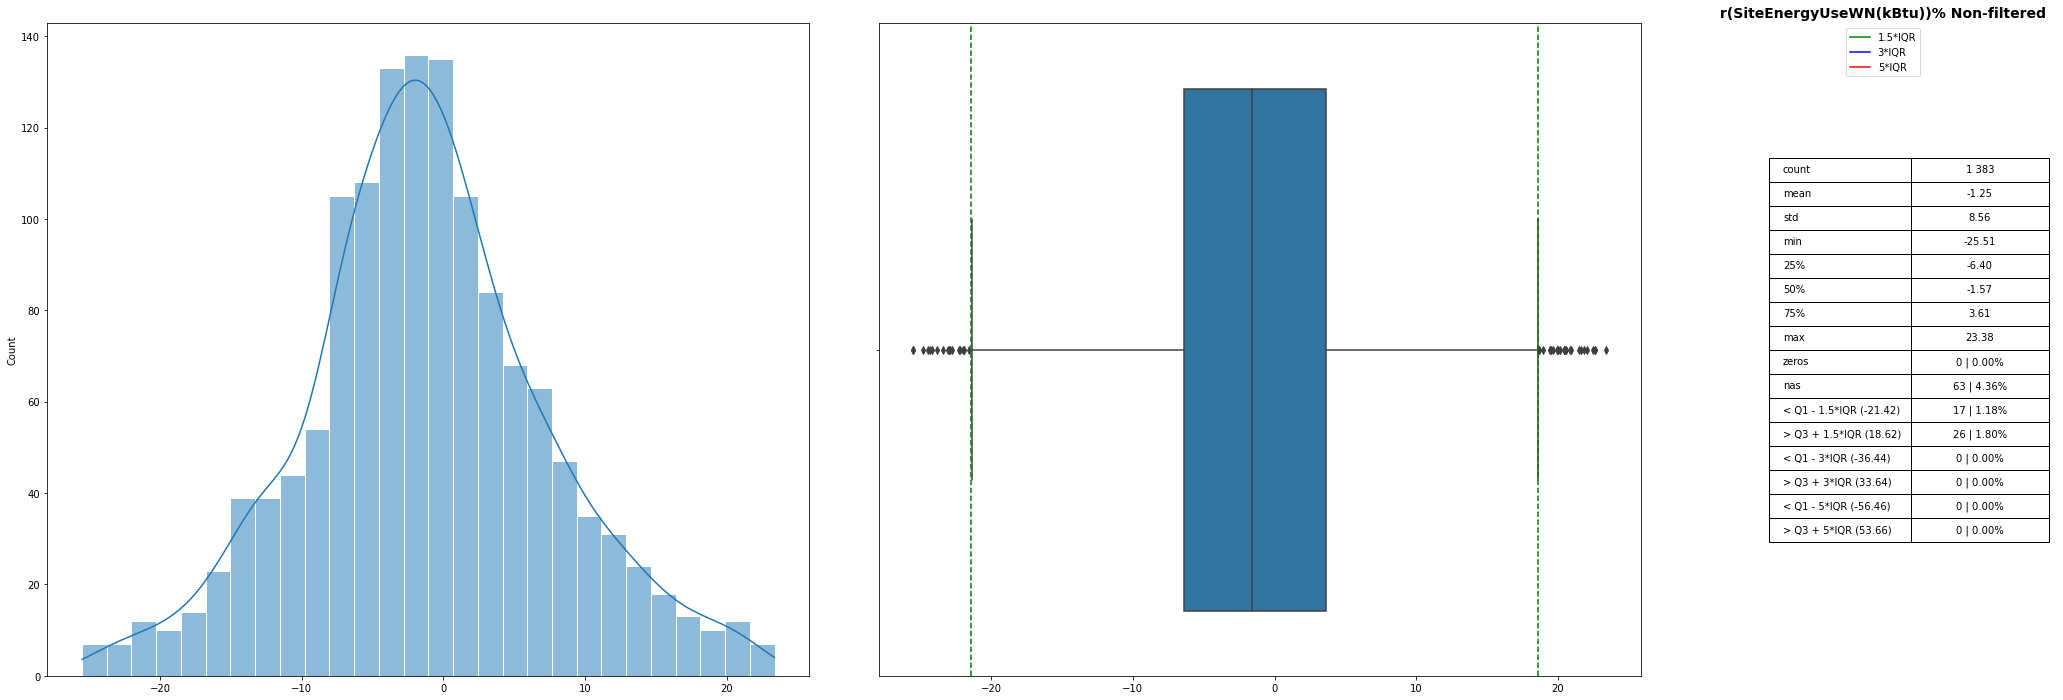

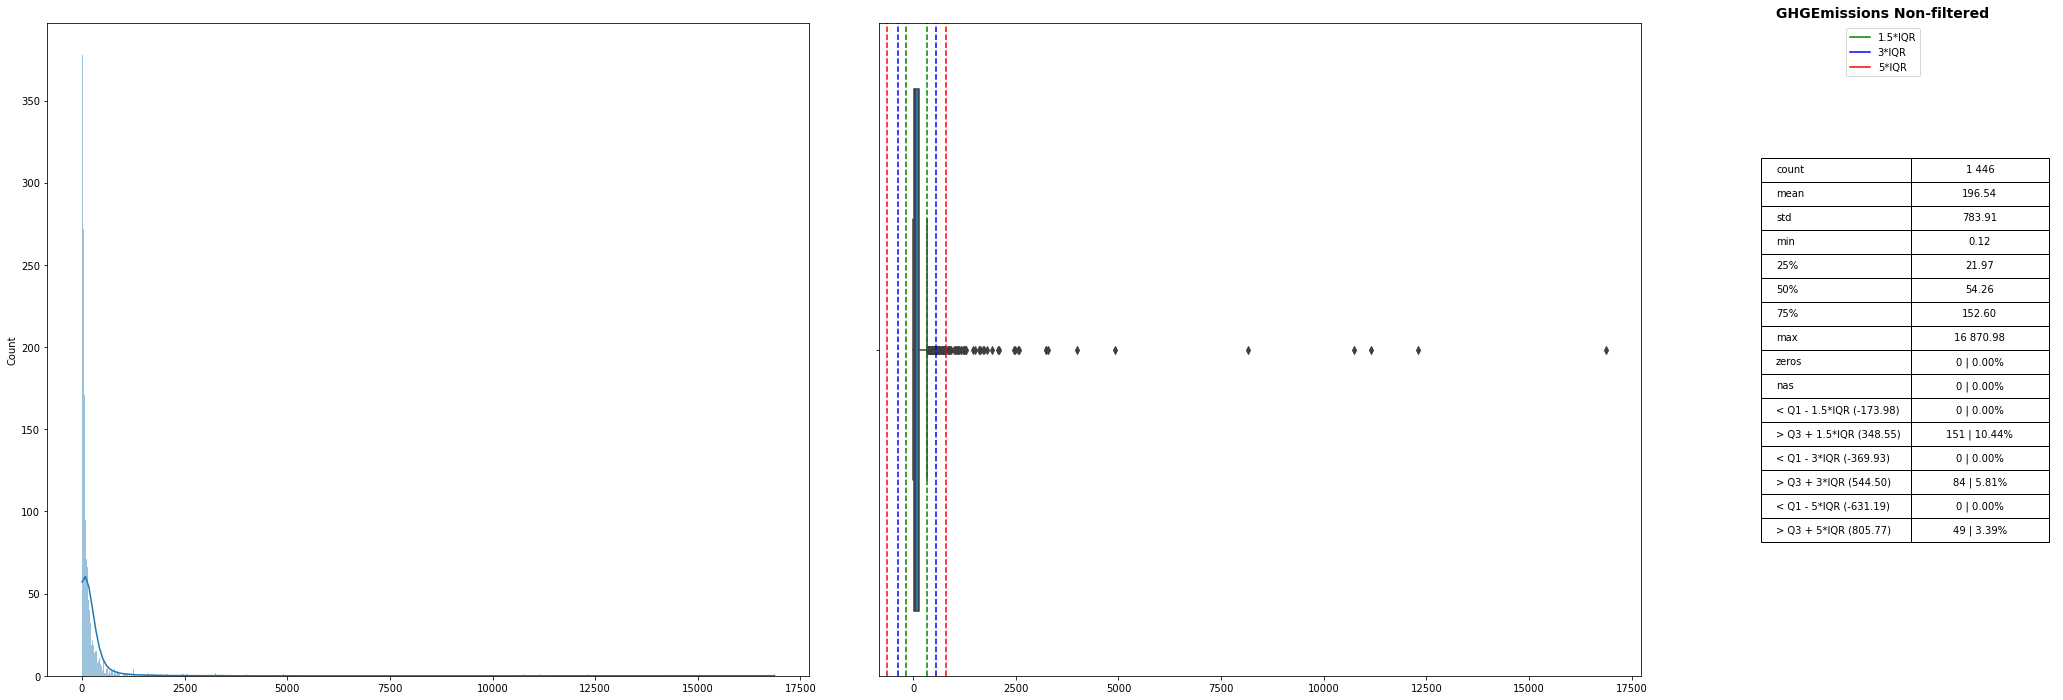

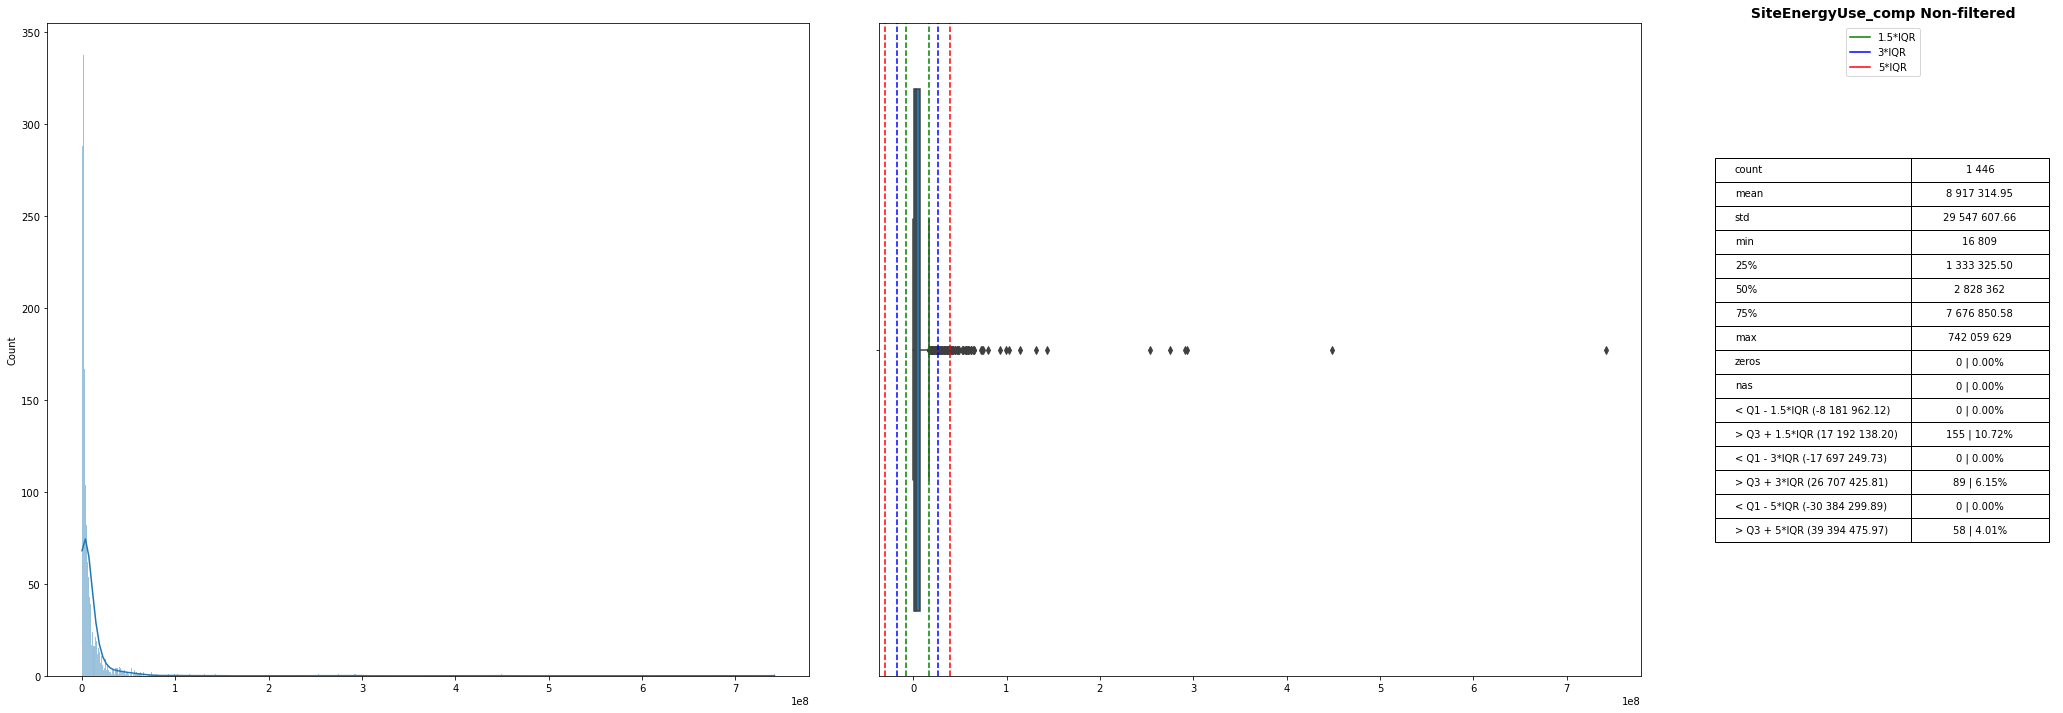

In [58]:
part_col = univariate_num_partition_filter(df,'r(SiteEnergyUseWN(kBtu))%','1.5*IQR')
display_pct(df[(df['DataYear'] == 2016) & (df[part_col] == 0)],pct_columns)
univariate_num(df[(df['DataYear'] == 2016) & (df[part_col] == 0)]['GHGEmissions'])
univariate_num(df[(df['DataYear'] == 2016) & (df[part_col] == 0)]['SiteEnergyUse_comp'])


==> On doit toujours filtrer les variables 'EnergyStarScore' et 'c_TotalGFA'

In [59]:
display(df[df['r(ENERGYSTARScore)%'] == df['r(ENERGYSTARScore)%'].max()][pct_columns+vcolumns+['OSEBuildingID']])
display(df[df['r(c_TotalGFA)%'] == df['r(c_TotalGFA)%'].max()][pct_columns+vcolumns+['OSEBuildingID']])

r(GHGEmissions)%  r(SiteEnergyUse_comp)%  r(c_TotalGFA)%  \
1912        -78.251051              -73.803085             0.0   
5233        -78.251051              -73.803085             0.0   

      r(ENERGYSTARScore)%  r(SiteEnergyUseWN(kBtu))%  GHGEmissions  \
1912               9600.0                 -74.766932        256.84   
5233               9600.0                 -74.766932         55.86   

      SiteEnergyUse_comp  c_TotalGFA  ENERGYSTARScore  SiteEnergyUseWN(kBtu)  \
1912          10851732.0     42760.0              1.0             11266246.0   
5233           2842819.0     42760.0             97.0              2842819.5   

      OSEBuildingID  
1912          23716  
5233          23716

r(GHGEmissions)%  r(SiteEnergyUse_comp)%  r(c_TotalGFA)%  \
311          -2.633367               -5.428198         445.085   
3650         -2.633367               -5.428198         445.085   

      r(ENERGYSTARScore)%  r(SiteEnergyUseWN(kBtu))%  GHGEmissions  \
311             25.925926                  -7.575928        250.25   
3650            25.925926                  -7.575928        243.66   

      SiteEnergyUse_comp  c_TotalGFA  ENERGYSTARScore  SiteEnergyUseWN(kBtu)  \
311           10018573.0     20000.0             27.0             10503717.0   
3650           9474745.0    109017.0             34.0              9707963.0   

      OSEBuildingID  
311             441  
3650            441

==> On doit supprimer les bâtiments: 441 and 23716 (OSEBuildingID)

Suppression de la plus grande surface.

In [60]:
max_GFA_ids = df[df['c_TotalGFA'] == df['c_TotalGFA'].max()]['OSEBuildingID'].values
df.drop(index=df[df['OSEBuildingID'].isin(max_GFA_ids)].index,inplace=True)

On vérifie la cohérence des caractéristiques physiques des bâtiments entre 2015 et 2016

In [61]:
def check_consistency(df,key,cons_cols):
    consistency_columns = list(map(lambda x: f'{x}_consistency',cons_cols))
    df[consistency_columns] = df.groupby(by=key)[cons_cols].transform(lambda x: x.iloc[0] == x.iloc[1] if x.count() == 2 else np.NAN)
    return consistency_columns

check_columns = ['c_MainEnergy','c_PropertyType','NumberofFloors','NumberofBuildings','ENERGYSTARScore']
cons_columns = check_consistency(df,'OSEBuildingID',check_columns)
(df[df[cons_columns].all(axis=1) == False][cons_columns]).value_counts()

c_MainEnergy_consistency  c_PropertyType_consistency  NumberofFloors_consistency  NumberofBuildings_consistency  ENERGYSTARScore_consistency
True                      True                        True                        True                           False                          1608
False                     True                        True                        True                           False                            90
True                      True                        True                        False                          False                            54
                          False                       True                        True                           False                            18
                          True                        True                        False                          True                             14
False                     True                        True                        True                           T

Calcul des moyennes

In [62]:
def compute_mean(df,key,columns):
    mean_columns = list(map(lambda x: f'{x}_mean',columns))
    df[mean_columns] = df.groupby(by=key)[columns].transform(lambda x: x.mean())
    return mean_columns

m_columns = ['SiteEnergyUse_comp','GHGEmissions','c_TotalGFA','NumberofBuildings','ENERGYSTARScore']
mean_columns = compute_mean(df,'OSEBuildingID',m_columns)


Création de la variable data 

In [63]:
# set to NAN solo lines (correct univariate_num_partition_filter)
df.loc[ df[df['r(c_TotalGFA)%'].isna() == True].index, part_col] = np.NAN
# drop building 441 and 23716
df.drop(index=df[df['OSEBuildingID'].isin([441,23716])].index,inplace=True)
data = df[ ((df['DataYear'] == 2016) & (df[part_col] == 0)) | (df[part_col].isna() == True)  ].copy()

# 3- Sauvegarde du dataset pour analyse

### Log-Transformation des variables à prédire.

In [64]:
data.loc[:,'SiteEnergyUse_comp_mean'] = np.log(data['SiteEnergyUse_comp_mean'].values)
data.loc[:,'GHGEmissions_mean'] = np.log(data['GHGEmissions_mean'].values)

### Encodage (one-hot encoder) des variables catégorielles

In [65]:
#test #1
#test = pd.DataFrame(data={'A':[1,2,3],'B':[4,5,6],'C':[7,8,9]})
#x = test.apply(lambda r: pd.Series(data=[r['A']+1,r['B']+2],index=['A+1','B+2']),axis=1)
#display(test)
#test.loc[:,['A+1','B+2']]= x
#display(test)

# test #2
#test = pd.DataFrame(data={'cat':['al pha','be ta','g amma'],'B':[4,5,6],'C':[7,8,9]})b
#encode_cat_col(test,'cat')
#test

def select_cat_col(df,cols):
    cat_cols_prefix = list(map(lambda x: x + "_<",cols))
    return list( filter(
                    lambda x: any(list(map(lambda y: y in x,cat_cols_prefix))),
                    df.columns
                    ) 
            )

def encode_cat_col(df,col):
    col_uniques = df[col].unique()
    col_names = list(map(lambda x: col+"_<"+x+">",col_uniques))
    def encode_cat_value(v):
        if v is not np.nan:
            data = list(map(lambda x: 1 if v == x else 0,col_uniques))
        else:
            data = [np.nan]*len(col_names)
        return pd.Series(data=data,index=col_names)
    df.loc[:,col_names] = df.apply(lambda r:encode_cat_value(r[col]),axis=1)

encode_cat_col(data,'c_PropertyType')
encode_cat_col(data,'c_MainEnergy')

### Imputation Energy Score

#### Choix de la méthode d'imputation

In [66]:
# imputation Energy score
from sklearn.model_selection import train_test_split

def R2(y,y_hat):
    return 1 - sum((y - y_hat)**2)/sum((y - y.mean())**2)

xs = ['BuildingAge','SourceEUIWN(kBtu/sf)','NumberofFloors','NumberofBuildings_mean'] + select_cat_col(data,['c_PropertyType']) 
y = 'ENERGYSTARScore_mean'
d = data[data[[y]].notna().all(axis=1)].loc[:,xs + [y]]
X = d[xs]
Y = d[y]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [67]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator=KNeighborsRegressor(),param_grid={'n_neighbors':range(5,40,5)})
gs.fit(X_train,y_train)
print(f"R2 - KNN {gs.score(X_test,y_test)}")
print(gs.best_params_)

R2 - KNN 0.16984940751077093
{'n_neighbors': 25}


In [68]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

d_ = d.copy(deep=True)
d_.loc[y_test.index,y] = np.NAN
iterative_imputer = IterativeImputer(initial_strategy='median',max_iter=1000)
data_imputed = pd.DataFrame(data=iterative_imputer.fit_transform(d_),columns=d_.columns,index=d_.index)
y_hat = data_imputed.loc[y_test.index,y]
print(f"R2 - Iteative Imputer {R2(y_test,y_hat)}")

R2 - Iteative Imputer 0.25464732824392255


In [69]:
from sklearn.impute import KNNImputer

d_ = d.copy(deep=True)
d_.loc[y_test.index,y] = np.NAN
knn_imputer = KNNImputer(n_neighbors=25)
data_imputed = pd.DataFrame(data=knn_imputer.fit_transform(d_),columns=d_.columns,index=d_.index)
y_hat = data_imputed.loc[y_test.index,y]
print(f"R2 - Knn Imputer {R2(y_test,y_hat)}")

R2 - Knn Imputer 0.1698494075107707


#### Imputation avec Iterative imputer

In [70]:
data_imputed = pd.DataFrame(data=iterative_imputer.fit_transform(data.loc[:,xs + [y]]),columns=data.loc[:,xs + [y]].columns,index=data.loc[:,xs + [y]].index)
data[y] = data_imputed[y]

Restriction de l'Energy Score imputé au domaine de valeurs [0,100]

In [71]:
data.loc[data[y] < 1,y] = 1
data.loc[data[y] > 100,y] = 100

### Selection des colonnes

In [72]:
tbe = ['GHGEmissions_mean','SiteEnergyUse_comp_mean']
cat_cols = ['c_MainEnergy','c_PropertyType']
props = ['c_TotalGFA_mean','distanceCenter','angleCenter','BuildingAge','NumberofFloors','NumberofBuildings_mean','ENERGYSTARScore_mean']
selected_columns = props + select_cat_col(data,cat_cols)
print(f'nb columns:{len(selected_columns)}')

nb columns:34


# 4-Etude du jeu de données nettoyé

## Affichage corrélation

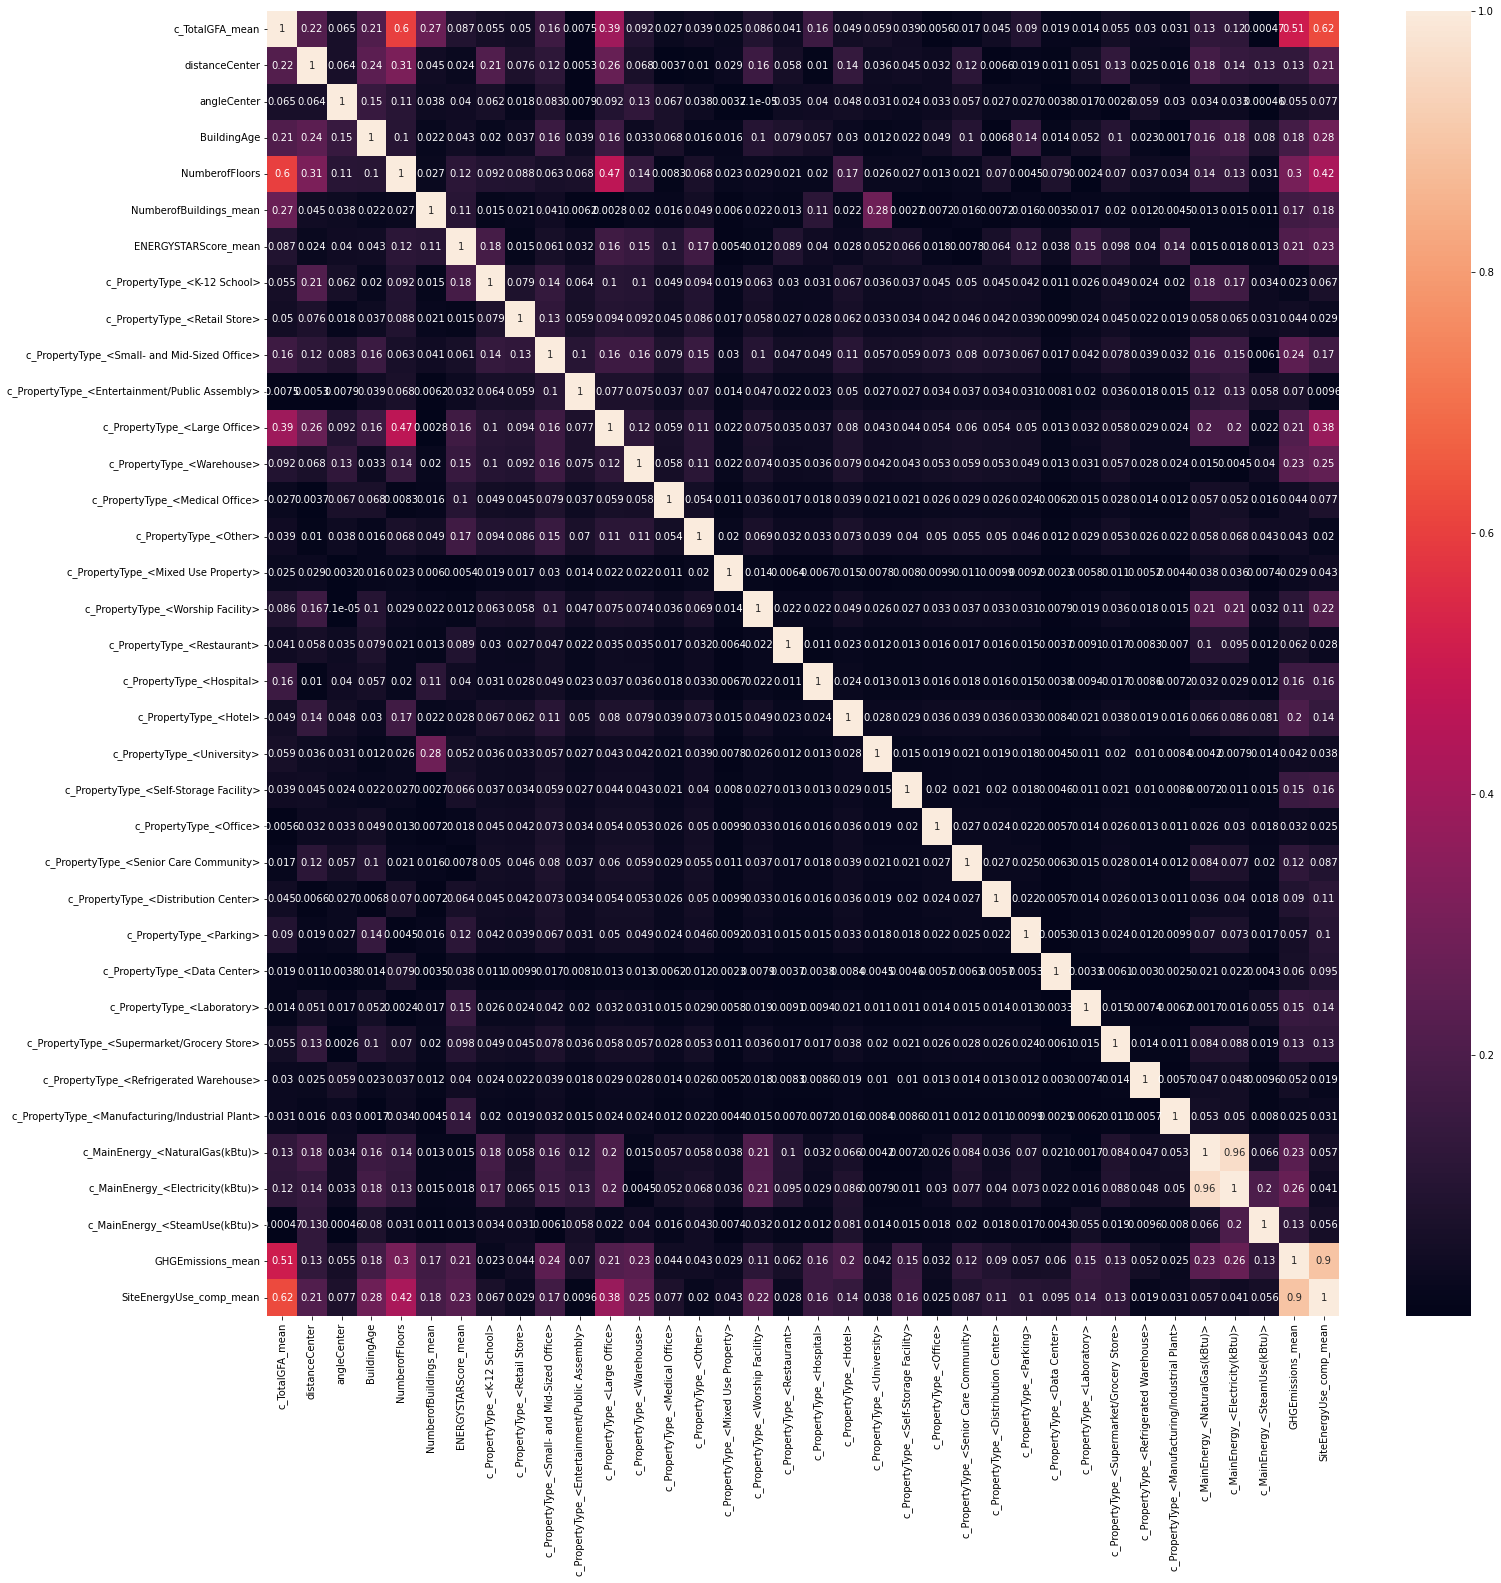

In [73]:
fig,ax= plt.subplots(figsize=(24,24))
_ = sns.heatmap(data=data.loc[:,selected_columns+tbe].corr().abs(),annot=True,ax=ax)

## Distribution par année et par type de bâtiment:

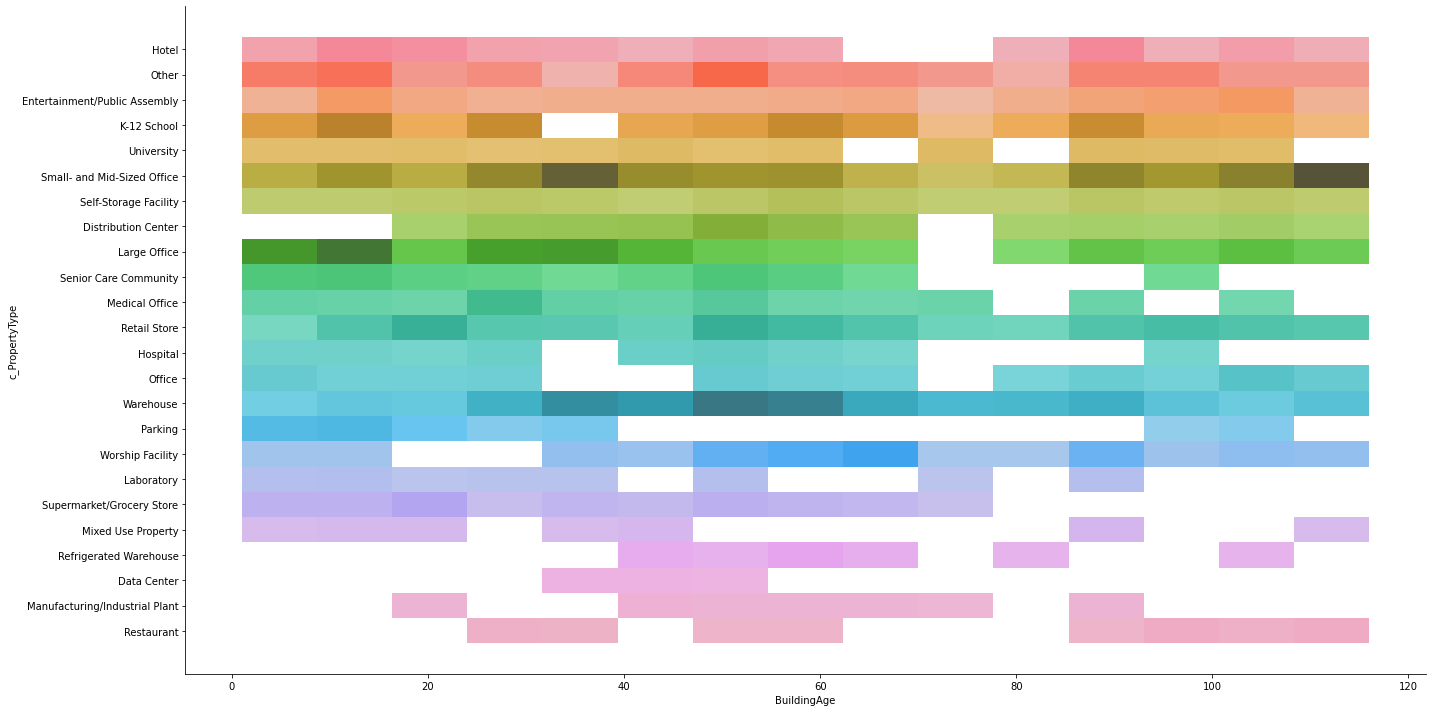

In [74]:
_= sns.displot(df, x="BuildingAge", y="c_PropertyType", hue="c_PropertyType", legend=False,height=10,aspect=2,kind='hist')

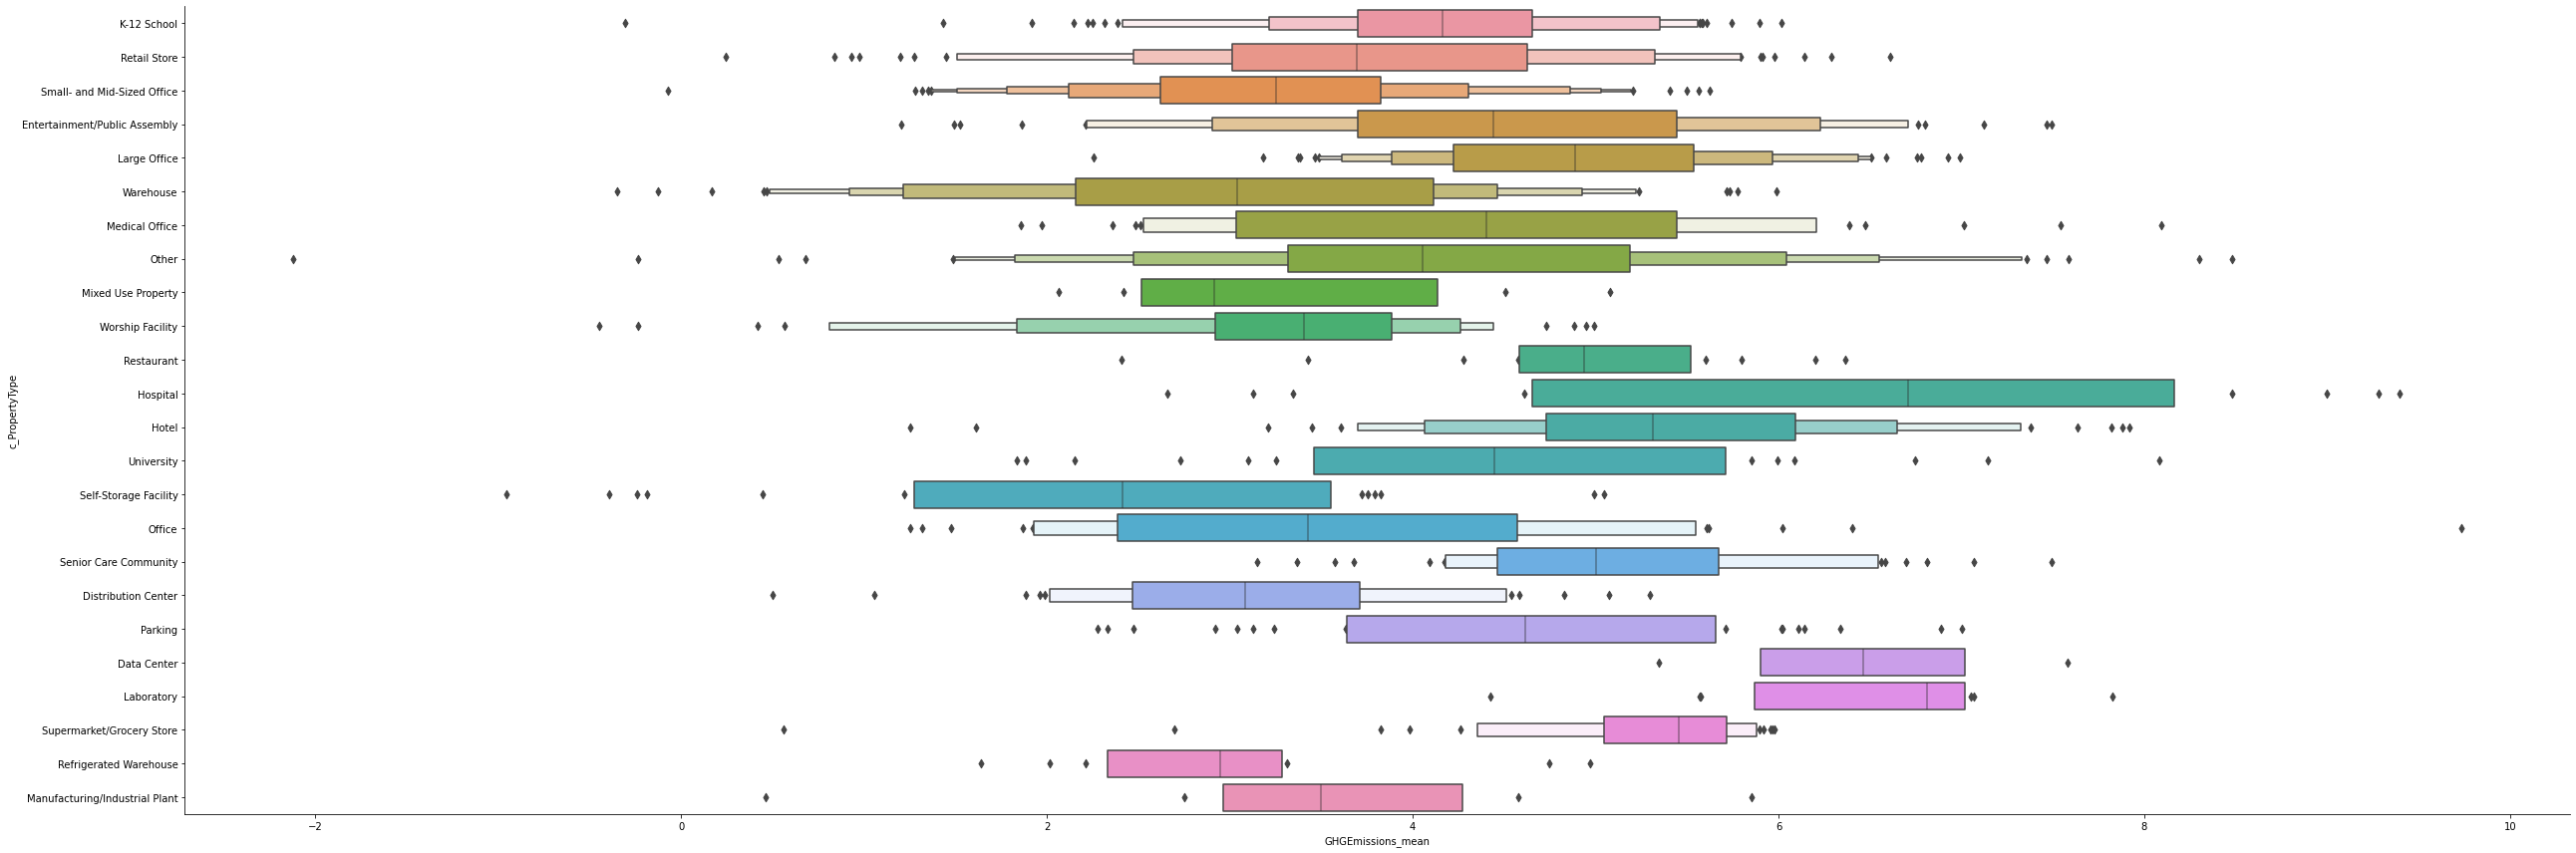

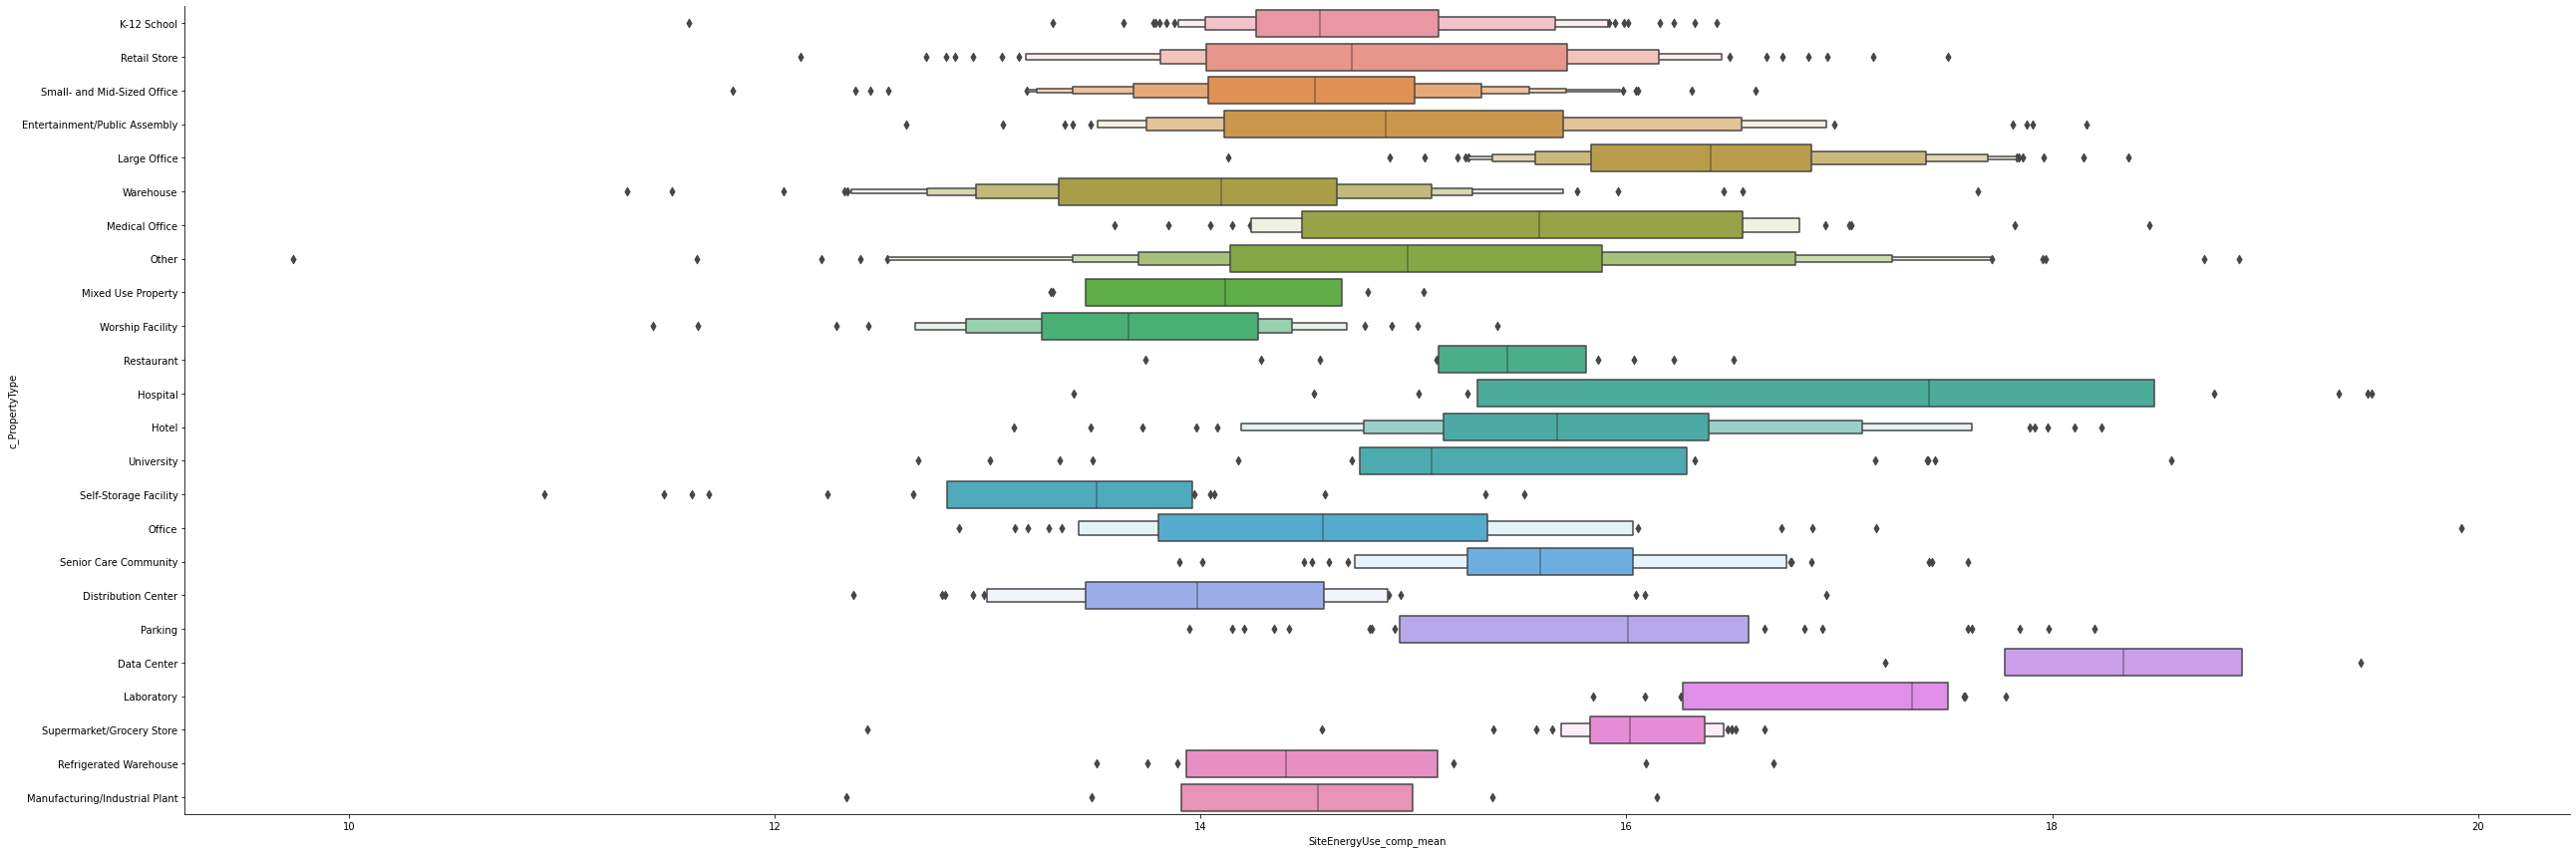

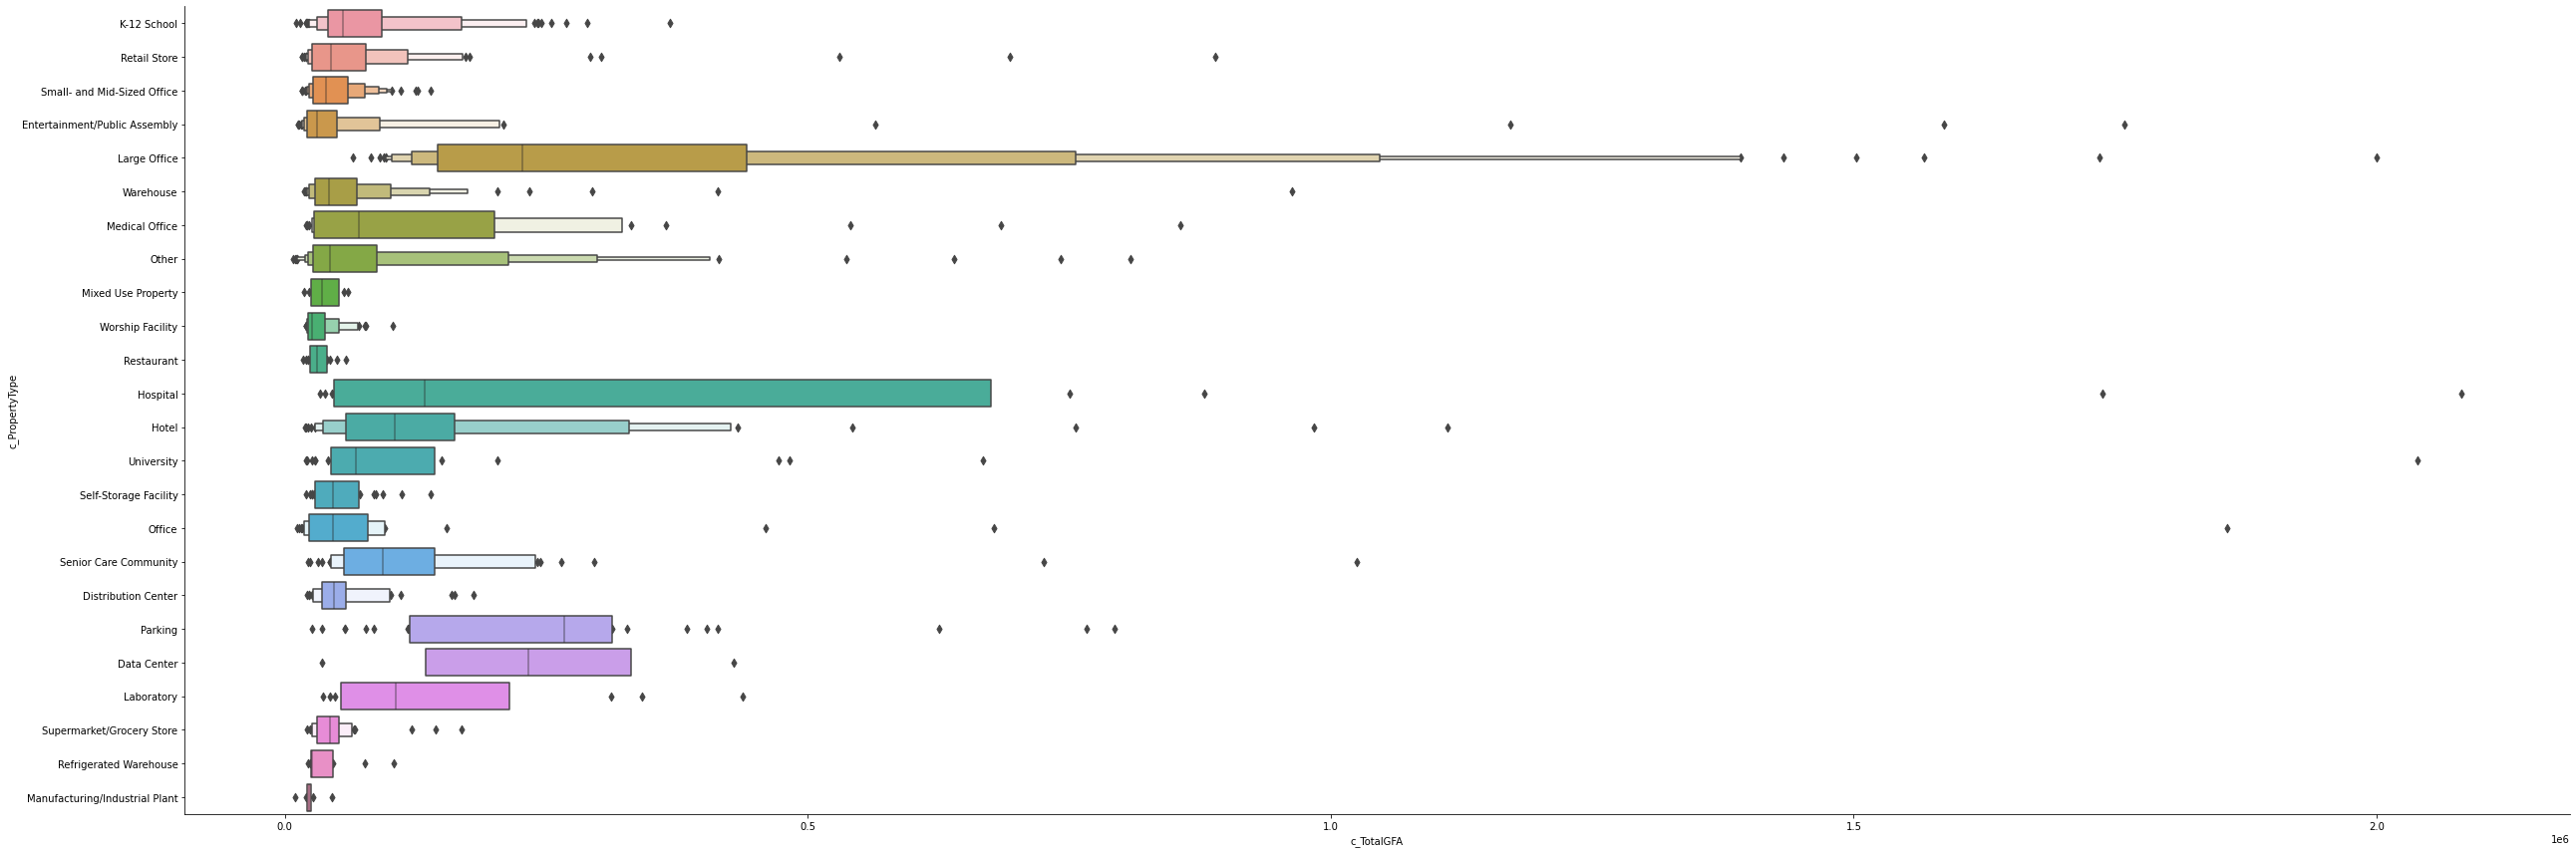

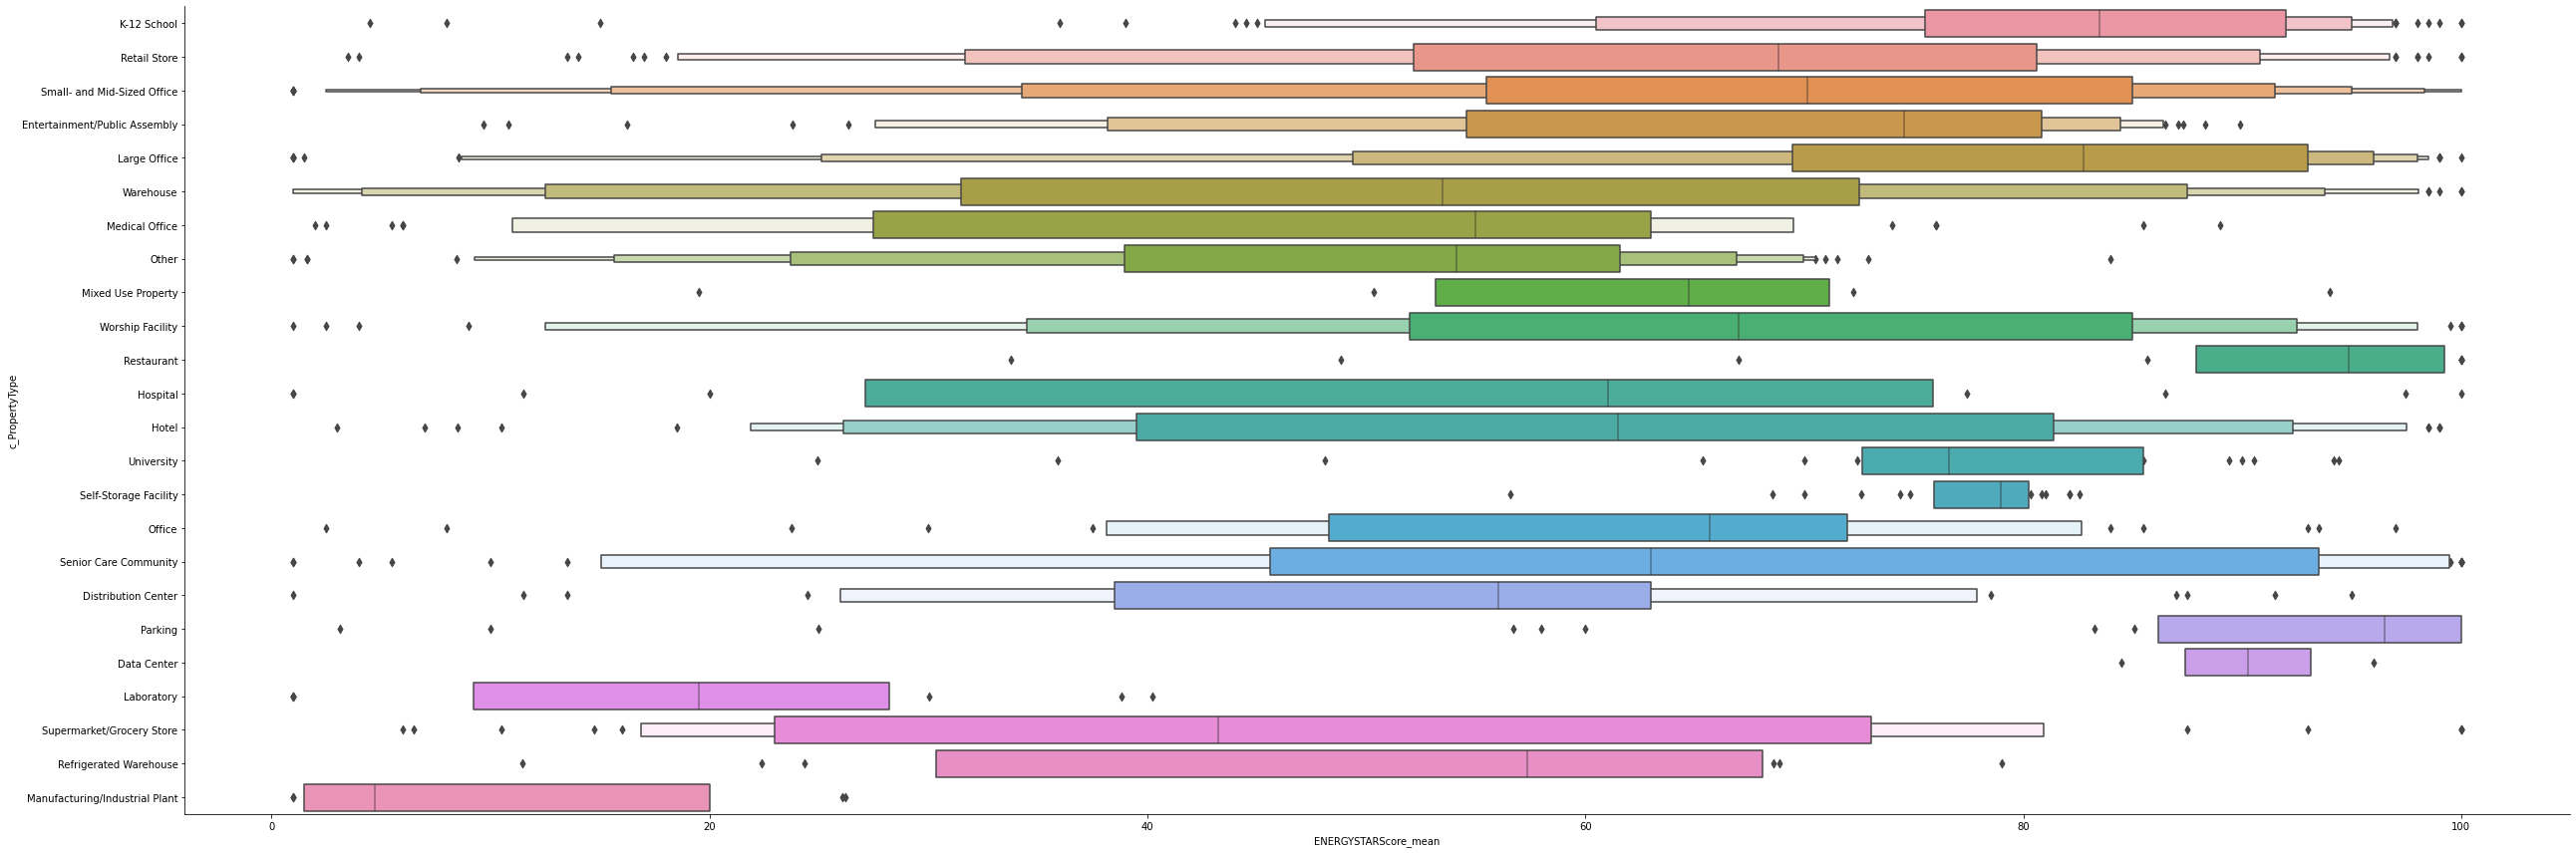

In [75]:
for x in ['GHGEmissions_mean','SiteEnergyUse_comp_mean','c_TotalGFA','ENERGYSTARScore_mean']:
    _ = sns.catplot(x=x,y='c_PropertyType',data=data,height=12,aspect=3,kind='boxen')

Affichage du log des variables à prédire

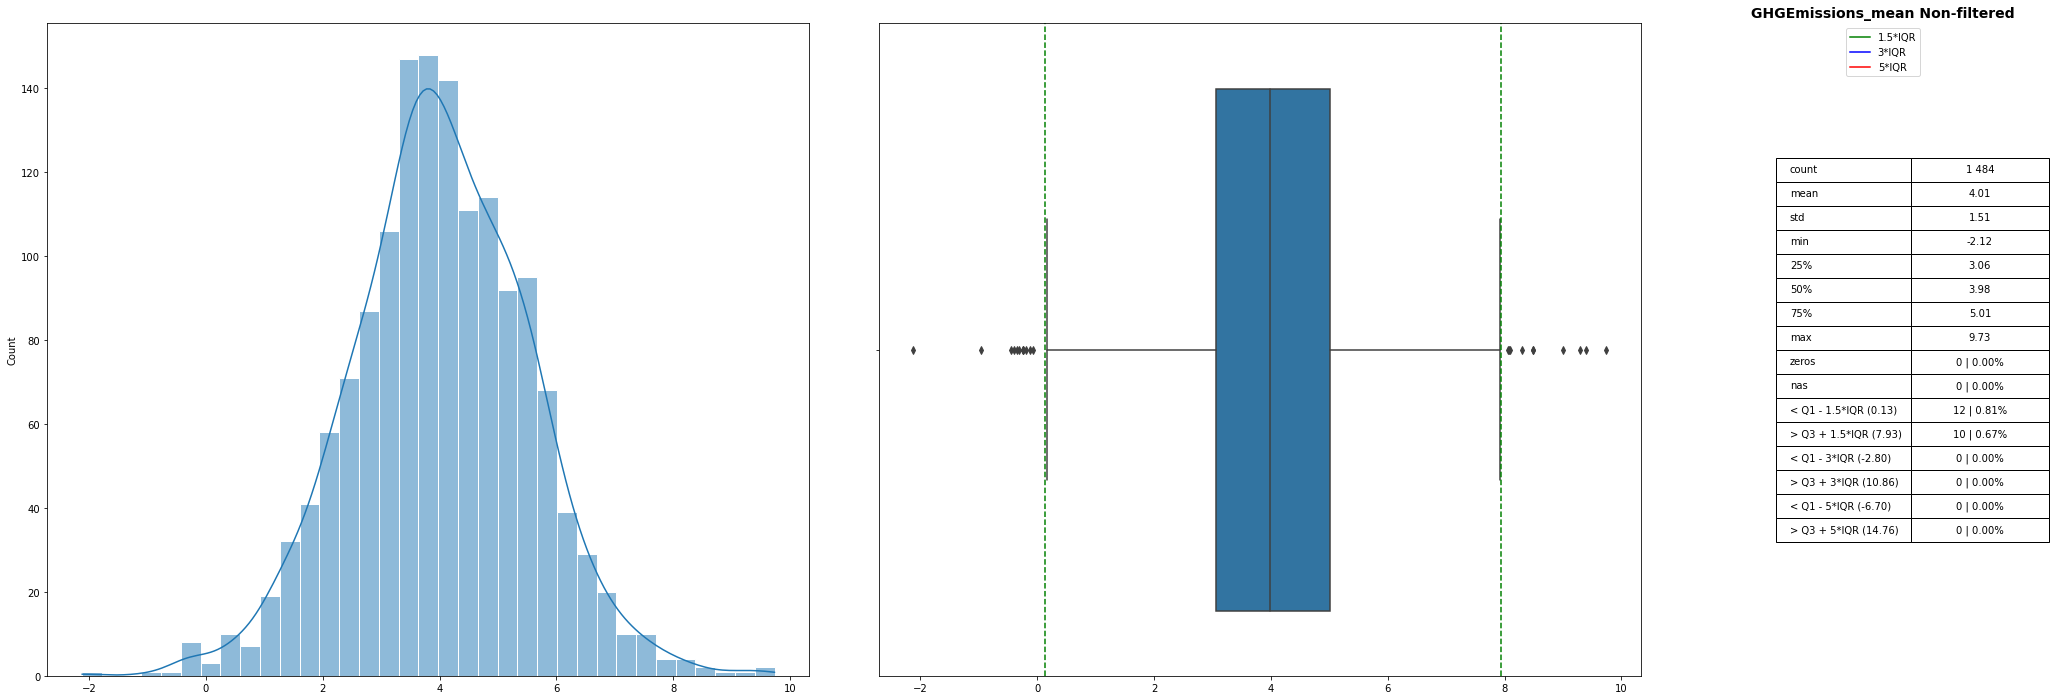

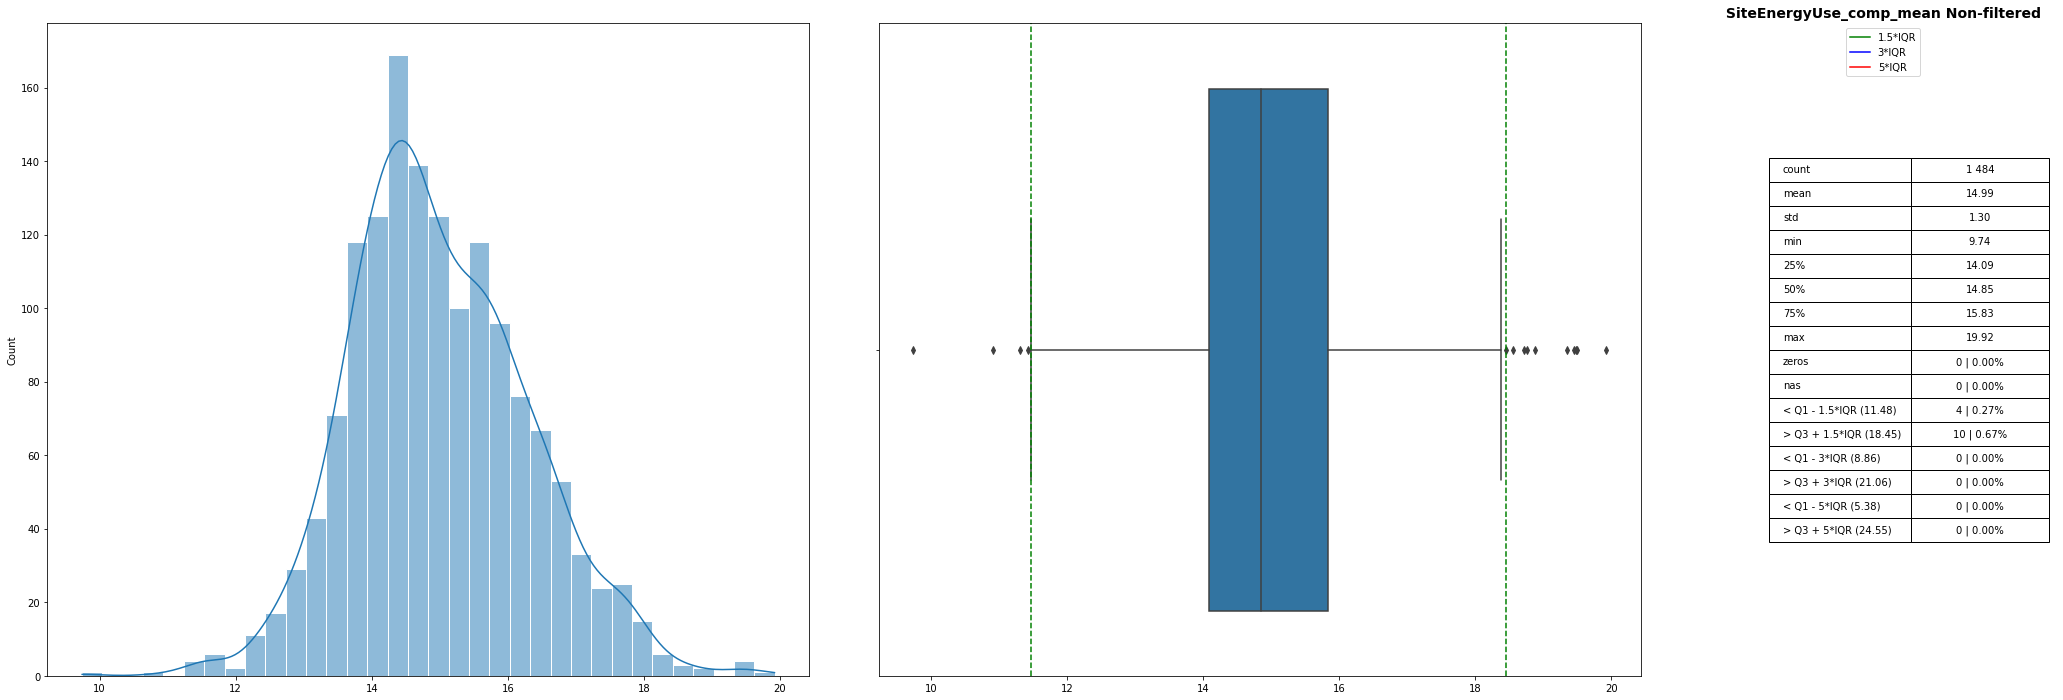

In [76]:
univariate_num(data['GHGEmissions_mean'])
univariate_num(data['SiteEnergyUse_comp_mean'])

### Sauvegarde du fichier clean

In [77]:
data.loc[:,selected_columns+tbe].to_csv('./data/Pelec_clean.csv')